In [ ]:
from sklearn.utils import shuffle  
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
import sklearn

In [ ]:
test_data = pd.read_csv('original_test_data.csv')
test_data = test_data[['sentence','maslow']]
test_data.head(2)

,sentence,maslow
0,Jamies job requires her to travel a lot.She ha...,esteem
1,Andy was craving some cereal.He picked out som...,physiological


In [ ]:
test_data[['sentence','maslow']].groupby('maslow').count()

,sentence
maslow,
esteem,1038
love,900
none,509
physiological,455
spiritual growth,472
stability,745


In [ ]:
test_data_need_category = test_data[test_data['maslow']!='none']
test_data_need_category.shape[0]

3610

In [ ]:
t = test_data_need_category[400:800]
from google.colab import files

t.to_excel('test_data_need_category_set_3.xlsx')
files.download('test_data_need_category_set_3.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
t

,sentence,maslow
219,Phil got a job delivering newspapers on his bi...,need
220,The man tried on a fake mustache.He snuck up b...,need
221,A man wanted to increase his intelligence.He t...,need
222,Lane's dad had been in the army and he wanted ...,need
223,The man went fishing.He caught more than his l...,need
...,...,...
443,There lived a mercenary with no feelings or em...,need
444,Jackson wasn't feeling well to his stomach.His...,need
445,Julio wanted to impress the girl in his wilder...,need
446,Michael lost a tooth.,need


#### Merging

In [ ]:
annotated_needcat_test_data_1 = pd.read_excel("/content/test_data_need_category_set_1.xlsx")
annotated_needcat_test_data_2 = pd.read_excel('/content/test_data_need_category_set_2.xlsx')
annotated_needcat_test_data_3 = pd.read_excel('/content/test_data_need_category_set_3.xlsx')
annotated_needcat_test_data = pd.concat([annotated_needcat_test_data_1,annotated_needcat_test_data_2,annotated_needcat_test_data_3])
annotated_needcat_test_data = shuffle(annotated_needcat_test_data)
annotated_needcat_test_data['maslow'] = annotated_needcat_test_data['maslow'].replace(['physiological','love','stability','esteem','spiritual growth'],['need','need','need','need','need'])
annotated_needcat_test_data['our'] = annotated_needcat_test_data['our'].replace([0,1],['need','no need'])

In [ ]:
annotated_needcat_test_data.head()

,Unnamed: 0,sentence,maslow,our,annotator
180,197,Sam was a car dealer.He tried to sell a car to...,need,need,ajinkya
6,9,Lily was flying alone for the first time.,need,no need,ajinkya
88,318,Cassie's Mom packed her lunch and wave her off...,need,need,anish
148,163,Lucy and her mother were hunting for a movie t...,need,need,ajinkya
41,267,"My dog, Ninja, likes to run in our small yard....",need,need,anish


In [ ]:
annotated_needcat_test_data[['maslow','sentence','our','annotator']].groupby(['maslow','annotator','our']).count()

sentence
maslow annotator our              
need   ajinkya   need          176
                 no need        24
       anish     need          192
                 no need         8
       gurudeep  need          184
                 no need        15

In [ ]:
lb = LabelEncoder() 
annotated_needcat_test_data['maslowLabel'] = lb.fit_transform(annotated_needcat_test_data['maslow'])
annotated_needcat_test_data['ourlabel'] = lb.fit_transform(annotated_needcat_test_data['our']) 

In [ ]:
def make_confusion_matrix(cf,group_names=None,categories='auto',count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [ ]:
uniqueClassesMaslowLabel2 = list(annotated_needcat_test_data['maslow'].unique())
uniqueClassesMaslow2 = list(annotated_needcat_test_data['maslowLabel'].unique())
uniqueClassesMaslowLabel2 = ['need','no need']
uniqueClassesMaslow2 = [0,1]
print(uniqueClassesMaslowLabel2)
print(uniqueClassesMaslow2)

['need', 'no need']
[0, 1]


In [ ]:
integer_label = annotated_needcat_test_data['maslowLabel']
review_predictions2 = annotated_needcat_test_data['ourlabel']

[[552   0]
 [ 47   0]]


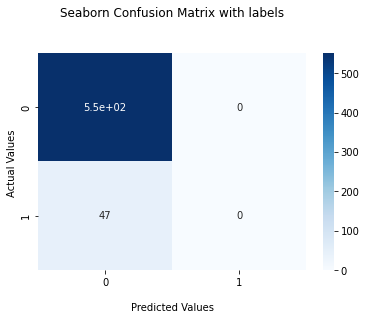

In [ ]:
from sklearn.metrics import confusion_matrix
r2 = confusion_matrix(review_predictions2, integer_label)
print(r2)
ax = sns.heatmap(r2, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in long_scalars


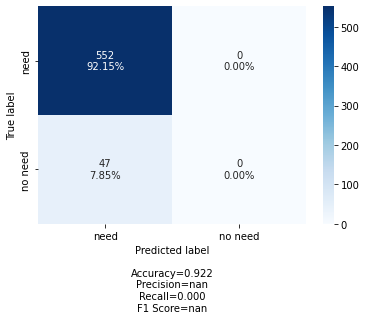

In [ ]:
make_confusion_matrix(r2, group_names=uniqueClassesMaslow2, categories=uniqueClassesMaslowLabel2, cmap='Blues')

#### BERT

https://www.youtube.com/watch?v=RgpANRh44ao

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings('ignore')
%config Completer.use_jedi = False 

In [ ]:
df_train = pd.read_csv('original_train_data.csv')
df_test = pd.read_csv('original_test_data.csv')
df_test = df_test[df_test['maslow']!='none']
df_train = df_train[df_train['maslow']!='none']
df_test = df_test[['sentence','maslow']]
df_train = df_train[['sentence','maslow']]
df_full = pd.concat([df_train,df_test],axis = 0)
df_full

,sentence,maslow
0,Melissa never drank wine.Melissa broke up with...,physiological
2,The family shared a basket of fries.The son at...,physiological
3,Poppy started going to dance school.She knew s...,stability
4,Our neighbor Tracy has a boy and a girl in ele...,love
5,Sarah found herself easily distracted.She felt...,esteem
...,...,...
4112,Gina was crying because she couldn't find her ...,love
4113,Alison was playing in the park.She started pla...,physiological
4114,Candy heard that her very favorite band was pl...,esteem
4115,"Morgan loved riding her bicycle.One day, she r...",stability


In [ ]:
!pip install text_hammer
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 36.4 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 32.3 MB/s 
     |████████████████████████████████| 6.6 MB 59.1 MB/s 
     |████████████████████████████████| 101 kB 14.0 MB/s 


In [ ]:
from tqdm._tqdm_notebook import tqdm_notebook 
import text_hammer as th
tqdm_notebook.pandas()

def text_preprocessing(df, column_name):
    column = column_name 
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.cont_exp(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
    return(df)
df_cleaned = text_preprocessing(df_full,'sentence')

  0%|          | 0/18050 [00:00<?, ?it/s]

  0%|          | 0/18050 [00:00<?, ?it/s]

  0%|          | 0/18050 [00:00<?, ?it/s]

  0%|          | 0/18050 [00:00<?, ?it/s]

  0%|          | 0/18050 [00:00<?, ?it/s]

  0%|          | 0/18050 [00:00<?, ?it/s]

In [ ]:
df_cleaned.head()

,sentence,maslow
0,melissa never drank winemelissa broke up with ...,physiological
2,the family shared a basket of friesthe son ate...,physiological
3,poppy started going to dance schoolshe knew sh...,stability
4,our neighbor tracy has a boy and a girl in ele...,love
5,sarah found herself easily distractedshe felt ...,esteem


In [ ]:
df_cleaned = df_cleaned.copy()

In [ ]:
df_cleaned['num_words'] = df_cleaned.sentence.apply(lambda x:len(x.split()))
df_cleaned.head()

,sentence,maslow,num_words
0,melissa never drank winemelissa broke up with ...,physiological,18
2,the family shared a basket of friesthe son ate...,physiological,21
3,poppy started going to dance schoolshe knew sh...,stability,27
4,our neighbor tracy has a boy and a girl in ele...,love,25
5,sarah found herself easily distractedshe felt ...,esteem,28


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18050 entries, 0 to 4118
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentence   18050 non-null  object
 1   maslow     18050 non-null  object
 2   num_words  18050 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 564.1+ KB


In [ ]:
df_cleaned['maslow'] = df_cleaned.maslow.astype('category')
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18050 entries, 0 to 4118
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   sentence   18050 non-null  object  
 1   maslow     18050 non-null  category
 2   num_words  18050 non-null  int64   
dtypes: category(1), int64(1), object(1)
memory usage: 440.9+ KB


In [ ]:
print(df_cleaned.maslow.unique())

['physiological', 'stability', 'love', 'esteem', 'spiritual growth']
Categories (5, object): ['esteem', 'love', 'physiological', 'spiritual growth', 'stability']


In [ ]:
df_cleaned.maslow

0       physiological
2       physiological
3           stability
4                love
5              esteem
            ...      
4112             love
4113    physiological
4114           esteem
4115        stability
4118             love
Name: maslow, Length: 18050, dtype: category
Categories (5, object): ['esteem', 'love', 'physiological', 'spiritual growth', 'stability']

In [ ]:
print(df_cleaned.maslow.cat.codes)

0       2
2       2
3       4
4       1
5       0
       ..
4112    1
4113    2
4114    0
4115    4
4118    1
Length: 18050, dtype: int8


In [ ]:
#encoded_dict = {'esteem':0, 'love':1, 'none':2, 'physiological':3, 'spiritual growth':4, 'stability':5}
encoded_dict = {'esteem':0, 'love':1,'physiological':2, 'spiritual growth':3, 'stability':4}
df_cleaned['maslow'] = df_cleaned.maslow.cat.codes
df_cleaned.maslow

0       2
2       2
3       4
4       1
5       0
       ..
4112    1
4113    2
4114    0
4115    4
4118    1
Name: maslow, Length: 18050, dtype: int8

In [ ]:
df_cleaned.head()

,sentence,maslow,num_words
0,melissa never drank winemelissa broke up with ...,2,18
2,the family shared a basket of friesthe son ate...,2,21
3,poppy started going to dance schoolshe knew sh...,4,27
4,our neighbor tracy has a boy and a girl in ele...,1,25
5,sarah found herself easily distractedshe felt ...,0,28


In [ ]:
df_cleaned.num_words.max()

67

In [ ]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(df_cleaned, test_size = 0.2, random_state = 0, stratify = df_cleaned.maslow)
print(data_train.shape)
print(data_test.shape)

(14440, 3)
(3610, 3)


In [ ]:
from tensorflow.keras.utils import to_categorical
to_categorical(data_train.maslow)

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
from transformers import AutoTokenizer, TFBertModel
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
bert = TFBertModel.from_pretrained('bert-base-cased')

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
#tokenizer.save_pretrained('bert-tokenizer')
#bert.save_pretrained('bert-model')

In [ ]:
#import shutil 
#shutil.make_archive('bert-tokenizer','zip','bert-tokenizer')
#shutil.make_archive('bert-model','zip','bert-model')

In [ ]:
#from transformers import BertTokenizer, TFBertModel, BertConfig, TFDistilBertModel, DistilBertTokenizer, DistilBertConfig
#dbert_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')

In [ ]:
x_train = tokenizer(
    text = data_train.sentence.tolist(),
    add_special_tokens = True,
    max_length = 70,
    truncation = True,
    padding = True, 
    return_tensors = 'tf',
    return_token_type_ids = False,
    return_attention_mask = True, 
    verbose = True
)

x_test = tokenizer(
    text = data_test.sentence.tolist(),
    add_special_tokens = True,
    max_length = 70,
    truncation = True,
    padding = True, 
    return_tensors = 'tf',
    return_token_type_ids = False,
    return_attention_mask = True, 
    verbose = True
)

In [ ]:
x_train

{'input_ids': <tf.Tensor: shape=(14440, 70), dtype=int32, numpy=
array([[  101,  1894, 18457, ...,     0,     0,     0],
       [  101,   179,  4164, ...,     0,     0,     0],
       [  101,  1165,   178, ...,  1107,   102,     0],
       ...,
       [  101, 24181,  1183, ...,     0,     0,     0],
       [  101, 23220,  2339, ...,     0,     0,     0],
       [  101,  1155,  1663, ...,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(14440, 70), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [ ]:
x_test

{'input_ids': <tf.Tensor: shape=(3610, 70), dtype=int32, numpy=
array([[  101, 14086,  1161, ...,     0,     0,     0],
       [  101,  1141,  1285, ...,     0,     0,     0],
       [  101,  1821,  1183, ...,     0,     0,     0],
       ...,
       [  101,   171, 13238, ...,     0,     0,     0],
       [  101,   181,  9368, ...,     0,     0,     0],
       [  101, 26063,  1931, ...,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(3610, 70), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [ ]:
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.initializers import TruncatedNormal 
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense
import tensorflow as tf 
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
max_len = 70 
input_ids = Input(shape = (max_len,), dtype = tf.int32, name = 'input_ids')
input_mask = Input(shape = (max_len,), dtype = tf.int32, name = 'attention_mask') 
embeddings = bert(input_ids, attention_mask = input_mask)[0]
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = Dense(128, activation = 'relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32, activation = 'relu')(out)
y = Dense(5, activation = 'sigmoid')(out)
model = tf.keras.Model(inputs = [input_ids, input_mask], outputs = y)
model.layers[2].trainable = True

In [ ]:
model.layers

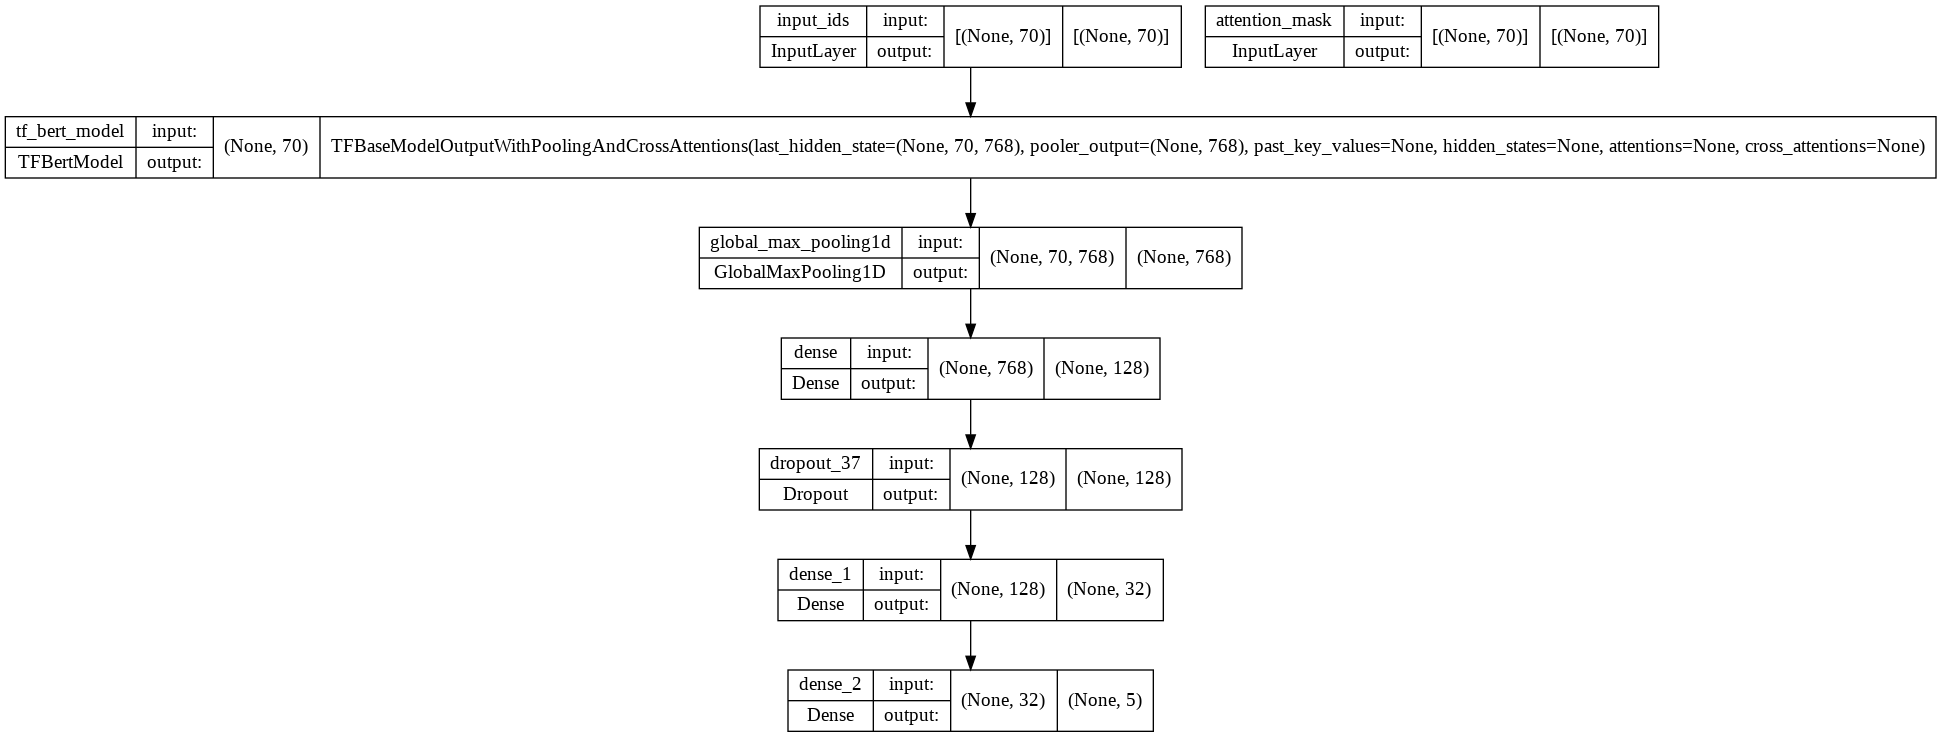

In [ ]:
tf.keras.utils.plot_model(model, show_shapes = True)

In [ ]:
optimizer = Adam(
    learning_rate = 5e-05,
    epsilon = 1e-08,
    decay = 0.01,
    clipnorm = 1.0
)

#loss = CategoricalCrossentropy() 
metric = CategoricalAccuracy('balanced_accuracy')
model.compile(optimizer = optimizer, loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True), metrics = metric)

In [ ]:
tf.config.experimental_run_functions_eagerly(True)
tf.config.run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [ ]:
for i in range(5):
    answer = int(input("Do you want to run another epoch?1/0: "))
    if answer == 1:
    train_history = model.fit(x = {'input_ids':x_train['input_ids'], 'attention_mask':x_train['attention_mask']},
                            y = to_categorical(data_train.maslow),
                            validation_data = (
                                {'input_ids': x_test['input_ids'], 'attention_mask': x_test['attention_mask']}, to_categorical(data_test.maslow)
                            ),
                            epochs = 5,
                            batch_size = 36,
                            )
    else:
        break

Epoch 1/5


  1/402 [..............................] - ETA: 14:08 - loss: 2.2143 - balanced_accuracy: 0.2778

  2/402 [..............................] - ETA: 4:32 - loss: 2.0170 - balanced_accuracy: 0.2083 

  3/402 [..............................] - ETA: 4:33 - loss: 1.8769 - balanced_accuracy: 0.2315

  4/402 [..............................] - ETA: 4:34 - loss: 1.8125 - balanced_accuracy: 0.2361

  5/402 [..............................] - ETA: 4:32 - loss: 1.8143 - balanced_accuracy: 0.2222

  6/402 [..............................] - ETA: 4:31 - loss: 1.7716 - balanced_accuracy: 0.2176

  7/402 [..............................] - ETA: 4:31 - loss: 1.7407 - balanced_accuracy: 0.2262

  8/402 [..............................] - ETA: 4:30 - loss: 1.7165 - balanced_accuracy: 0.2292

  9/402 [..............................] - ETA: 4:29 - loss: 1.7025 - balanced_accuracy: 0.2407

 10/402 [..............................] - ETA: 4:28 - loss: 1.6891 - balanced_accuracy: 0.2500

 11/402 [..............................] - ETA: 4:28 - loss: 1.6757 - balanced_accuracy: 0.2525

 12/402 [..............................] - ETA: 4:28 - loss: 1.6586 - balanced_accuracy: 0.2639

 13/402 [..............................] - ETA: 4:28 - loss: 1.6526 - balanced_accuracy: 0.2650

 14/402 [>.............................] - ETA: 4:27 - loss: 1.6414 - balanced_accuracy: 0.2659

 15/402 [>.............................] - ETA: 4:27 - loss: 1.6296 - balanced_accuracy: 0.2759

 16/402 [>.............................] - ETA: 4:26 - loss: 1.6207 - balanced_accuracy: 0.2812

 17/402 [>.............................] - ETA: 4:25 - loss: 1.6192 - balanced_accuracy: 0.2859

 18/402 [>.............................] - ETA: 4:24 - loss: 1.6141 - balanced_accuracy: 0.2886

 19/402 [>.............................] - ETA: 4:24 - loss: 1.6106 - balanced_accuracy: 0.2865

 20/402 [>.............................] - ETA: 4:23 - loss: 1.6104 - balanced_accuracy: 0.2833

 21/402 [>.............................] - ETA: 4:22 - loss: 1.5998 - balanced_accuracy: 0.2844

 22/402 [>.............................] - ETA: 4:22 - loss: 1.5952 - balanced_accuracy: 0.2854

 23/402 [>.............................] - ETA: 4:21 - loss: 1.5899 - balanced_accuracy: 0.2838

 24/402 [>.............................] - ETA: 4:20 - loss: 1.5867 - balanced_accuracy: 0.2859

 25/402 [>.............................] - ETA: 4:19 - loss: 1.5856 - balanced_accuracy: 0.2889

 26/402 [>.............................] - ETA: 4:18 - loss: 1.5810 - balanced_accuracy: 0.2917

 27/402 [=>............................] - ETA: 4:18 - loss: 1.5815 - balanced_accuracy: 0.2860

 28/402 [=>............................] - ETA: 4:17 - loss: 1.5800 - balanced_accuracy: 0.2867

 29/402 [=>............................] - ETA: 4:16 - loss: 1.5748 - balanced_accuracy: 0.2921

 30/402 [=>............................] - ETA: 4:16 - loss: 1.5692 - balanced_accuracy: 0.2972

 31/402 [=>............................] - ETA: 4:15 - loss: 1.5657 - balanced_accuracy: 0.2975

 32/402 [=>............................] - ETA: 4:14 - loss: 1.5642 - balanced_accuracy: 0.2977

 33/402 [=>............................] - ETA: 4:13 - loss: 1.5599 - balanced_accuracy: 0.2963

 34/402 [=>............................] - ETA: 4:13 - loss: 1.5578 - balanced_accuracy: 0.3015

 35/402 [=>............................] - ETA: 4:12 - loss: 1.5561 - balanced_accuracy: 0.3040

 36/402 [=>............................] - ETA: 4:11 - loss: 1.5557 - balanced_accuracy: 0.3040

 37/402 [=>............................] - ETA: 4:10 - loss: 1.5544 - balanced_accuracy: 0.3033

 38/402 [=>............................] - ETA: 4:10 - loss: 1.5509 - balanced_accuracy: 0.3063

 39/402 [=>............................] - ETA: 4:09 - loss: 1.5497 - balanced_accuracy: 0.3070

 40/402 [=>............................] - ETA: 4:08 - loss: 1.5476 - balanced_accuracy: 0.3083

 41/402 [==>...........................] - ETA: 4:08 - loss: 1.5436 - balanced_accuracy: 0.3123

 42/402 [==>...........................] - ETA: 4:07 - loss: 1.5397 - balanced_accuracy: 0.3142

 43/402 [==>...........................] - ETA: 4:06 - loss: 1.5358 - balanced_accuracy: 0.3178

 44/402 [==>...........................] - ETA: 4:06 - loss: 1.5313 - balanced_accuracy: 0.3194

 45/402 [==>...........................] - ETA: 4:05 - loss: 1.5286 - balanced_accuracy: 0.3204

 46/402 [==>...........................] - ETA: 4:04 - loss: 1.5271 - balanced_accuracy: 0.3225

 47/402 [==>...........................] - ETA: 4:04 - loss: 1.5263 - balanced_accuracy: 0.3245

 48/402 [==>...........................] - ETA: 4:03 - loss: 1.5234 - balanced_accuracy: 0.3275

 49/402 [==>...........................] - ETA: 4:02 - loss: 1.5187 - balanced_accuracy: 0.3299

 50/402 [==>...........................] - ETA: 4:02 - loss: 1.5199 - balanced_accuracy: 0.3317

 51/402 [==>...........................] - ETA: 4:01 - loss: 1.5177 - balanced_accuracy: 0.3306

 52/402 [==>...........................] - ETA: 4:00 - loss: 1.5133 - balanced_accuracy: 0.3360

 53/402 [==>...........................] - ETA: 4:00 - loss: 1.5090 - balanced_accuracy: 0.3391

 54/402 [===>..........................] - ETA: 3:59 - loss: 1.5043 - balanced_accuracy: 0.3431

 55/402 [===>..........................] - ETA: 3:58 - loss: 1.5031 - balanced_accuracy: 0.3449

 56/402 [===>..........................] - ETA: 3:58 - loss: 1.4975 - balanced_accuracy: 0.3482

 57/402 [===>..........................] - ETA: 3:57 - loss: 1.4923 - balanced_accuracy: 0.3523

 58/402 [===>..........................] - ETA: 3:56 - loss: 1.4891 - balanced_accuracy: 0.3549

 59/402 [===>..........................] - ETA: 3:55 - loss: 1.4865 - balanced_accuracy: 0.3569

 60/402 [===>..........................] - ETA: 3:55 - loss: 1.4845 - balanced_accuracy: 0.3579

 61/402 [===>..........................] - ETA: 3:54 - loss: 1.4835 - balanced_accuracy: 0.3588

 62/402 [===>..........................] - ETA: 3:53 - loss: 1.4825 - balanced_accuracy: 0.3593

 63/402 [===>..........................] - ETA: 3:53 - loss: 1.4788 - balanced_accuracy: 0.3611

 64/402 [===>..........................] - ETA: 3:52 - loss: 1.4748 - balanced_accuracy: 0.3628

 65/402 [===>..........................] - ETA: 3:51 - loss: 1.4731 - balanced_accuracy: 0.3654

 66/402 [===>..........................] - ETA: 3:51 - loss: 1.4709 - balanced_accuracy: 0.3666

 67/402 [====>.........................] - ETA: 3:50 - loss: 1.4715 - balanced_accuracy: 0.3665

 68/402 [====>.........................] - ETA: 3:49 - loss: 1.4685 - balanced_accuracy: 0.3693

 69/402 [====>.........................] - ETA: 3:49 - loss: 1.4677 - balanced_accuracy: 0.3700

 70/402 [====>.........................] - ETA: 3:48 - loss: 1.4641 - balanced_accuracy: 0.3730

 71/402 [====>.........................] - ETA: 3:47 - loss: 1.4619 - balanced_accuracy: 0.3744

 72/402 [====>.........................] - ETA: 3:47 - loss: 1.4585 - balanced_accuracy: 0.3765

 73/402 [====>.........................] - ETA: 3:46 - loss: 1.4581 - balanced_accuracy: 0.3775

 74/402 [====>.........................] - ETA: 3:45 - loss: 1.4532 - balanced_accuracy: 0.3795

 75/402 [====>.........................] - ETA: 3:45 - loss: 1.4512 - balanced_accuracy: 0.3804

 76/402 [====>.........................] - ETA: 3:44 - loss: 1.4476 - balanced_accuracy: 0.3830

 77/402 [====>.........................] - ETA: 3:43 - loss: 1.4447 - balanced_accuracy: 0.3846

 78/402 [====>.........................] - ETA: 3:42 - loss: 1.4406 - balanced_accuracy: 0.3882

 79/402 [====>.........................] - ETA: 3:42 - loss: 1.4358 - balanced_accuracy: 0.3906

 80/402 [====>.........................] - ETA: 3:41 - loss: 1.4316 - balanced_accuracy: 0.3920

 81/402 [=====>........................] - ETA: 3:40 - loss: 1.4306 - balanced_accuracy: 0.3920

 82/402 [=====>........................] - ETA: 3:40 - loss: 1.4284 - balanced_accuracy: 0.3930

 83/402 [=====>........................] - ETA: 3:39 - loss: 1.4273 - balanced_accuracy: 0.3936

 84/402 [=====>........................] - ETA: 3:38 - loss: 1.4279 - balanced_accuracy: 0.3942

 85/402 [=====>........................] - ETA: 3:38 - loss: 1.4270 - balanced_accuracy: 0.3954

 86/402 [=====>........................] - ETA: 3:37 - loss: 1.4249 - balanced_accuracy: 0.3970

 87/402 [=====>........................] - ETA: 3:36 - loss: 1.4235 - balanced_accuracy: 0.3991

 88/402 [=====>........................] - ETA: 3:36 - loss: 1.4223 - balanced_accuracy: 0.4003

 89/402 [=====>........................] - ETA: 3:35 - loss: 1.4205 - balanced_accuracy: 0.4017

 90/402 [=====>........................] - ETA: 3:34 - loss: 1.4188 - balanced_accuracy: 0.4022

 91/402 [=====>........................] - ETA: 3:34 - loss: 1.4190 - balanced_accuracy: 0.4017

 92/402 [=====>........................] - ETA: 3:33 - loss: 1.4166 - balanced_accuracy: 0.4034

 93/402 [=====>........................] - ETA: 3:32 - loss: 1.4131 - balanced_accuracy: 0.4056

 94/402 [======>.......................] - ETA: 3:31 - loss: 1.4094 - balanced_accuracy: 0.4078

 95/402 [======>.......................] - ETA: 3:31 - loss: 1.4067 - balanced_accuracy: 0.4105

 96/402 [======>.......................] - ETA: 3:30 - loss: 1.4044 - balanced_accuracy: 0.4120

 97/402 [======>.......................] - ETA: 3:29 - loss: 1.4046 - balanced_accuracy: 0.4115

 98/402 [======>.......................] - ETA: 3:29 - loss: 1.3999 - balanced_accuracy: 0.4141

 99/402 [======>.......................] - ETA: 3:28 - loss: 1.3982 - balanced_accuracy: 0.4153

100/402 [======>.......................] - ETA: 3:27 - loss: 1.3961 - balanced_accuracy: 0.4169

101/402 [======>.......................] - ETA: 3:27 - loss: 1.3923 - balanced_accuracy: 0.4183

102/402 [======>.......................] - ETA: 3:26 - loss: 1.3899 - balanced_accuracy: 0.4199

103/402 [======>.......................] - ETA: 3:25 - loss: 1.3871 - balanced_accuracy: 0.4210

104/402 [======>.......................] - ETA: 3:25 - loss: 1.3842 - balanced_accuracy: 0.4231

105/402 [======>.......................] - ETA: 3:24 - loss: 1.3817 - balanced_accuracy: 0.4238

106/402 [======>.......................] - ETA: 3:23 - loss: 1.3775 - balanced_accuracy: 0.4253

107/402 [======>.......................] - ETA: 3:23 - loss: 1.3766 - balanced_accuracy: 0.4258

108/402 [=======>......................] - ETA: 3:22 - loss: 1.3740 - balanced_accuracy: 0.4262

109/402 [=======>......................] - ETA: 3:21 - loss: 1.3737 - balanced_accuracy: 0.4258

110/402 [=======>......................] - ETA: 3:21 - loss: 1.3732 - balanced_accuracy: 0.4265

111/402 [=======>......................] - ETA: 3:20 - loss: 1.3706 - balanced_accuracy: 0.4274

112/402 [=======>......................] - ETA: 3:19 - loss: 1.3695 - balanced_accuracy: 0.4276

113/402 [=======>......................] - ETA: 3:19 - loss: 1.3678 - balanced_accuracy: 0.4285

114/402 [=======>......................] - ETA: 3:18 - loss: 1.3629 - balanced_accuracy: 0.4320

115/402 [=======>......................] - ETA: 3:17 - loss: 1.3609 - balanced_accuracy: 0.4329

116/402 [=======>......................] - ETA: 3:17 - loss: 1.3593 - balanced_accuracy: 0.4337

117/402 [=======>......................] - ETA: 3:16 - loss: 1.3596 - balanced_accuracy: 0.4342

118/402 [=======>......................] - ETA: 3:15 - loss: 1.3587 - balanced_accuracy: 0.4346

119/402 [=======>......................] - ETA: 3:16 - loss: 1.3567 - balanced_accuracy: 0.4358

120/402 [=======>......................] - ETA: 3:15 - loss: 1.3570 - balanced_accuracy: 0.4352

121/402 [========>.....................] - ETA: 3:14 - loss: 1.3540 - balanced_accuracy: 0.4371

122/402 [========>.....................] - ETA: 3:14 - loss: 1.3521 - balanced_accuracy: 0.4385

123/402 [========>.....................] - ETA: 3:13 - loss: 1.3486 - balanced_accuracy: 0.4399

124/402 [========>.....................] - ETA: 3:12 - loss: 1.3455 - balanced_accuracy: 0.4415

125/402 [========>.....................] - ETA: 3:11 - loss: 1.3416 - balanced_accuracy: 0.4438

126/402 [========>.....................] - ETA: 3:11 - loss: 1.3397 - balanced_accuracy: 0.4440

127/402 [========>.....................] - ETA: 3:10 - loss: 1.3397 - balanced_accuracy: 0.4431

128/402 [========>.....................] - ETA: 3:09 - loss: 1.3388 - balanced_accuracy: 0.4438

129/402 [========>.....................] - ETA: 3:09 - loss: 1.3357 - balanced_accuracy: 0.4453

130/402 [========>.....................] - ETA: 3:08 - loss: 1.3345 - balanced_accuracy: 0.4462

131/402 [========>.....................] - ETA: 3:08 - loss: 1.3320 - balanced_accuracy: 0.4478

132/402 [========>.....................] - ETA: 3:07 - loss: 1.3308 - balanced_accuracy: 0.4484

133/402 [========>.....................] - ETA: 3:06 - loss: 1.3294 - balanced_accuracy: 0.4497

134/402 [=========>....................] - ETA: 3:06 - loss: 1.3300 - balanced_accuracy: 0.4486

135/402 [=========>....................] - ETA: 3:05 - loss: 1.3293 - balanced_accuracy: 0.4488

136/402 [=========>....................] - ETA: 3:04 - loss: 1.3288 - balanced_accuracy: 0.4496

137/402 [=========>....................] - ETA: 3:04 - loss: 1.3290 - balanced_accuracy: 0.4499

138/402 [=========>....................] - ETA: 3:03 - loss: 1.3267 - balanced_accuracy: 0.4515

139/402 [=========>....................] - ETA: 3:02 - loss: 1.3250 - balanced_accuracy: 0.4520

140/402 [=========>....................] - ETA: 3:02 - loss: 1.3243 - balanced_accuracy: 0.4530

141/402 [=========>....................] - ETA: 3:01 - loss: 1.3240 - balanced_accuracy: 0.4537

142/402 [=========>....................] - ETA: 3:00 - loss: 1.3220 - balanced_accuracy: 0.4546

143/402 [=========>....................] - ETA: 3:00 - loss: 1.3208 - balanced_accuracy: 0.4551

144/402 [=========>....................] - ETA: 2:59 - loss: 1.3195 - balanced_accuracy: 0.4556

145/402 [=========>....................] - ETA: 2:58 - loss: 1.3188 - balanced_accuracy: 0.4559

146/402 [=========>....................] - ETA: 2:58 - loss: 1.3168 - balanced_accuracy: 0.4566

147/402 [=========>....................] - ETA: 2:57 - loss: 1.3157 - balanced_accuracy: 0.4577

148/402 [==========>...................] - ETA: 2:56 - loss: 1.3146 - balanced_accuracy: 0.4587

149/402 [==========>...................] - ETA: 2:56 - loss: 1.3141 - balanced_accuracy: 0.4594

150/402 [==========>...................] - ETA: 2:55 - loss: 1.3127 - balanced_accuracy: 0.4602

151/402 [==========>...................] - ETA: 2:55 - loss: 1.3113 - balanced_accuracy: 0.4610

152/402 [==========>...................] - ETA: 2:54 - loss: 1.3092 - balanced_accuracy: 0.4622

153/402 [==========>...................] - ETA: 2:53 - loss: 1.3081 - balanced_accuracy: 0.4628

154/402 [==========>...................] - ETA: 2:53 - loss: 1.3059 - balanced_accuracy: 0.4637

155/402 [==========>...................] - ETA: 2:52 - loss: 1.3041 - balanced_accuracy: 0.4645

156/402 [==========>...................] - ETA: 2:51 - loss: 1.3023 - balanced_accuracy: 0.4656

157/402 [==========>...................] - ETA: 2:50 - loss: 1.3004 - balanced_accuracy: 0.4664

158/402 [==========>...................] - ETA: 2:50 - loss: 1.2997 - balanced_accuracy: 0.4668

159/402 [==========>...................] - ETA: 2:49 - loss: 1.2982 - balanced_accuracy: 0.4675

160/402 [==========>...................] - ETA: 2:48 - loss: 1.2972 - balanced_accuracy: 0.4682

161/402 [===========>..................] - ETA: 2:48 - loss: 1.2959 - balanced_accuracy: 0.4693

162/402 [===========>..................] - ETA: 2:47 - loss: 1.2954 - balanced_accuracy: 0.4698

163/402 [===========>..................] - ETA: 2:46 - loss: 1.2929 - balanced_accuracy: 0.4710

164/402 [===========>..................] - ETA: 2:46 - loss: 1.2915 - balanced_accuracy: 0.4712

165/402 [===========>..................] - ETA: 2:45 - loss: 1.2887 - balanced_accuracy: 0.4727

166/402 [===========>..................] - ETA: 2:44 - loss: 1.2888 - balanced_accuracy: 0.4731

167/402 [===========>..................] - ETA: 2:44 - loss: 1.2868 - balanced_accuracy: 0.4739

168/402 [===========>..................] - ETA: 2:43 - loss: 1.2856 - balanced_accuracy: 0.4740

169/402 [===========>..................] - ETA: 2:42 - loss: 1.2827 - balanced_accuracy: 0.4755

170/402 [===========>..................] - ETA: 2:42 - loss: 1.2816 - balanced_accuracy: 0.4760

171/402 [===========>..................] - ETA: 2:41 - loss: 1.2822 - balanced_accuracy: 0.4763

172/402 [===========>..................] - ETA: 2:40 - loss: 1.2803 - balanced_accuracy: 0.4771

173/402 [===========>..................] - ETA: 2:39 - loss: 1.2804 - balanced_accuracy: 0.4769

174/402 [===========>..................] - ETA: 2:39 - loss: 1.2813 - balanced_accuracy: 0.4769

175/402 [============>.................] - ETA: 2:38 - loss: 1.2801 - balanced_accuracy: 0.4778

176/402 [============>.................] - ETA: 2:37 - loss: 1.2804 - balanced_accuracy: 0.4779

177/402 [============>.................] - ETA: 2:37 - loss: 1.2783 - balanced_accuracy: 0.4785

178/402 [============>.................] - ETA: 2:36 - loss: 1.2768 - balanced_accuracy: 0.4791

179/402 [============>.................] - ETA: 2:35 - loss: 1.2752 - balanced_accuracy: 0.4801

180/402 [============>.................] - ETA: 2:35 - loss: 1.2743 - balanced_accuracy: 0.4807

181/402 [============>.................] - ETA: 2:34 - loss: 1.2732 - balanced_accuracy: 0.4814

182/402 [============>.................] - ETA: 2:33 - loss: 1.2716 - balanced_accuracy: 0.4826

183/402 [============>.................] - ETA: 2:32 - loss: 1.2712 - balanced_accuracy: 0.4827

184/402 [============>.................] - ETA: 2:32 - loss: 1.2691 - balanced_accuracy: 0.4838

185/402 [============>.................] - ETA: 2:31 - loss: 1.2693 - balanced_accuracy: 0.4836

186/402 [============>.................] - ETA: 2:30 - loss: 1.2679 - balanced_accuracy: 0.4843

187/402 [============>.................] - ETA: 2:30 - loss: 1.2672 - balanced_accuracy: 0.4844

188/402 [=============>................] - ETA: 2:29 - loss: 1.2667 - balanced_accuracy: 0.4845

189/402 [=============>................] - ETA: 2:29 - loss: 1.2655 - balanced_accuracy: 0.4849

190/402 [=============>................] - ETA: 2:28 - loss: 1.2635 - balanced_accuracy: 0.4864

191/402 [=============>................] - ETA: 2:27 - loss: 1.2621 - balanced_accuracy: 0.4873

192/402 [=============>................] - ETA: 2:27 - loss: 1.2599 - balanced_accuracy: 0.4884

193/402 [=============>................] - ETA: 2:26 - loss: 1.2595 - balanced_accuracy: 0.4891

194/402 [=============>................] - ETA: 2:26 - loss: 1.2592 - balanced_accuracy: 0.4890

195/402 [=============>................] - ETA: 2:25 - loss: 1.2593 - balanced_accuracy: 0.4890

196/402 [=============>................] - ETA: 2:24 - loss: 1.2587 - balanced_accuracy: 0.4895

197/402 [=============>................] - ETA: 2:24 - loss: 1.2582 - balanced_accuracy: 0.4896

198/402 [=============>................] - ETA: 2:23 - loss: 1.2584 - balanced_accuracy: 0.4898

199/402 [=============>................] - ETA: 2:22 - loss: 1.2578 - balanced_accuracy: 0.4902

200/402 [=============>................] - ETA: 2:21 - loss: 1.2585 - balanced_accuracy: 0.4897

201/402 [==============>...............] - ETA: 2:21 - loss: 1.2570 - balanced_accuracy: 0.4899

202/402 [==============>...............] - ETA: 2:20 - loss: 1.2566 - balanced_accuracy: 0.4906

203/402 [==============>...............] - ETA: 2:19 - loss: 1.2564 - balanced_accuracy: 0.4908

204/402 [==============>...............] - ETA: 2:19 - loss: 1.2550 - balanced_accuracy: 0.4914

205/402 [==============>...............] - ETA: 2:18 - loss: 1.2538 - balanced_accuracy: 0.4920

206/402 [==============>...............] - ETA: 2:17 - loss: 1.2530 - balanced_accuracy: 0.4922

207/402 [==============>...............] - ETA: 2:17 - loss: 1.2522 - balanced_accuracy: 0.4924

208/402 [==============>...............] - ETA: 2:16 - loss: 1.2531 - balanced_accuracy: 0.4924

209/402 [==============>...............] - ETA: 2:15 - loss: 1.2530 - balanced_accuracy: 0.4927

210/402 [==============>...............] - ETA: 2:15 - loss: 1.2517 - balanced_accuracy: 0.4929

211/402 [==============>...............] - ETA: 2:14 - loss: 1.2511 - balanced_accuracy: 0.4932

212/402 [==============>...............] - ETA: 2:13 - loss: 1.2499 - balanced_accuracy: 0.4936

213/402 [==============>...............] - ETA: 2:12 - loss: 1.2482 - balanced_accuracy: 0.4941

214/402 [==============>...............] - ETA: 2:12 - loss: 1.2471 - balanced_accuracy: 0.4948

215/402 [===============>..............] - ETA: 2:11 - loss: 1.2462 - balanced_accuracy: 0.4951

216/402 [===============>..............] - ETA: 2:10 - loss: 1.2447 - balanced_accuracy: 0.4954

217/402 [===============>..............] - ETA: 2:10 - loss: 1.2443 - balanced_accuracy: 0.4953

218/402 [===============>..............] - ETA: 2:09 - loss: 1.2429 - balanced_accuracy: 0.4958

219/402 [===============>..............] - ETA: 2:08 - loss: 1.2423 - balanced_accuracy: 0.4959

220/402 [===============>..............] - ETA: 2:08 - loss: 1.2403 - balanced_accuracy: 0.4970

221/402 [===============>..............] - ETA: 2:07 - loss: 1.2410 - balanced_accuracy: 0.4970

222/402 [===============>..............] - ETA: 2:06 - loss: 1.2413 - balanced_accuracy: 0.4971

223/402 [===============>..............] - ETA: 2:05 - loss: 1.2408 - balanced_accuracy: 0.4975

224/402 [===============>..............] - ETA: 2:05 - loss: 1.2405 - balanced_accuracy: 0.4979

225/402 [===============>..............] - ETA: 2:04 - loss: 1.2397 - balanced_accuracy: 0.4985

226/402 [===============>..............] - ETA: 2:03 - loss: 1.2388 - balanced_accuracy: 0.4986

227/402 [===============>..............] - ETA: 2:03 - loss: 1.2387 - balanced_accuracy: 0.4989

228/402 [================>.............] - ETA: 2:02 - loss: 1.2371 - balanced_accuracy: 0.4996

229/402 [================>.............] - ETA: 2:01 - loss: 1.2376 - balanced_accuracy: 0.4995

230/402 [================>.............] - ETA: 2:01 - loss: 1.2366 - balanced_accuracy: 0.5005

231/402 [================>.............] - ETA: 2:00 - loss: 1.2365 - balanced_accuracy: 0.5005

232/402 [================>.............] - ETA: 1:59 - loss: 1.2360 - balanced_accuracy: 0.5008

233/402 [================>.............] - ETA: 1:59 - loss: 1.2345 - balanced_accuracy: 0.5015

234/402 [================>.............] - ETA: 1:58 - loss: 1.2348 - balanced_accuracy: 0.5015

235/402 [================>.............] - ETA: 1:57 - loss: 1.2334 - balanced_accuracy: 0.5025

236/402 [================>.............] - ETA: 1:56 - loss: 1.2333 - balanced_accuracy: 0.5026

237/402 [================>.............] - ETA: 1:56 - loss: 1.2334 - balanced_accuracy: 0.5029

238/402 [================>.............] - ETA: 1:55 - loss: 1.2329 - balanced_accuracy: 0.5032

239/402 [================>.............] - ETA: 1:54 - loss: 1.2320 - balanced_accuracy: 0.5035

240/402 [================>.............] - ETA: 1:54 - loss: 1.2307 - balanced_accuracy: 0.5042

241/402 [================>.............] - ETA: 1:53 - loss: 1.2292 - balanced_accuracy: 0.5050

242/402 [=================>............] - ETA: 1:52 - loss: 1.2290 - balanced_accuracy: 0.5054

243/402 [=================>............] - ETA: 1:52 - loss: 1.2279 - balanced_accuracy: 0.5058

244/402 [=================>............] - ETA: 1:51 - loss: 1.2277 - balanced_accuracy: 0.5059

245/402 [=================>............] - ETA: 1:50 - loss: 1.2261 - balanced_accuracy: 0.5068

246/402 [=================>............] - ETA: 1:49 - loss: 1.2265 - balanced_accuracy: 0.5069

247/402 [=================>............] - ETA: 1:49 - loss: 1.2253 - balanced_accuracy: 0.5078

248/402 [=================>............] - ETA: 1:48 - loss: 1.2259 - balanced_accuracy: 0.5074

249/402 [=================>............] - ETA: 1:47 - loss: 1.2252 - balanced_accuracy: 0.5076

250/402 [=================>............] - ETA: 1:47 - loss: 1.2251 - balanced_accuracy: 0.5077

251/402 [=================>............] - ETA: 1:46 - loss: 1.2247 - balanced_accuracy: 0.5079

252/402 [=================>............] - ETA: 1:45 - loss: 1.2241 - balanced_accuracy: 0.5079

253/402 [=================>............] - ETA: 1:44 - loss: 1.2226 - balanced_accuracy: 0.5089

254/402 [=================>............] - ETA: 1:44 - loss: 1.2219 - balanced_accuracy: 0.5091

255/402 [==================>...........] - ETA: 1:43 - loss: 1.2209 - balanced_accuracy: 0.5096

256/402 [==================>...........] - ETA: 1:42 - loss: 1.2209 - balanced_accuracy: 0.5098

257/402 [==================>...........] - ETA: 1:42 - loss: 1.2213 - balanced_accuracy: 0.5095

258/402 [==================>...........] - ETA: 1:41 - loss: 1.2208 - balanced_accuracy: 0.5100

259/402 [==================>...........] - ETA: 1:40 - loss: 1.2208 - balanced_accuracy: 0.5098

260/402 [==================>...........] - ETA: 1:40 - loss: 1.2202 - balanced_accuracy: 0.5097

261/402 [==================>...........] - ETA: 1:39 - loss: 1.2190 - balanced_accuracy: 0.5103

262/402 [==================>...........] - ETA: 1:38 - loss: 1.2184 - balanced_accuracy: 0.5105

263/402 [==================>...........] - ETA: 1:37 - loss: 1.2176 - balanced_accuracy: 0.5109

264/402 [==================>...........] - ETA: 1:37 - loss: 1.2166 - balanced_accuracy: 0.5115

265/402 [==================>...........] - ETA: 1:36 - loss: 1.2163 - balanced_accuracy: 0.5115

266/402 [==================>...........] - ETA: 1:35 - loss: 1.2157 - balanced_accuracy: 0.5119

267/402 [==================>...........] - ETA: 1:35 - loss: 1.2155 - balanced_accuracy: 0.5121

268/402 [===================>..........] - ETA: 1:34 - loss: 1.2159 - balanced_accuracy: 0.5121

269/402 [===================>..........] - ETA: 1:33 - loss: 1.2153 - balanced_accuracy: 0.5126

270/402 [===================>..........] - ETA: 1:33 - loss: 1.2149 - balanced_accuracy: 0.5128

271/402 [===================>..........] - ETA: 1:32 - loss: 1.2141 - balanced_accuracy: 0.5131

272/402 [===================>..........] - ETA: 1:31 - loss: 1.2141 - balanced_accuracy: 0.5130

273/402 [===================>..........] - ETA: 1:31 - loss: 1.2132 - balanced_accuracy: 0.5136

274/402 [===================>..........] - ETA: 1:30 - loss: 1.2117 - balanced_accuracy: 0.5143

275/402 [===================>..........] - ETA: 1:29 - loss: 1.2110 - balanced_accuracy: 0.5149

276/402 [===================>..........] - ETA: 1:28 - loss: 1.2099 - balanced_accuracy: 0.5156

277/402 [===================>..........] - ETA: 1:28 - loss: 1.2093 - balanced_accuracy: 0.5158

278/402 [===================>..........] - ETA: 1:27 - loss: 1.2089 - balanced_accuracy: 0.5162

279/402 [===================>..........] - ETA: 1:26 - loss: 1.2083 - balanced_accuracy: 0.5168

280/402 [===================>..........] - ETA: 1:26 - loss: 1.2078 - balanced_accuracy: 0.5171

281/402 [===================>..........] - ETA: 1:25 - loss: 1.2064 - balanced_accuracy: 0.5176

282/402 [====================>.........] - ETA: 1:24 - loss: 1.2059 - balanced_accuracy: 0.5181

283/402 [====================>.........] - ETA: 1:24 - loss: 1.2053 - balanced_accuracy: 0.5183

284/402 [====================>.........] - ETA: 1:23 - loss: 1.2051 - balanced_accuracy: 0.5180

285/402 [====================>.........] - ETA: 1:22 - loss: 1.2058 - balanced_accuracy: 0.5174

286/402 [====================>.........] - ETA: 1:21 - loss: 1.2054 - balanced_accuracy: 0.5177

287/402 [====================>.........] - ETA: 1:21 - loss: 1.2045 - balanced_accuracy: 0.5184

288/402 [====================>.........] - ETA: 1:20 - loss: 1.2025 - balanced_accuracy: 0.5192

289/402 [====================>.........] - ETA: 1:19 - loss: 1.2018 - balanced_accuracy: 0.5191

290/402 [====================>.........] - ETA: 1:19 - loss: 1.2014 - balanced_accuracy: 0.5194

291/402 [====================>.........] - ETA: 1:18 - loss: 1.2012 - balanced_accuracy: 0.5199

292/402 [====================>.........] - ETA: 1:17 - loss: 1.2006 - balanced_accuracy: 0.5203

293/402 [====================>.........] - ETA: 1:17 - loss: 1.1999 - balanced_accuracy: 0.5205

294/402 [====================>.........] - ETA: 1:16 - loss: 1.1990 - balanced_accuracy: 0.5210

295/402 [=====================>........] - ETA: 1:15 - loss: 1.1984 - balanced_accuracy: 0.5212

296/402 [=====================>........] - ETA: 1:14 - loss: 1.1981 - balanced_accuracy: 0.5212

297/402 [=====================>........] - ETA: 1:14 - loss: 1.1973 - balanced_accuracy: 0.5215

298/402 [=====================>........] - ETA: 1:13 - loss: 1.1963 - balanced_accuracy: 0.5219

299/402 [=====================>........] - ETA: 1:12 - loss: 1.1969 - balanced_accuracy: 0.5216

300/402 [=====================>........] - ETA: 1:12 - loss: 1.1975 - balanced_accuracy: 0.5214

301/402 [=====================>........] - ETA: 1:11 - loss: 1.1975 - balanced_accuracy: 0.5212

302/402 [=====================>........] - ETA: 1:10 - loss: 1.1971 - balanced_accuracy: 0.5215

303/402 [=====================>........] - ETA: 1:09 - loss: 1.1969 - balanced_accuracy: 0.5220

304/402 [=====================>........] - ETA: 1:09 - loss: 1.1967 - balanced_accuracy: 0.5221

305/402 [=====================>........] - ETA: 1:08 - loss: 1.1961 - balanced_accuracy: 0.5222

306/402 [=====================>........] - ETA: 1:07 - loss: 1.1958 - balanced_accuracy: 0.5226

307/402 [=====================>........] - ETA: 1:07 - loss: 1.1946 - balanced_accuracy: 0.5233

308/402 [=====================>........] - ETA: 1:06 - loss: 1.1941 - balanced_accuracy: 0.5236

309/402 [======================>.......] - ETA: 1:05 - loss: 1.1932 - balanced_accuracy: 0.5240

310/402 [======================>.......] - ETA: 1:05 - loss: 1.1921 - balanced_accuracy: 0.5244

311/402 [======================>.......] - ETA: 1:04 - loss: 1.1912 - balanced_accuracy: 0.5247

312/402 [======================>.......] - ETA: 1:03 - loss: 1.1904 - balanced_accuracy: 0.5252

313/402 [======================>.......] - ETA: 1:02 - loss: 1.1897 - balanced_accuracy: 0.5254

314/402 [======================>.......] - ETA: 1:02 - loss: 1.1893 - balanced_accuracy: 0.5256

315/402 [======================>.......] - ETA: 1:01 - loss: 1.1890 - balanced_accuracy: 0.5260

316/402 [======================>.......] - ETA: 1:00 - loss: 1.1884 - balanced_accuracy: 0.5265

317/402 [======================>.......] - ETA: 1:00 - loss: 1.1884 - balanced_accuracy: 0.5266

318/402 [======================>.......] - ETA: 59s - loss: 1.1879 - balanced_accuracy: 0.5266 

319/402 [======================>.......] - ETA: 58s - loss: 1.1877 - balanced_accuracy: 0.5266

320/402 [======================>.......] - ETA: 58s - loss: 1.1875 - balanced_accuracy: 0.5268

321/402 [======================>.......] - ETA: 57s - loss: 1.1870 - balanced_accuracy: 0.5271

322/402 [=======================>......] - ETA: 56s - loss: 1.1869 - balanced_accuracy: 0.5273

323/402 [=======================>......] - ETA: 55s - loss: 1.1862 - balanced_accuracy: 0.5274

324/402 [=======================>......] - ETA: 55s - loss: 1.1862 - balanced_accuracy: 0.5275

325/402 [=======================>......] - ETA: 54s - loss: 1.1859 - balanced_accuracy: 0.5278

326/402 [=======================>......] - ETA: 53s - loss: 1.1849 - balanced_accuracy: 0.5284

327/402 [=======================>......] - ETA: 53s - loss: 1.1845 - balanced_accuracy: 0.5284

328/402 [=======================>......] - ETA: 52s - loss: 1.1841 - balanced_accuracy: 0.5285

329/402 [=======================>......] - ETA: 51s - loss: 1.1839 - balanced_accuracy: 0.5285

330/402 [=======================>......] - ETA: 51s - loss: 1.1835 - balanced_accuracy: 0.5286

331/402 [=======================>......] - ETA: 50s - loss: 1.1828 - balanced_accuracy: 0.5290

332/402 [=======================>......] - ETA: 49s - loss: 1.1822 - balanced_accuracy: 0.5289

333/402 [=======================>......] - ETA: 48s - loss: 1.1817 - balanced_accuracy: 0.5291

334/402 [=======================>......] - ETA: 48s - loss: 1.1811 - balanced_accuracy: 0.5294

335/402 [========================>.....] - ETA: 47s - loss: 1.1804 - balanced_accuracy: 0.5295

336/402 [========================>.....] - ETA: 46s - loss: 1.1805 - balanced_accuracy: 0.5297

337/402 [========================>.....] - ETA: 46s - loss: 1.1799 - balanced_accuracy: 0.5300

338/402 [========================>.....] - ETA: 45s - loss: 1.1798 - balanced_accuracy: 0.5300

339/402 [========================>.....] - ETA: 44s - loss: 1.1786 - balanced_accuracy: 0.5306

340/402 [========================>.....] - ETA: 43s - loss: 1.1779 - balanced_accuracy: 0.5309

341/402 [========================>.....] - ETA: 43s - loss: 1.1773 - balanced_accuracy: 0.5311

342/402 [========================>.....] - ETA: 42s - loss: 1.1774 - balanced_accuracy: 0.5309

343/402 [========================>.....] - ETA: 41s - loss: 1.1770 - balanced_accuracy: 0.5310

344/402 [========================>.....] - ETA: 41s - loss: 1.1774 - balanced_accuracy: 0.5309

345/402 [========================>.....] - ETA: 40s - loss: 1.1771 - balanced_accuracy: 0.5310

346/402 [========================>.....] - ETA: 39s - loss: 1.1765 - balanced_accuracy: 0.5311

347/402 [========================>.....] - ETA: 38s - loss: 1.1761 - balanced_accuracy: 0.5313

348/402 [========================>.....] - ETA: 38s - loss: 1.1756 - balanced_accuracy: 0.5315

349/402 [=========================>....] - ETA: 37s - loss: 1.1759 - balanced_accuracy: 0.5315

350/402 [=========================>....] - ETA: 36s - loss: 1.1751 - balanced_accuracy: 0.5318

351/402 [=========================>....] - ETA: 36s - loss: 1.1744 - balanced_accuracy: 0.5322

352/402 [=========================>....] - ETA: 35s - loss: 1.1743 - balanced_accuracy: 0.5323

353/402 [=========================>....] - ETA: 34s - loss: 1.1738 - balanced_accuracy: 0.5328

354/402 [=========================>....] - ETA: 34s - loss: 1.1736 - balanced_accuracy: 0.5327

355/402 [=========================>....] - ETA: 33s - loss: 1.1733 - balanced_accuracy: 0.5331

356/402 [=========================>....] - ETA: 32s - loss: 1.1722 - balanced_accuracy: 0.5337

357/402 [=========================>....] - ETA: 31s - loss: 1.1721 - balanced_accuracy: 0.5341

358/402 [=========================>....] - ETA: 31s - loss: 1.1712 - balanced_accuracy: 0.5345

359/402 [=========================>....] - ETA: 30s - loss: 1.1708 - balanced_accuracy: 0.5348

360/402 [=========================>....] - ETA: 29s - loss: 1.1705 - balanced_accuracy: 0.5349

361/402 [=========================>....] - ETA: 29s - loss: 1.1701 - balanced_accuracy: 0.5350

362/402 [==========================>...] - ETA: 28s - loss: 1.1700 - balanced_accuracy: 0.5351

363/402 [==========================>...] - ETA: 27s - loss: 1.1699 - balanced_accuracy: 0.5350

364/402 [==========================>...] - ETA: 26s - loss: 1.1701 - balanced_accuracy: 0.5350

365/402 [==========================>...] - ETA: 26s - loss: 1.1696 - balanced_accuracy: 0.5355

366/402 [==========================>...] - ETA: 25s - loss: 1.1689 - balanced_accuracy: 0.5358

367/402 [==========================>...] - ETA: 24s - loss: 1.1681 - balanced_accuracy: 0.5363

368/402 [==========================>...] - ETA: 24s - loss: 1.1675 - balanced_accuracy: 0.5364

369/402 [==========================>...] - ETA: 23s - loss: 1.1672 - balanced_accuracy: 0.5365

370/402 [==========================>...] - ETA: 22s - loss: 1.1670 - balanced_accuracy: 0.5366

371/402 [==========================>...] - ETA: 21s - loss: 1.1666 - balanced_accuracy: 0.5368

372/402 [==========================>...] - ETA: 21s - loss: 1.1658 - balanced_accuracy: 0.5373

373/402 [==========================>...] - ETA: 20s - loss: 1.1651 - balanced_accuracy: 0.5377

374/402 [==========================>...] - ETA: 19s - loss: 1.1643 - balanced_accuracy: 0.5381

375/402 [==========================>...] - ETA: 19s - loss: 1.1642 - balanced_accuracy: 0.5382

376/402 [===========================>..] - ETA: 18s - loss: 1.1633 - balanced_accuracy: 0.5386

377/402 [===========================>..] - ETA: 17s - loss: 1.1633 - balanced_accuracy: 0.5388

378/402 [===========================>..] - ETA: 17s - loss: 1.1631 - balanced_accuracy: 0.5389

379/402 [===========================>..] - ETA: 16s - loss: 1.1626 - balanced_accuracy: 0.5388

380/402 [===========================>..] - ETA: 15s - loss: 1.1629 - balanced_accuracy: 0.5388

381/402 [===========================>..] - ETA: 14s - loss: 1.1625 - balanced_accuracy: 0.5389

382/402 [===========================>..] - ETA: 14s - loss: 1.1633 - balanced_accuracy: 0.5384

383/402 [===========================>..] - ETA: 13s - loss: 1.1631 - balanced_accuracy: 0.5384

384/402 [===========================>..] - ETA: 12s - loss: 1.1622 - balanced_accuracy: 0.5388

385/402 [===========================>..] - ETA: 12s - loss: 1.1619 - balanced_accuracy: 0.5391

386/402 [===========================>..] - ETA: 11s - loss: 1.1614 - balanced_accuracy: 0.5393

387/402 [===========================>..] - ETA: 10s - loss: 1.1612 - balanced_accuracy: 0.5391

388/402 [===========================>..] - ETA: 9s - loss: 1.1614 - balanced_accuracy: 0.5389 

389/402 [============================>.] - ETA: 9s - loss: 1.1607 - balanced_accuracy: 0.5394

390/402 [============================>.] - ETA: 8s - loss: 1.1603 - balanced_accuracy: 0.5396

391/402 [============================>.] - ETA: 7s - loss: 1.1602 - balanced_accuracy: 0.5396

392/402 [============================>.] - ETA: 7s - loss: 1.1598 - balanced_accuracy: 0.5396

393/402 [============================>.] - ETA: 6s - loss: 1.1594 - balanced_accuracy: 0.5399

394/402 [============================>.] - ETA: 5s - loss: 1.1589 - balanced_accuracy: 0.5402

395/402 [============================>.] - ETA: 4s - loss: 1.1587 - balanced_accuracy: 0.5402

396/402 [============================>.] - ETA: 4s - loss: 1.1586 - balanced_accuracy: 0.5405

397/402 [============================>.] - ETA: 3s - loss: 1.1580 - balanced_accuracy: 0.5409

398/402 [============================>.] - ETA: 2s - loss: 1.1573 - balanced_accuracy: 0.5410

399/402 [============================>.] - ETA: 2s - loss: 1.1564 - balanced_accuracy: 0.5413

400/402 [============================>.] - ETA: 1s - loss: 1.1566 - balanced_accuracy: 0.5413

401/402 [============================>.] - ETA: 0s - loss: 1.1567 - balanced_accuracy: 0.5411

402/402 [==============================] - 305s 754ms/step - loss: 1.1567 - balanced_accuracy: 0.5411 - val_loss: 1.0134 - val_balanced_accuracy: 0.6208
Epoch 2/5


  1/402 [..............................] - ETA: 4:45 - loss: 0.9887 - balanced_accuracy: 0.5556

  2/402 [..............................] - ETA: 4:45 - loss: 0.9643 - balanced_accuracy: 0.5972

  3/402 [..............................] - ETA: 4:44 - loss: 0.9329 - balanced_accuracy: 0.6296

  4/402 [..............................] - ETA: 4:43 - loss: 0.9249 - balanced_accuracy: 0.6389

  5/402 [..............................] - ETA: 4:44 - loss: 0.9262 - balanced_accuracy: 0.6389

  6/402 [..............................] - ETA: 4:43 - loss: 0.9061 - balanced_accuracy: 0.6528

  7/402 [..............................] - ETA: 4:44 - loss: 0.8963 - balanced_accuracy: 0.6627

  8/402 [..............................] - ETA: 4:43 - loss: 0.9158 - balanced_accuracy: 0.6458

  9/402 [..............................] - ETA: 4:42 - loss: 0.9018 - balanced_accuracy: 0.6636

 10/402 [..............................] - ETA: 4:41 - loss: 0.9191 - balanced_accuracy: 0.6528

 11/402 [..............................] - ETA: 4:40 - loss: 0.9190 - balanced_accuracy: 0.6490

 12/402 [..............................] - ETA: 4:40 - loss: 0.9367 - balanced_accuracy: 0.6366

 13/402 [..............................] - ETA: 4:38 - loss: 0.9344 - balanced_accuracy: 0.6410

 14/402 [>.............................] - ETA: 4:38 - loss: 0.9261 - balanced_accuracy: 0.6468

 15/402 [>.............................] - ETA: 4:37 - loss: 0.9367 - balanced_accuracy: 0.6444

 16/402 [>.............................] - ETA: 4:36 - loss: 0.9287 - balanced_accuracy: 0.6528

 17/402 [>.............................] - ETA: 4:35 - loss: 0.9428 - balanced_accuracy: 0.6471

 18/402 [>.............................] - ETA: 4:34 - loss: 0.9385 - balanced_accuracy: 0.6481

 19/402 [>.............................] - ETA: 4:34 - loss: 0.9393 - balanced_accuracy: 0.6491

 20/402 [>.............................] - ETA: 4:33 - loss: 0.9395 - balanced_accuracy: 0.6500

 21/402 [>.............................] - ETA: 4:32 - loss: 0.9379 - balanced_accuracy: 0.6508

 22/402 [>.............................] - ETA: 4:31 - loss: 0.9285 - balanced_accuracy: 0.6540

 23/402 [>.............................] - ETA: 4:31 - loss: 0.9324 - balanced_accuracy: 0.6570

 24/402 [>.............................] - ETA: 4:30 - loss: 0.9358 - balanced_accuracy: 0.6539

 25/402 [>.............................] - ETA: 4:29 - loss: 0.9241 - balanced_accuracy: 0.6611

 26/402 [>.............................] - ETA: 4:29 - loss: 0.9198 - balanced_accuracy: 0.6624

 27/402 [=>............................] - ETA: 4:28 - loss: 0.9266 - balanced_accuracy: 0.6584

 28/402 [=>............................] - ETA: 4:27 - loss: 0.9323 - balanced_accuracy: 0.6558

 29/402 [=>............................] - ETA: 4:27 - loss: 0.9328 - balanced_accuracy: 0.6552

 30/402 [=>............................] - ETA: 4:26 - loss: 0.9322 - balanced_accuracy: 0.6574

 31/402 [=>............................] - ETA: 4:25 - loss: 0.9386 - balanced_accuracy: 0.6568

 32/402 [=>............................] - ETA: 4:24 - loss: 0.9381 - balanced_accuracy: 0.6571

 33/402 [=>............................] - ETA: 4:24 - loss: 0.9391 - balanced_accuracy: 0.6549

 34/402 [=>............................] - ETA: 4:23 - loss: 0.9375 - balanced_accuracy: 0.6560

 35/402 [=>............................] - ETA: 4:22 - loss: 0.9399 - balanced_accuracy: 0.6532

 36/402 [=>............................] - ETA: 4:22 - loss: 0.9395 - balanced_accuracy: 0.6528

 37/402 [=>............................] - ETA: 4:21 - loss: 0.9377 - balanced_accuracy: 0.6547

 38/402 [=>............................] - ETA: 4:20 - loss: 0.9410 - balanced_accuracy: 0.6535

 39/402 [=>............................] - ETA: 4:19 - loss: 0.9409 - balanced_accuracy: 0.6531

 40/402 [=>............................] - ETA: 4:19 - loss: 0.9429 - balanced_accuracy: 0.6514

 41/402 [==>...........................] - ETA: 4:18 - loss: 0.9410 - balanced_accuracy: 0.6511

 42/402 [==>...........................] - ETA: 4:17 - loss: 0.9429 - balanced_accuracy: 0.6508

 43/402 [==>...........................] - ETA: 4:17 - loss: 0.9452 - balanced_accuracy: 0.6525

 44/402 [==>...........................] - ETA: 4:16 - loss: 0.9422 - balanced_accuracy: 0.6553

 45/402 [==>...........................] - ETA: 4:15 - loss: 0.9473 - balanced_accuracy: 0.6525

 46/402 [==>...........................] - ETA: 4:15 - loss: 0.9453 - balanced_accuracy: 0.6522

 47/402 [==>...........................] - ETA: 4:14 - loss: 0.9462 - balanced_accuracy: 0.6531

 48/402 [==>...........................] - ETA: 4:13 - loss: 0.9496 - balanced_accuracy: 0.6516

 49/402 [==>...........................] - ETA: 4:13 - loss: 0.9529 - balanced_accuracy: 0.6497

 50/402 [==>...........................] - ETA: 4:12 - loss: 0.9552 - balanced_accuracy: 0.6483

 51/402 [==>...........................] - ETA: 4:11 - loss: 0.9520 - balanced_accuracy: 0.6514

 52/402 [==>...........................] - ETA: 4:10 - loss: 0.9488 - balanced_accuracy: 0.6528

 53/402 [==>...........................] - ETA: 4:10 - loss: 0.9480 - balanced_accuracy: 0.6536

 54/402 [===>..........................] - ETA: 4:09 - loss: 0.9444 - balanced_accuracy: 0.6553

 55/402 [===>..........................] - ETA: 4:08 - loss: 0.9426 - balanced_accuracy: 0.6571

 56/402 [===>..........................] - ETA: 4:08 - loss: 0.9421 - balanced_accuracy: 0.6567

 57/402 [===>..........................] - ETA: 4:07 - loss: 0.9403 - balanced_accuracy: 0.6574

 58/402 [===>..........................] - ETA: 4:06 - loss: 0.9426 - balanced_accuracy: 0.6561

 59/402 [===>..........................] - ETA: 4:05 - loss: 0.9423 - balanced_accuracy: 0.6573

 60/402 [===>..........................] - ETA: 4:05 - loss: 0.9411 - balanced_accuracy: 0.6569

 61/402 [===>..........................] - ETA: 4:04 - loss: 0.9399 - balanced_accuracy: 0.6576

 62/402 [===>..........................] - ETA: 4:03 - loss: 0.9409 - balanced_accuracy: 0.6582

 63/402 [===>..........................] - ETA: 4:03 - loss: 0.9404 - balanced_accuracy: 0.6601

 64/402 [===>..........................] - ETA: 4:02 - loss: 0.9414 - balanced_accuracy: 0.6602

 65/402 [===>..........................] - ETA: 4:01 - loss: 0.9399 - balanced_accuracy: 0.6607

 66/402 [===>..........................] - ETA: 4:00 - loss: 0.9375 - balanced_accuracy: 0.6616

 67/402 [====>.........................] - ETA: 4:00 - loss: 0.9344 - balanced_accuracy: 0.6625

 68/402 [====>.........................] - ETA: 3:59 - loss: 0.9388 - balanced_accuracy: 0.6605

 69/402 [====>.........................] - ETA: 3:58 - loss: 0.9373 - balanced_accuracy: 0.6606

 70/402 [====>.........................] - ETA: 3:57 - loss: 0.9345 - balanced_accuracy: 0.6623

 71/402 [====>.........................] - ETA: 3:57 - loss: 0.9335 - balanced_accuracy: 0.6624

 72/402 [====>.........................] - ETA: 3:56 - loss: 0.9331 - balanced_accuracy: 0.6628

 73/402 [====>.........................] - ETA: 3:55 - loss: 0.9328 - balanced_accuracy: 0.6629

 74/402 [====>.........................] - ETA: 3:54 - loss: 0.9333 - balanced_accuracy: 0.6629

 75/402 [====>.........................] - ETA: 3:54 - loss: 0.9324 - balanced_accuracy: 0.6622

 76/402 [====>.........................] - ETA: 3:53 - loss: 0.9324 - balanced_accuracy: 0.6605

 77/402 [====>.........................] - ETA: 3:52 - loss: 0.9331 - balanced_accuracy: 0.6602

 78/402 [====>.........................] - ETA: 3:51 - loss: 0.9308 - balanced_accuracy: 0.6613

 79/402 [====>.........................] - ETA: 3:51 - loss: 0.9373 - balanced_accuracy: 0.6586

 80/402 [====>.........................] - ETA: 3:50 - loss: 0.9345 - balanced_accuracy: 0.6594

 81/402 [=====>........................] - ETA: 3:49 - loss: 0.9360 - balanced_accuracy: 0.6584

 82/402 [=====>........................] - ETA: 3:49 - loss: 0.9355 - balanced_accuracy: 0.6582

 83/402 [=====>........................] - ETA: 3:48 - loss: 0.9361 - balanced_accuracy: 0.6576

 84/402 [=====>........................] - ETA: 3:47 - loss: 0.9347 - balanced_accuracy: 0.6591

 85/402 [=====>........................] - ETA: 3:46 - loss: 0.9343 - balanced_accuracy: 0.6585

 86/402 [=====>........................] - ETA: 3:46 - loss: 0.9335 - balanced_accuracy: 0.6576

 87/402 [=====>........................] - ETA: 3:45 - loss: 0.9304 - balanced_accuracy: 0.6590

 88/402 [=====>........................] - ETA: 3:44 - loss: 0.9282 - balanced_accuracy: 0.6607

 89/402 [=====>........................] - ETA: 3:44 - loss: 0.9288 - balanced_accuracy: 0.6607

 90/402 [=====>........................] - ETA: 3:44 - loss: 0.9279 - balanced_accuracy: 0.6620

 91/402 [=====>........................] - ETA: 3:43 - loss: 0.9266 - balanced_accuracy: 0.6624

 92/402 [=====>........................] - ETA: 3:42 - loss: 0.9255 - balanced_accuracy: 0.6633

 93/402 [=====>........................] - ETA: 3:41 - loss: 0.9259 - balanced_accuracy: 0.6637

 94/402 [======>.......................] - ETA: 3:41 - loss: 0.9283 - balanced_accuracy: 0.6628

 95/402 [======>.......................] - ETA: 3:40 - loss: 0.9282 - balanced_accuracy: 0.6632

 96/402 [======>.......................] - ETA: 3:39 - loss: 0.9266 - balanced_accuracy: 0.6641

 97/402 [======>.......................] - ETA: 3:38 - loss: 0.9255 - balanced_accuracy: 0.6652

 98/402 [======>.......................] - ETA: 3:38 - loss: 0.9228 - balanced_accuracy: 0.6664

 99/402 [======>.......................] - ETA: 3:37 - loss: 0.9205 - balanced_accuracy: 0.6672

100/402 [======>.......................] - ETA: 3:36 - loss: 0.9216 - balanced_accuracy: 0.6669

101/402 [======>.......................] - ETA: 3:36 - loss: 0.9192 - balanced_accuracy: 0.6680

102/402 [======>.......................] - ETA: 3:35 - loss: 0.9190 - balanced_accuracy: 0.6680

103/402 [======>.......................] - ETA: 3:34 - loss: 0.9188 - balanced_accuracy: 0.6677

104/402 [======>.......................] - ETA: 3:33 - loss: 0.9194 - balanced_accuracy: 0.6672

105/402 [======>.......................] - ETA: 3:33 - loss: 0.9214 - balanced_accuracy: 0.6664

106/402 [======>.......................] - ETA: 3:32 - loss: 0.9208 - balanced_accuracy: 0.6661

107/402 [======>.......................] - ETA: 3:31 - loss: 0.9208 - balanced_accuracy: 0.6664

108/402 [=======>......................] - ETA: 3:31 - loss: 0.9177 - balanced_accuracy: 0.6677

109/402 [=======>......................] - ETA: 3:30 - loss: 0.9191 - balanced_accuracy: 0.6674

110/402 [=======>......................] - ETA: 3:29 - loss: 0.9196 - balanced_accuracy: 0.6672

111/402 [=======>......................] - ETA: 3:28 - loss: 0.9198 - balanced_accuracy: 0.6679

112/402 [=======>......................] - ETA: 3:28 - loss: 0.9214 - balanced_accuracy: 0.6672

113/402 [=======>......................] - ETA: 3:27 - loss: 0.9193 - balanced_accuracy: 0.6681

114/402 [=======>......................] - ETA: 3:26 - loss: 0.9193 - balanced_accuracy: 0.6676

115/402 [=======>......................] - ETA: 3:26 - loss: 0.9190 - balanced_accuracy: 0.6676

116/402 [=======>......................] - ETA: 3:25 - loss: 0.9206 - balanced_accuracy: 0.6669

117/402 [=======>......................] - ETA: 3:24 - loss: 0.9196 - balanced_accuracy: 0.6671

118/402 [=======>......................] - ETA: 3:23 - loss: 0.9205 - balanced_accuracy: 0.6660

119/402 [=======>......................] - ETA: 3:23 - loss: 0.9197 - balanced_accuracy: 0.6664

120/402 [=======>......................] - ETA: 3:22 - loss: 0.9189 - balanced_accuracy: 0.6662

121/402 [========>.....................] - ETA: 3:21 - loss: 0.9204 - balanced_accuracy: 0.6651

122/402 [========>.....................] - ETA: 3:21 - loss: 0.9173 - balanced_accuracy: 0.6669

123/402 [========>.....................] - ETA: 3:20 - loss: 0.9172 - balanced_accuracy: 0.6664

124/402 [========>.....................] - ETA: 3:19 - loss: 0.9179 - balanced_accuracy: 0.6660

125/402 [========>.....................] - ETA: 3:19 - loss: 0.9185 - balanced_accuracy: 0.6662

126/402 [========>.....................] - ETA: 3:18 - loss: 0.9176 - balanced_accuracy: 0.6664

127/402 [========>.....................] - ETA: 3:18 - loss: 0.9181 - balanced_accuracy: 0.6662

128/402 [========>.....................] - ETA: 3:17 - loss: 0.9183 - balanced_accuracy: 0.6660

129/402 [========>.....................] - ETA: 3:16 - loss: 0.9187 - balanced_accuracy: 0.6658

130/402 [========>.....................] - ETA: 3:15 - loss: 0.9195 - balanced_accuracy: 0.6647

131/402 [========>.....................] - ETA: 3:15 - loss: 0.9206 - balanced_accuracy: 0.6643

132/402 [========>.....................] - ETA: 3:14 - loss: 0.9203 - balanced_accuracy: 0.6641

133/402 [========>.....................] - ETA: 3:13 - loss: 0.9206 - balanced_accuracy: 0.6644

134/402 [=========>....................] - ETA: 3:13 - loss: 0.9195 - balanced_accuracy: 0.6644

135/402 [=========>....................] - ETA: 3:12 - loss: 0.9183 - balanced_accuracy: 0.6652

136/402 [=========>....................] - ETA: 3:11 - loss: 0.9196 - balanced_accuracy: 0.6644

137/402 [=========>....................] - ETA: 3:10 - loss: 0.9201 - balanced_accuracy: 0.6636

138/402 [=========>....................] - ETA: 3:10 - loss: 0.9206 - balanced_accuracy: 0.6632

139/402 [=========>....................] - ETA: 3:09 - loss: 0.9198 - balanced_accuracy: 0.6635

140/402 [=========>....................] - ETA: 3:08 - loss: 0.9187 - balanced_accuracy: 0.6643

141/402 [=========>....................] - ETA: 3:07 - loss: 0.9185 - balanced_accuracy: 0.6641

142/402 [=========>....................] - ETA: 3:07 - loss: 0.9167 - balanced_accuracy: 0.6651

143/402 [=========>....................] - ETA: 3:06 - loss: 0.9177 - balanced_accuracy: 0.6641

144/402 [=========>....................] - ETA: 3:05 - loss: 0.9184 - balanced_accuracy: 0.6636

145/402 [=========>....................] - ETA: 3:05 - loss: 0.9189 - balanced_accuracy: 0.6636

146/402 [=========>....................] - ETA: 3:04 - loss: 0.9194 - balanced_accuracy: 0.6627

147/402 [=========>....................] - ETA: 3:03 - loss: 0.9199 - balanced_accuracy: 0.6623

148/402 [==========>...................] - ETA: 3:02 - loss: 0.9201 - balanced_accuracy: 0.6622

149/402 [==========>...................] - ETA: 3:02 - loss: 0.9185 - balanced_accuracy: 0.6628

150/402 [==========>...................] - ETA: 3:01 - loss: 0.9194 - balanced_accuracy: 0.6626

151/402 [==========>...................] - ETA: 3:00 - loss: 0.9204 - balanced_accuracy: 0.6623

152/402 [==========>...................] - ETA: 3:00 - loss: 0.9210 - balanced_accuracy: 0.6617

153/402 [==========>...................] - ETA: 2:59 - loss: 0.9201 - balanced_accuracy: 0.6621

154/402 [==========>...................] - ETA: 2:58 - loss: 0.9190 - balanced_accuracy: 0.6625

155/402 [==========>...................] - ETA: 2:57 - loss: 0.9194 - balanced_accuracy: 0.6625

156/402 [==========>...................] - ETA: 2:57 - loss: 0.9186 - balanced_accuracy: 0.6627

157/402 [==========>...................] - ETA: 2:56 - loss: 0.9186 - balanced_accuracy: 0.6626

158/402 [==========>...................] - ETA: 2:55 - loss: 0.9179 - balanced_accuracy: 0.6630

159/402 [==========>...................] - ETA: 2:55 - loss: 0.9183 - balanced_accuracy: 0.6630

160/402 [==========>...................] - ETA: 2:54 - loss: 0.9186 - balanced_accuracy: 0.6630

161/402 [===========>..................] - ETA: 2:53 - loss: 0.9199 - balanced_accuracy: 0.6620

162/402 [===========>..................] - ETA: 2:52 - loss: 0.9197 - balanced_accuracy: 0.6620

163/402 [===========>..................] - ETA: 2:52 - loss: 0.9211 - balanced_accuracy: 0.6614

164/402 [===========>..................] - ETA: 2:51 - loss: 0.9209 - balanced_accuracy: 0.6611

165/402 [===========>..................] - ETA: 2:50 - loss: 0.9202 - balanced_accuracy: 0.6614

166/402 [===========>..................] - ETA: 2:49 - loss: 0.9206 - balanced_accuracy: 0.6611

167/402 [===========>..................] - ETA: 2:49 - loss: 0.9194 - balanced_accuracy: 0.6617

168/402 [===========>..................] - ETA: 2:48 - loss: 0.9186 - balanced_accuracy: 0.6619

169/402 [===========>..................] - ETA: 2:47 - loss: 0.9178 - balanced_accuracy: 0.6622

170/402 [===========>..................] - ETA: 2:47 - loss: 0.9183 - balanced_accuracy: 0.6619

171/402 [===========>..................] - ETA: 2:46 - loss: 0.9170 - balanced_accuracy: 0.6626

172/402 [===========>..................] - ETA: 2:45 - loss: 0.9162 - balanced_accuracy: 0.6623

173/402 [===========>..................] - ETA: 2:44 - loss: 0.9184 - balanced_accuracy: 0.6617

174/402 [===========>..................] - ETA: 2:44 - loss: 0.9189 - balanced_accuracy: 0.6617

175/402 [============>.................] - ETA: 2:43 - loss: 0.9198 - balanced_accuracy: 0.6613

176/402 [============>.................] - ETA: 2:42 - loss: 0.9188 - balanced_accuracy: 0.6616

177/402 [============>.................] - ETA: 2:41 - loss: 0.9186 - balanced_accuracy: 0.6612

178/402 [============>.................] - ETA: 2:41 - loss: 0.9175 - balanced_accuracy: 0.6614

179/402 [============>.................] - ETA: 2:40 - loss: 0.9179 - balanced_accuracy: 0.6614

180/402 [============>.................] - ETA: 2:39 - loss: 0.9180 - balanced_accuracy: 0.6613

181/402 [============>.................] - ETA: 2:39 - loss: 0.9193 - balanced_accuracy: 0.6604

182/402 [============>.................] - ETA: 2:38 - loss: 0.9187 - balanced_accuracy: 0.6604

183/402 [============>.................] - ETA: 2:37 - loss: 0.9193 - balanced_accuracy: 0.6601

184/402 [============>.................] - ETA: 2:36 - loss: 0.9183 - balanced_accuracy: 0.6600

185/402 [============>.................] - ETA: 2:36 - loss: 0.9176 - balanced_accuracy: 0.6601

186/402 [============>.................] - ETA: 2:35 - loss: 0.9174 - balanced_accuracy: 0.6598

187/402 [============>.................] - ETA: 2:34 - loss: 0.9162 - balanced_accuracy: 0.6601

188/402 [=============>................] - ETA: 2:33 - loss: 0.9159 - balanced_accuracy: 0.6605

189/402 [=============>................] - ETA: 2:33 - loss: 0.9160 - balanced_accuracy: 0.6603

190/402 [=============>................] - ETA: 2:32 - loss: 0.9146 - balanced_accuracy: 0.6610

191/402 [=============>................] - ETA: 2:31 - loss: 0.9133 - balanced_accuracy: 0.6611

192/402 [=============>................] - ETA: 2:31 - loss: 0.9135 - balanced_accuracy: 0.6612

193/402 [=============>................] - ETA: 2:30 - loss: 0.9145 - balanced_accuracy: 0.6613

194/402 [=============>................] - ETA: 2:29 - loss: 0.9149 - balanced_accuracy: 0.6611

195/402 [=============>................] - ETA: 2:28 - loss: 0.9153 - balanced_accuracy: 0.6611

196/402 [=============>................] - ETA: 2:28 - loss: 0.9144 - balanced_accuracy: 0.6614

197/402 [=============>................] - ETA: 2:27 - loss: 0.9143 - balanced_accuracy: 0.6613

198/402 [=============>................] - ETA: 2:26 - loss: 0.9139 - balanced_accuracy: 0.6615

199/402 [=============>................] - ETA: 2:25 - loss: 0.9131 - balanced_accuracy: 0.6619

200/402 [=============>................] - ETA: 2:25 - loss: 0.9135 - balanced_accuracy: 0.6617

201/402 [==============>...............] - ETA: 2:24 - loss: 0.9148 - balanced_accuracy: 0.6610

202/402 [==============>...............] - ETA: 2:23 - loss: 0.9148 - balanced_accuracy: 0.6609

203/402 [==============>...............] - ETA: 2:23 - loss: 0.9143 - balanced_accuracy: 0.6608

204/402 [==============>...............] - ETA: 2:22 - loss: 0.9144 - balanced_accuracy: 0.6605

205/402 [==============>...............] - ETA: 2:21 - loss: 0.9143 - balanced_accuracy: 0.6606

206/402 [==============>...............] - ETA: 2:20 - loss: 0.9153 - balanced_accuracy: 0.6603

207/402 [==============>...............] - ETA: 2:20 - loss: 0.9146 - balanced_accuracy: 0.6604

208/402 [==============>...............] - ETA: 2:19 - loss: 0.9149 - balanced_accuracy: 0.6604

209/402 [==============>...............] - ETA: 2:18 - loss: 0.9146 - balanced_accuracy: 0.6607

210/402 [==============>...............] - ETA: 2:18 - loss: 0.9146 - balanced_accuracy: 0.6608

211/402 [==============>...............] - ETA: 2:17 - loss: 0.9162 - balanced_accuracy: 0.6603

212/402 [==============>...............] - ETA: 2:16 - loss: 0.9161 - balanced_accuracy: 0.6606

213/402 [==============>...............] - ETA: 2:15 - loss: 0.9167 - balanced_accuracy: 0.6600

214/402 [==============>...............] - ETA: 2:15 - loss: 0.9180 - balanced_accuracy: 0.6591

215/402 [===============>..............] - ETA: 2:14 - loss: 0.9167 - balanced_accuracy: 0.6599

216/402 [===============>..............] - ETA: 2:13 - loss: 0.9174 - balanced_accuracy: 0.6600

217/402 [===============>..............] - ETA: 2:12 - loss: 0.9188 - balanced_accuracy: 0.6591

218/402 [===============>..............] - ETA: 2:12 - loss: 0.9190 - balanced_accuracy: 0.6590

219/402 [===============>..............] - ETA: 2:11 - loss: 0.9196 - balanced_accuracy: 0.6589

220/402 [===============>..............] - ETA: 2:10 - loss: 0.9205 - balanced_accuracy: 0.6590

221/402 [===============>..............] - ETA: 2:10 - loss: 0.9207 - balanced_accuracy: 0.6593

222/402 [===============>..............] - ETA: 2:09 - loss: 0.9195 - balanced_accuracy: 0.6598

223/402 [===============>..............] - ETA: 2:08 - loss: 0.9203 - balanced_accuracy: 0.6596

224/402 [===============>..............] - ETA: 2:07 - loss: 0.9199 - balanced_accuracy: 0.6595

225/402 [===============>..............] - ETA: 2:07 - loss: 0.9199 - balanced_accuracy: 0.6594

226/402 [===============>..............] - ETA: 2:06 - loss: 0.9191 - balanced_accuracy: 0.6598

227/402 [===============>..............] - ETA: 2:05 - loss: 0.9186 - balanced_accuracy: 0.6602

228/402 [================>.............] - ETA: 2:05 - loss: 0.9182 - balanced_accuracy: 0.6603

229/402 [================>.............] - ETA: 2:04 - loss: 0.9177 - balanced_accuracy: 0.6606

230/402 [================>.............] - ETA: 2:03 - loss: 0.9185 - balanced_accuracy: 0.6601

231/402 [================>.............] - ETA: 2:02 - loss: 0.9190 - balanced_accuracy: 0.6601

232/402 [================>.............] - ETA: 2:02 - loss: 0.9188 - balanced_accuracy: 0.6604

233/402 [================>.............] - ETA: 2:01 - loss: 0.9177 - balanced_accuracy: 0.6611

234/402 [================>.............] - ETA: 2:00 - loss: 0.9186 - balanced_accuracy: 0.6606

235/402 [================>.............] - ETA: 2:00 - loss: 0.9211 - balanced_accuracy: 0.6602

236/402 [================>.............] - ETA: 1:59 - loss: 0.9213 - balanced_accuracy: 0.6600

237/402 [================>.............] - ETA: 1:58 - loss: 0.9212 - balanced_accuracy: 0.6601

238/402 [================>.............] - ETA: 1:57 - loss: 0.9204 - balanced_accuracy: 0.6604

239/402 [================>.............] - ETA: 1:57 - loss: 0.9210 - balanced_accuracy: 0.6602

240/402 [================>.............] - ETA: 1:56 - loss: 0.9201 - balanced_accuracy: 0.6605

241/402 [================>.............] - ETA: 1:55 - loss: 0.9191 - balanced_accuracy: 0.6609

242/402 [=================>............] - ETA: 1:55 - loss: 0.9182 - balanced_accuracy: 0.6613

243/402 [=================>............] - ETA: 1:54 - loss: 0.9178 - balanced_accuracy: 0.6616

244/402 [=================>............] - ETA: 1:54 - loss: 0.9177 - balanced_accuracy: 0.6614

245/402 [=================>............] - ETA: 1:53 - loss: 0.9173 - balanced_accuracy: 0.6617

246/402 [=================>............] - ETA: 1:52 - loss: 0.9182 - balanced_accuracy: 0.6611

247/402 [=================>............] - ETA: 1:51 - loss: 0.9197 - balanced_accuracy: 0.6601

248/402 [=================>............] - ETA: 1:51 - loss: 0.9204 - balanced_accuracy: 0.6598

249/402 [=================>............] - ETA: 1:50 - loss: 0.9204 - balanced_accuracy: 0.6599

250/402 [=================>............] - ETA: 1:49 - loss: 0.9214 - balanced_accuracy: 0.6593

251/402 [=================>............] - ETA: 1:49 - loss: 0.9218 - balanced_accuracy: 0.6591

252/402 [=================>............] - ETA: 1:48 - loss: 0.9215 - balanced_accuracy: 0.6594

253/402 [=================>............] - ETA: 1:47 - loss: 0.9211 - balanced_accuracy: 0.6594

254/402 [=================>............] - ETA: 1:46 - loss: 0.9205 - balanced_accuracy: 0.6597

255/402 [==================>...........] - ETA: 1:46 - loss: 0.9206 - balanced_accuracy: 0.6596

256/402 [==================>...........] - ETA: 1:45 - loss: 0.9205 - balanced_accuracy: 0.6593

257/402 [==================>...........] - ETA: 1:44 - loss: 0.9206 - balanced_accuracy: 0.6590

258/402 [==================>...........] - ETA: 1:43 - loss: 0.9198 - balanced_accuracy: 0.6598

259/402 [==================>...........] - ETA: 1:43 - loss: 0.9198 - balanced_accuracy: 0.6600

260/402 [==================>...........] - ETA: 1:42 - loss: 0.9199 - balanced_accuracy: 0.6600

261/402 [==================>...........] - ETA: 1:41 - loss: 0.9193 - balanced_accuracy: 0.6603

262/402 [==================>...........] - ETA: 1:41 - loss: 0.9201 - balanced_accuracy: 0.6599

263/402 [==================>...........] - ETA: 1:40 - loss: 0.9203 - balanced_accuracy: 0.6598

264/402 [==================>...........] - ETA: 1:39 - loss: 0.9218 - balanced_accuracy: 0.6593

265/402 [==================>...........] - ETA: 1:38 - loss: 0.9209 - balanced_accuracy: 0.6600

266/402 [==================>...........] - ETA: 1:38 - loss: 0.9219 - balanced_accuracy: 0.6591

267/402 [==================>...........] - ETA: 1:37 - loss: 0.9210 - balanced_accuracy: 0.6597

268/402 [===================>..........] - ETA: 1:36 - loss: 0.9203 - balanced_accuracy: 0.6601

269/402 [===================>..........] - ETA: 1:36 - loss: 0.9200 - balanced_accuracy: 0.6604

270/402 [===================>..........] - ETA: 1:35 - loss: 0.9203 - balanced_accuracy: 0.6601

271/402 [===================>..........] - ETA: 1:34 - loss: 0.9205 - balanced_accuracy: 0.6600

272/402 [===================>..........] - ETA: 1:33 - loss: 0.9207 - balanced_accuracy: 0.6596

273/402 [===================>..........] - ETA: 1:33 - loss: 0.9201 - balanced_accuracy: 0.6596

274/402 [===================>..........] - ETA: 1:32 - loss: 0.9205 - balanced_accuracy: 0.6591

275/402 [===================>..........] - ETA: 1:31 - loss: 0.9220 - balanced_accuracy: 0.6586

276/402 [===================>..........] - ETA: 1:30 - loss: 0.9221 - balanced_accuracy: 0.6588

277/402 [===================>..........] - ETA: 1:30 - loss: 0.9220 - balanced_accuracy: 0.6589

278/402 [===================>..........] - ETA: 1:29 - loss: 0.9213 - balanced_accuracy: 0.6591

279/402 [===================>..........] - ETA: 1:28 - loss: 0.9209 - balanced_accuracy: 0.6594

280/402 [===================>..........] - ETA: 1:28 - loss: 0.9211 - balanced_accuracy: 0.6590

281/402 [===================>..........] - ETA: 1:27 - loss: 0.9213 - balanced_accuracy: 0.6587

282/402 [====================>.........] - ETA: 1:26 - loss: 0.9200 - balanced_accuracy: 0.6594

283/402 [====================>.........] - ETA: 1:25 - loss: 0.9200 - balanced_accuracy: 0.6596

284/402 [====================>.........] - ETA: 1:25 - loss: 0.9203 - balanced_accuracy: 0.6593

285/402 [====================>.........] - ETA: 1:24 - loss: 0.9203 - balanced_accuracy: 0.6593

286/402 [====================>.........] - ETA: 1:23 - loss: 0.9197 - balanced_accuracy: 0.6597

287/402 [====================>.........] - ETA: 1:22 - loss: 0.9193 - balanced_accuracy: 0.6598

288/402 [====================>.........] - ETA: 1:22 - loss: 0.9186 - balanced_accuracy: 0.6603

289/402 [====================>.........] - ETA: 1:21 - loss: 0.9178 - balanced_accuracy: 0.6605

290/402 [====================>.........] - ETA: 1:20 - loss: 0.9176 - balanced_accuracy: 0.6609

291/402 [====================>.........] - ETA: 1:20 - loss: 0.9180 - balanced_accuracy: 0.6605

292/402 [====================>.........] - ETA: 1:19 - loss: 0.9170 - balanced_accuracy: 0.6608

293/402 [====================>.........] - ETA: 1:18 - loss: 0.9163 - balanced_accuracy: 0.6612

294/402 [====================>.........] - ETA: 1:17 - loss: 0.9177 - balanced_accuracy: 0.6606

295/402 [=====================>........] - ETA: 1:17 - loss: 0.9175 - balanced_accuracy: 0.6610

296/402 [=====================>........] - ETA: 1:16 - loss: 0.9190 - balanced_accuracy: 0.6607

297/402 [=====================>........] - ETA: 1:15 - loss: 0.9194 - balanced_accuracy: 0.6605

298/402 [=====================>........] - ETA: 1:15 - loss: 0.9193 - balanced_accuracy: 0.6604

299/402 [=====================>........] - ETA: 1:14 - loss: 0.9201 - balanced_accuracy: 0.6600

300/402 [=====================>........] - ETA: 1:13 - loss: 0.9199 - balanced_accuracy: 0.6599

301/402 [=====================>........] - ETA: 1:12 - loss: 0.9200 - balanced_accuracy: 0.6598

302/402 [=====================>........] - ETA: 1:12 - loss: 0.9201 - balanced_accuracy: 0.6596

303/402 [=====================>........] - ETA: 1:11 - loss: 0.9198 - balanced_accuracy: 0.6596

304/402 [=====================>........] - ETA: 1:10 - loss: 0.9200 - balanced_accuracy: 0.6595

305/402 [=====================>........] - ETA: 1:09 - loss: 0.9194 - balanced_accuracy: 0.6598

306/402 [=====================>........] - ETA: 1:09 - loss: 0.9201 - balanced_accuracy: 0.6593

307/402 [=====================>........] - ETA: 1:08 - loss: 0.9192 - balanced_accuracy: 0.6598

308/402 [=====================>........] - ETA: 1:07 - loss: 0.9192 - balanced_accuracy: 0.6598

309/402 [======================>.......] - ETA: 1:07 - loss: 0.9197 - balanced_accuracy: 0.6595

310/402 [======================>.......] - ETA: 1:06 - loss: 0.9210 - balanced_accuracy: 0.6589

311/402 [======================>.......] - ETA: 1:05 - loss: 0.9212 - balanced_accuracy: 0.6589

312/402 [======================>.......] - ETA: 1:04 - loss: 0.9214 - balanced_accuracy: 0.6587

313/402 [======================>.......] - ETA: 1:04 - loss: 0.9207 - balanced_accuracy: 0.6590

314/402 [======================>.......] - ETA: 1:03 - loss: 0.9204 - balanced_accuracy: 0.6593

315/402 [======================>.......] - ETA: 1:02 - loss: 0.9202 - balanced_accuracy: 0.6593

316/402 [======================>.......] - ETA: 1:02 - loss: 0.9202 - balanced_accuracy: 0.6594

317/402 [======================>.......] - ETA: 1:01 - loss: 0.9203 - balanced_accuracy: 0.6596

318/402 [======================>.......] - ETA: 1:00 - loss: 0.9203 - balanced_accuracy: 0.6595

319/402 [======================>.......] - ETA: 59s - loss: 0.9204 - balanced_accuracy: 0.6593 

320/402 [======================>.......] - ETA: 59s - loss: 0.9204 - balanced_accuracy: 0.6594

321/402 [======================>.......] - ETA: 58s - loss: 0.9198 - balanced_accuracy: 0.6597

322/402 [=======================>......] - ETA: 57s - loss: 0.9199 - balanced_accuracy: 0.6593

323/402 [=======================>......] - ETA: 56s - loss: 0.9204 - balanced_accuracy: 0.6591

324/402 [=======================>......] - ETA: 56s - loss: 0.9198 - balanced_accuracy: 0.6595

325/402 [=======================>......] - ETA: 55s - loss: 0.9198 - balanced_accuracy: 0.6594

326/402 [=======================>......] - ETA: 54s - loss: 0.9195 - balanced_accuracy: 0.6595

327/402 [=======================>......] - ETA: 54s - loss: 0.9197 - balanced_accuracy: 0.6594

328/402 [=======================>......] - ETA: 53s - loss: 0.9200 - balanced_accuracy: 0.6592

329/402 [=======================>......] - ETA: 52s - loss: 0.9198 - balanced_accuracy: 0.6593

330/402 [=======================>......] - ETA: 51s - loss: 0.9194 - balanced_accuracy: 0.6596

331/402 [=======================>......] - ETA: 51s - loss: 0.9184 - balanced_accuracy: 0.6599

332/402 [=======================>......] - ETA: 50s - loss: 0.9184 - balanced_accuracy: 0.6600

333/402 [=======================>......] - ETA: 49s - loss: 0.9188 - balanced_accuracy: 0.6601

334/402 [=======================>......] - ETA: 49s - loss: 0.9187 - balanced_accuracy: 0.6602

335/402 [========================>.....] - ETA: 48s - loss: 0.9186 - balanced_accuracy: 0.6602

336/402 [========================>.....] - ETA: 47s - loss: 0.9178 - balanced_accuracy: 0.6604

337/402 [========================>.....] - ETA: 46s - loss: 0.9179 - balanced_accuracy: 0.6604

338/402 [========================>.....] - ETA: 46s - loss: 0.9174 - balanced_accuracy: 0.6605

339/402 [========================>.....] - ETA: 45s - loss: 0.9176 - balanced_accuracy: 0.6602

340/402 [========================>.....] - ETA: 44s - loss: 0.9170 - balanced_accuracy: 0.6605

341/402 [========================>.....] - ETA: 43s - loss: 0.9171 - balanced_accuracy: 0.6603

342/402 [========================>.....] - ETA: 43s - loss: 0.9169 - balanced_accuracy: 0.6604

343/402 [========================>.....] - ETA: 42s - loss: 0.9169 - balanced_accuracy: 0.6604

344/402 [========================>.....] - ETA: 41s - loss: 0.9168 - balanced_accuracy: 0.6605

345/402 [========================>.....] - ETA: 41s - loss: 0.9162 - balanced_accuracy: 0.6607

346/402 [========================>.....] - ETA: 40s - loss: 0.9164 - balanced_accuracy: 0.6604

347/402 [========================>.....] - ETA: 39s - loss: 0.9166 - balanced_accuracy: 0.6605

348/402 [========================>.....] - ETA: 38s - loss: 0.9161 - balanced_accuracy: 0.6607

349/402 [=========================>....] - ETA: 38s - loss: 0.9160 - balanced_accuracy: 0.6608

350/402 [=========================>....] - ETA: 37s - loss: 0.9151 - balanced_accuracy: 0.6610

351/402 [=========================>....] - ETA: 36s - loss: 0.9156 - balanced_accuracy: 0.6608

352/402 [=========================>....] - ETA: 36s - loss: 0.9156 - balanced_accuracy: 0.6609

353/402 [=========================>....] - ETA: 35s - loss: 0.9156 - balanced_accuracy: 0.6607

354/402 [=========================>....] - ETA: 34s - loss: 0.9155 - balanced_accuracy: 0.6606

355/402 [=========================>....] - ETA: 33s - loss: 0.9159 - balanced_accuracy: 0.6604

356/402 [=========================>....] - ETA: 33s - loss: 0.9160 - balanced_accuracy: 0.6603

357/402 [=========================>....] - ETA: 32s - loss: 0.9159 - balanced_accuracy: 0.6601

358/402 [=========================>....] - ETA: 31s - loss: 0.9156 - balanced_accuracy: 0.6603

359/402 [=========================>....] - ETA: 30s - loss: 0.9156 - balanced_accuracy: 0.6602

360/402 [=========================>....] - ETA: 30s - loss: 0.9165 - balanced_accuracy: 0.6597

361/402 [=========================>....] - ETA: 29s - loss: 0.9162 - balanced_accuracy: 0.6597

362/402 [==========================>...] - ETA: 28s - loss: 0.9161 - balanced_accuracy: 0.6598

363/402 [==========================>...] - ETA: 28s - loss: 0.9161 - balanced_accuracy: 0.6599

364/402 [==========================>...] - ETA: 27s - loss: 0.9156 - balanced_accuracy: 0.6601

365/402 [==========================>...] - ETA: 26s - loss: 0.9157 - balanced_accuracy: 0.6602

366/402 [==========================>...] - ETA: 25s - loss: 0.9154 - balanced_accuracy: 0.6603

367/402 [==========================>...] - ETA: 25s - loss: 0.9151 - balanced_accuracy: 0.6604

368/402 [==========================>...] - ETA: 24s - loss: 0.9155 - balanced_accuracy: 0.6601

369/402 [==========================>...] - ETA: 23s - loss: 0.9157 - balanced_accuracy: 0.6600

370/402 [==========================>...] - ETA: 23s - loss: 0.9155 - balanced_accuracy: 0.6599

371/402 [==========================>...] - ETA: 22s - loss: 0.9152 - balanced_accuracy: 0.6599

372/402 [==========================>...] - ETA: 21s - loss: 0.9154 - balanced_accuracy: 0.6599

373/402 [==========================>...] - ETA: 20s - loss: 0.9158 - balanced_accuracy: 0.6597

374/402 [==========================>...] - ETA: 20s - loss: 0.9167 - balanced_accuracy: 0.6592

375/402 [==========================>...] - ETA: 19s - loss: 0.9166 - balanced_accuracy: 0.6591

376/402 [===========================>..] - ETA: 18s - loss: 0.9161 - balanced_accuracy: 0.6594

377/402 [===========================>..] - ETA: 18s - loss: 0.9160 - balanced_accuracy: 0.6593

378/402 [===========================>..] - ETA: 17s - loss: 0.9162 - balanced_accuracy: 0.6591

379/402 [===========================>..] - ETA: 16s - loss: 0.9163 - balanced_accuracy: 0.6590

380/402 [===========================>..] - ETA: 15s - loss: 0.9161 - balanced_accuracy: 0.6588

381/402 [===========================>..] - ETA: 15s - loss: 0.9160 - balanced_accuracy: 0.6590

382/402 [===========================>..] - ETA: 14s - loss: 0.9166 - balanced_accuracy: 0.6587

383/402 [===========================>..] - ETA: 13s - loss: 0.9165 - balanced_accuracy: 0.6586

384/402 [===========================>..] - ETA: 12s - loss: 0.9161 - balanced_accuracy: 0.6586

385/402 [===========================>..] - ETA: 12s - loss: 0.9158 - balanced_accuracy: 0.6585

386/402 [===========================>..] - ETA: 11s - loss: 0.9153 - balanced_accuracy: 0.6587

387/402 [===========================>..] - ETA: 10s - loss: 0.9151 - balanced_accuracy: 0.6587

388/402 [===========================>..] - ETA: 10s - loss: 0.9147 - balanced_accuracy: 0.6589

389/402 [============================>.] - ETA: 9s - loss: 0.9151 - balanced_accuracy: 0.6588 

390/402 [============================>.] - ETA: 8s - loss: 0.9149 - balanced_accuracy: 0.6588

391/402 [============================>.] - ETA: 7s - loss: 0.9150 - balanced_accuracy: 0.6587

392/402 [============================>.] - ETA: 7s - loss: 0.9160 - balanced_accuracy: 0.6583

393/402 [============================>.] - ETA: 6s - loss: 0.9161 - balanced_accuracy: 0.6583

394/402 [============================>.] - ETA: 5s - loss: 0.9171 - balanced_accuracy: 0.6579

395/402 [============================>.] - ETA: 5s - loss: 0.9167 - balanced_accuracy: 0.6583

396/402 [============================>.] - ETA: 4s - loss: 0.9162 - balanced_accuracy: 0.6584

397/402 [============================>.] - ETA: 3s - loss: 0.9160 - balanced_accuracy: 0.6587

398/402 [============================>.] - ETA: 2s - loss: 0.9166 - balanced_accuracy: 0.6584

399/402 [============================>.] - ETA: 2s - loss: 0.9166 - balanced_accuracy: 0.6585

400/402 [============================>.] - ETA: 1s - loss: 0.9169 - balanced_accuracy: 0.6585

401/402 [============================>.] - ETA: 0s - loss: 0.9171 - balanced_accuracy: 0.6583

402/402 [==============================] - 307s 764ms/step - loss: 0.9171 - balanced_accuracy: 0.6583 - val_loss: 0.9938 - val_balanced_accuracy: 0.6271
Epoch 3/5


  1/402 [..............................] - ETA: 4:46 - loss: 0.6024 - balanced_accuracy: 0.8056

  2/402 [..............................] - ETA: 4:45 - loss: 0.7306 - balanced_accuracy: 0.7222

  3/402 [..............................] - ETA: 4:46 - loss: 0.6617 - balanced_accuracy: 0.7685

  4/402 [..............................] - ETA: 4:45 - loss: 0.7449 - balanced_accuracy: 0.7361

  5/402 [..............................] - ETA: 4:45 - loss: 0.7684 - balanced_accuracy: 0.7333

  6/402 [..............................] - ETA: 4:44 - loss: 0.7585 - balanced_accuracy: 0.7407

  7/402 [..............................] - ETA: 4:44 - loss: 0.7618 - balanced_accuracy: 0.7500

  8/402 [..............................] - ETA: 4:44 - loss: 0.7678 - balanced_accuracy: 0.7500

  9/402 [..............................] - ETA: 4:43 - loss: 0.7609 - balanced_accuracy: 0.7500

 10/402 [..............................] - ETA: 4:42 - loss: 0.7567 - balanced_accuracy: 0.7472

 11/402 [..............................] - ETA: 4:42 - loss: 0.7375 - balanced_accuracy: 0.7576

 12/402 [..............................] - ETA: 4:40 - loss: 0.7169 - balanced_accuracy: 0.7685

 13/402 [..............................] - ETA: 4:40 - loss: 0.7169 - balanced_accuracy: 0.7650

 14/402 [>.............................] - ETA: 4:39 - loss: 0.7067 - balanced_accuracy: 0.7679

 15/402 [>.............................] - ETA: 4:38 - loss: 0.7143 - balanced_accuracy: 0.7667

 16/402 [>.............................] - ETA: 4:37 - loss: 0.7194 - balanced_accuracy: 0.7639

 17/402 [>.............................] - ETA: 4:36 - loss: 0.7220 - balanced_accuracy: 0.7598

 18/402 [>.............................] - ETA: 4:35 - loss: 0.7244 - balanced_accuracy: 0.7593

 19/402 [>.............................] - ETA: 4:35 - loss: 0.7178 - balanced_accuracy: 0.7617

 20/402 [>.............................] - ETA: 4:34 - loss: 0.7438 - balanced_accuracy: 0.7514

 21/402 [>.............................] - ETA: 4:34 - loss: 0.7452 - balanced_accuracy: 0.7487

 22/402 [>.............................] - ETA: 4:33 - loss: 0.7506 - balanced_accuracy: 0.7462

 23/402 [>.............................] - ETA: 4:32 - loss: 0.7535 - balanced_accuracy: 0.7440

 24/402 [>.............................] - ETA: 4:31 - loss: 0.7589 - balanced_accuracy: 0.7407

 25/402 [>.............................] - ETA: 4:30 - loss: 0.7570 - balanced_accuracy: 0.7411

 26/402 [>.............................] - ETA: 4:30 - loss: 0.7671 - balanced_accuracy: 0.7350

 27/402 [=>............................] - ETA: 4:29 - loss: 0.7706 - balanced_accuracy: 0.7325

 28/402 [=>............................] - ETA: 4:28 - loss: 0.7723 - balanced_accuracy: 0.7302

 29/402 [=>............................] - ETA: 4:27 - loss: 0.7749 - balanced_accuracy: 0.7270

 30/402 [=>............................] - ETA: 4:29 - loss: 0.7761 - balanced_accuracy: 0.7259

 31/402 [=>............................] - ETA: 4:28 - loss: 0.7774 - balanced_accuracy: 0.7267

 32/402 [=>............................] - ETA: 4:27 - loss: 0.7779 - balanced_accuracy: 0.7240

 33/402 [=>............................] - ETA: 4:26 - loss: 0.7728 - balanced_accuracy: 0.7264

 34/402 [=>............................] - ETA: 4:26 - loss: 0.7809 - balanced_accuracy: 0.7214

 35/402 [=>............................] - ETA: 4:25 - loss: 0.7798 - balanced_accuracy: 0.7206

 36/402 [=>............................] - ETA: 4:24 - loss: 0.7830 - balanced_accuracy: 0.7191

 37/402 [=>............................] - ETA: 4:23 - loss: 0.7802 - balanced_accuracy: 0.7200

 38/402 [=>............................] - ETA: 4:22 - loss: 0.7771 - balanced_accuracy: 0.7208

 39/402 [=>............................] - ETA: 4:22 - loss: 0.7826 - balanced_accuracy: 0.7179

 40/402 [=>............................] - ETA: 4:21 - loss: 0.7859 - balanced_accuracy: 0.7160

 41/402 [==>...........................] - ETA: 4:20 - loss: 0.7888 - balanced_accuracy: 0.7161

 42/402 [==>...........................] - ETA: 4:20 - loss: 0.7870 - balanced_accuracy: 0.7163

 43/402 [==>...........................] - ETA: 4:19 - loss: 0.7912 - balanced_accuracy: 0.7138

 44/402 [==>...........................] - ETA: 4:18 - loss: 0.7941 - balanced_accuracy: 0.7115

 45/402 [==>...........................] - ETA: 4:18 - loss: 0.7887 - balanced_accuracy: 0.7142

 46/402 [==>...........................] - ETA: 4:17 - loss: 0.7957 - balanced_accuracy: 0.7114

 47/402 [==>...........................] - ETA: 4:16 - loss: 0.7996 - balanced_accuracy: 0.7110

 48/402 [==>...........................] - ETA: 4:16 - loss: 0.8051 - balanced_accuracy: 0.7078

 49/402 [==>...........................] - ETA: 4:15 - loss: 0.8038 - balanced_accuracy: 0.7086

 50/402 [==>...........................] - ETA: 4:14 - loss: 0.8061 - balanced_accuracy: 0.7083

 51/402 [==>...........................] - ETA: 4:13 - loss: 0.8026 - balanced_accuracy: 0.7102

 52/402 [==>...........................] - ETA: 4:13 - loss: 0.8102 - balanced_accuracy: 0.7067

 53/402 [==>...........................] - ETA: 4:12 - loss: 0.8074 - balanced_accuracy: 0.7086

 54/402 [===>..........................] - ETA: 4:11 - loss: 0.8068 - balanced_accuracy: 0.7099

 55/402 [===>..........................] - ETA: 4:10 - loss: 0.8051 - balanced_accuracy: 0.7106

 56/402 [===>..........................] - ETA: 4:10 - loss: 0.8057 - balanced_accuracy: 0.7098

 57/402 [===>..........................] - ETA: 4:09 - loss: 0.8054 - balanced_accuracy: 0.7096

 58/402 [===>..........................] - ETA: 4:09 - loss: 0.8001 - balanced_accuracy: 0.7122

 59/402 [===>..........................] - ETA: 4:09 - loss: 0.8008 - balanced_accuracy: 0.7114

 60/402 [===>..........................] - ETA: 4:09 - loss: 0.8035 - balanced_accuracy: 0.7097

 61/402 [===>..........................] - ETA: 4:08 - loss: 0.8008 - balanced_accuracy: 0.7104

 62/402 [===>..........................] - ETA: 4:07 - loss: 0.8007 - balanced_accuracy: 0.7101

 63/402 [===>..........................] - ETA: 4:07 - loss: 0.7993 - balanced_accuracy: 0.7094

 64/402 [===>..........................] - ETA: 4:06 - loss: 0.8029 - balanced_accuracy: 0.7088

 65/402 [===>..........................] - ETA: 4:05 - loss: 0.8055 - balanced_accuracy: 0.7068

 66/402 [===>..........................] - ETA: 4:04 - loss: 0.8016 - balanced_accuracy: 0.7071

 67/402 [====>.........................] - ETA: 4:03 - loss: 0.7985 - balanced_accuracy: 0.7069

 68/402 [====>.........................] - ETA: 4:03 - loss: 0.7957 - balanced_accuracy: 0.7092

 69/402 [====>.........................] - ETA: 4:02 - loss: 0.7943 - balanced_accuracy: 0.7101

 70/402 [====>.........................] - ETA: 4:01 - loss: 0.7980 - balanced_accuracy: 0.7091

 71/402 [====>.........................] - ETA: 4:00 - loss: 0.7980 - balanced_accuracy: 0.7089

 72/402 [====>.........................] - ETA: 4:00 - loss: 0.7982 - balanced_accuracy: 0.7091

 73/402 [====>.........................] - ETA: 3:59 - loss: 0.7974 - balanced_accuracy: 0.7104

 74/402 [====>.........................] - ETA: 3:58 - loss: 0.7965 - balanced_accuracy: 0.7102

 75/402 [====>.........................] - ETA: 3:57 - loss: 0.8028 - balanced_accuracy: 0.7093

 76/402 [====>.........................] - ETA: 3:57 - loss: 0.8017 - balanced_accuracy: 0.7094

 77/402 [====>.........................] - ETA: 3:56 - loss: 0.8041 - balanced_accuracy: 0.7085

 78/402 [====>.........................] - ETA: 3:55 - loss: 0.8049 - balanced_accuracy: 0.7087

 79/402 [====>.........................] - ETA: 3:54 - loss: 0.8085 - balanced_accuracy: 0.7071

 80/402 [====>.........................] - ETA: 3:54 - loss: 0.8079 - balanced_accuracy: 0.7073

 81/402 [=====>........................] - ETA: 3:53 - loss: 0.8069 - balanced_accuracy: 0.7075

 82/402 [=====>........................] - ETA: 3:52 - loss: 0.8091 - balanced_accuracy: 0.7066

 83/402 [=====>........................] - ETA: 3:51 - loss: 0.8083 - balanced_accuracy: 0.7062

 84/402 [=====>........................] - ETA: 3:51 - loss: 0.8088 - balanced_accuracy: 0.7057

 85/402 [=====>........................] - ETA: 3:51 - loss: 0.8078 - balanced_accuracy: 0.7065

 86/402 [=====>........................] - ETA: 3:51 - loss: 0.8092 - balanced_accuracy: 0.7057

 87/402 [=====>........................] - ETA: 3:51 - loss: 0.8093 - balanced_accuracy: 0.7059

 88/402 [=====>........................] - ETA: 3:50 - loss: 0.8105 - balanced_accuracy: 0.7058

 89/402 [=====>........................] - ETA: 3:49 - loss: 0.8137 - balanced_accuracy: 0.7047

 90/402 [=====>........................] - ETA: 3:49 - loss: 0.8138 - balanced_accuracy: 0.7046

 91/402 [=====>........................] - ETA: 3:48 - loss: 0.8122 - balanced_accuracy: 0.7051

 92/402 [=====>........................] - ETA: 3:47 - loss: 0.8142 - balanced_accuracy: 0.7038

 93/402 [=====>........................] - ETA: 3:46 - loss: 0.8156 - balanced_accuracy: 0.7025

 94/402 [======>.......................] - ETA: 3:45 - loss: 0.8154 - balanced_accuracy: 0.7027

 95/402 [======>.......................] - ETA: 3:45 - loss: 0.8159 - balanced_accuracy: 0.7020

 96/402 [======>.......................] - ETA: 3:44 - loss: 0.8152 - balanced_accuracy: 0.7034

 97/402 [======>.......................] - ETA: 3:43 - loss: 0.8145 - balanced_accuracy: 0.7036

 98/402 [======>.......................] - ETA: 3:42 - loss: 0.8124 - balanced_accuracy: 0.7044

 99/402 [======>.......................] - ETA: 3:42 - loss: 0.8132 - balanced_accuracy: 0.7040

100/402 [======>.......................] - ETA: 3:41 - loss: 0.8121 - balanced_accuracy: 0.7039

101/402 [======>.......................] - ETA: 3:40 - loss: 0.8127 - balanced_accuracy: 0.7030

102/402 [======>.......................] - ETA: 3:39 - loss: 0.8102 - balanced_accuracy: 0.7042

103/402 [======>.......................] - ETA: 3:38 - loss: 0.8103 - balanced_accuracy: 0.7042

104/402 [======>.......................] - ETA: 3:38 - loss: 0.8125 - balanced_accuracy: 0.7033

105/402 [======>.......................] - ETA: 3:37 - loss: 0.8135 - balanced_accuracy: 0.7024

106/402 [======>.......................] - ETA: 3:36 - loss: 0.8137 - balanced_accuracy: 0.7018

107/402 [======>.......................] - ETA: 3:35 - loss: 0.8154 - balanced_accuracy: 0.7004

108/402 [=======>......................] - ETA: 3:35 - loss: 0.8157 - balanced_accuracy: 0.7004

109/402 [=======>......................] - ETA: 3:34 - loss: 0.8153 - balanced_accuracy: 0.7003

110/402 [=======>......................] - ETA: 3:33 - loss: 0.8146 - balanced_accuracy: 0.7010

111/402 [=======>......................] - ETA: 3:32 - loss: 0.8155 - balanced_accuracy: 0.7007

112/402 [=======>......................] - ETA: 3:32 - loss: 0.8163 - balanced_accuracy: 0.6997

113/402 [=======>......................] - ETA: 3:31 - loss: 0.8160 - balanced_accuracy: 0.6996

114/402 [=======>......................] - ETA: 3:30 - loss: 0.8174 - balanced_accuracy: 0.6993

115/402 [=======>......................] - ETA: 3:29 - loss: 0.8159 - balanced_accuracy: 0.7005

116/402 [=======>......................] - ETA: 3:28 - loss: 0.8128 - balanced_accuracy: 0.7021

117/402 [=======>......................] - ETA: 3:28 - loss: 0.8144 - balanced_accuracy: 0.7023

118/402 [=======>......................] - ETA: 3:27 - loss: 0.8145 - balanced_accuracy: 0.7022

119/402 [=======>......................] - ETA: 3:26 - loss: 0.8169 - balanced_accuracy: 0.7014

120/402 [=======>......................] - ETA: 3:25 - loss: 0.8158 - balanced_accuracy: 0.7016

121/402 [========>.....................] - ETA: 3:25 - loss: 0.8141 - balanced_accuracy: 0.7025

122/402 [========>.....................] - ETA: 3:24 - loss: 0.8153 - balanced_accuracy: 0.7022

123/402 [========>.....................] - ETA: 3:23 - loss: 0.8136 - balanced_accuracy: 0.7033

124/402 [========>.....................] - ETA: 3:22 - loss: 0.8128 - balanced_accuracy: 0.7034

125/402 [========>.....................] - ETA: 3:22 - loss: 0.8142 - balanced_accuracy: 0.7027

126/402 [========>.....................] - ETA: 3:21 - loss: 0.8134 - balanced_accuracy: 0.7033

127/402 [========>.....................] - ETA: 3:20 - loss: 0.8129 - balanced_accuracy: 0.7038

128/402 [========>.....................] - ETA: 3:19 - loss: 0.8108 - balanced_accuracy: 0.7051

129/402 [========>.....................] - ETA: 3:19 - loss: 0.8105 - balanced_accuracy: 0.7050

130/402 [========>.....................] - ETA: 3:18 - loss: 0.8092 - balanced_accuracy: 0.7058

131/402 [========>.....................] - ETA: 3:17 - loss: 0.8090 - balanced_accuracy: 0.7059

132/402 [========>.....................] - ETA: 3:16 - loss: 0.8096 - balanced_accuracy: 0.7052

133/402 [========>.....................] - ETA: 3:16 - loss: 0.8112 - balanced_accuracy: 0.7045

134/402 [=========>....................] - ETA: 3:15 - loss: 0.8106 - balanced_accuracy: 0.7048

135/402 [=========>....................] - ETA: 3:14 - loss: 0.8103 - balanced_accuracy: 0.7045

136/402 [=========>....................] - ETA: 3:13 - loss: 0.8117 - balanced_accuracy: 0.7038

137/402 [=========>....................] - ETA: 3:13 - loss: 0.8112 - balanced_accuracy: 0.7044

138/402 [=========>....................] - ETA: 3:12 - loss: 0.8115 - balanced_accuracy: 0.7041

139/402 [=========>....................] - ETA: 3:11 - loss: 0.8108 - balanced_accuracy: 0.7044

140/402 [=========>....................] - ETA: 3:10 - loss: 0.8102 - balanced_accuracy: 0.7046

141/402 [=========>....................] - ETA: 3:10 - loss: 0.8093 - balanced_accuracy: 0.7051

142/402 [=========>....................] - ETA: 3:09 - loss: 0.8089 - balanced_accuracy: 0.7052

143/402 [=========>....................] - ETA: 3:08 - loss: 0.8073 - balanced_accuracy: 0.7065

144/402 [=========>....................] - ETA: 3:07 - loss: 0.8076 - balanced_accuracy: 0.7066

145/402 [=========>....................] - ETA: 3:07 - loss: 0.8079 - balanced_accuracy: 0.7063

146/402 [=========>....................] - ETA: 3:06 - loss: 0.8081 - balanced_accuracy: 0.7062

147/402 [=========>....................] - ETA: 3:05 - loss: 0.8088 - balanced_accuracy: 0.7062

148/402 [==========>...................] - ETA: 3:04 - loss: 0.8082 - balanced_accuracy: 0.7068

149/402 [==========>...................] - ETA: 3:04 - loss: 0.8105 - balanced_accuracy: 0.7056

150/402 [==========>...................] - ETA: 3:03 - loss: 0.8095 - balanced_accuracy: 0.7065

151/402 [==========>...................] - ETA: 3:02 - loss: 0.8094 - balanced_accuracy: 0.7062

152/402 [==========>...................] - ETA: 3:01 - loss: 0.8093 - balanced_accuracy: 0.7061

153/402 [==========>...................] - ETA: 3:01 - loss: 0.8083 - balanced_accuracy: 0.7070

154/402 [==========>...................] - ETA: 3:00 - loss: 0.8100 - balanced_accuracy: 0.7065

155/402 [==========>...................] - ETA: 2:59 - loss: 0.8112 - balanced_accuracy: 0.7063

156/402 [==========>...................] - ETA: 2:58 - loss: 0.8137 - balanced_accuracy: 0.7050

157/402 [==========>...................] - ETA: 2:58 - loss: 0.8126 - balanced_accuracy: 0.7049

158/402 [==========>...................] - ETA: 2:57 - loss: 0.8134 - balanced_accuracy: 0.7048

159/402 [==========>...................] - ETA: 2:56 - loss: 0.8139 - balanced_accuracy: 0.7041

160/402 [==========>...................] - ETA: 2:56 - loss: 0.8129 - balanced_accuracy: 0.7042

161/402 [===========>..................] - ETA: 2:55 - loss: 0.8125 - balanced_accuracy: 0.7043

162/402 [===========>..................] - ETA: 2:54 - loss: 0.8119 - balanced_accuracy: 0.7042

163/402 [===========>..................] - ETA: 2:53 - loss: 0.8127 - balanced_accuracy: 0.7036

164/402 [===========>..................] - ETA: 2:53 - loss: 0.8137 - balanced_accuracy: 0.7029

165/402 [===========>..................] - ETA: 2:52 - loss: 0.8136 - balanced_accuracy: 0.7029

166/402 [===========>..................] - ETA: 2:51 - loss: 0.8152 - balanced_accuracy: 0.7023

167/402 [===========>..................] - ETA: 2:50 - loss: 0.8152 - balanced_accuracy: 0.7021

168/402 [===========>..................] - ETA: 2:50 - loss: 0.8150 - balanced_accuracy: 0.7024

169/402 [===========>..................] - ETA: 2:49 - loss: 0.8156 - balanced_accuracy: 0.7025

170/402 [===========>..................] - ETA: 2:48 - loss: 0.8147 - balanced_accuracy: 0.7033

171/402 [===========>..................] - ETA: 2:47 - loss: 0.8151 - balanced_accuracy: 0.7029

172/402 [===========>..................] - ETA: 2:47 - loss: 0.8166 - balanced_accuracy: 0.7024

173/402 [===========>..................] - ETA: 2:46 - loss: 0.8157 - balanced_accuracy: 0.7025

174/402 [===========>..................] - ETA: 2:45 - loss: 0.8170 - balanced_accuracy: 0.7021

175/402 [============>.................] - ETA: 2:44 - loss: 0.8179 - balanced_accuracy: 0.7019

176/402 [============>.................] - ETA: 2:44 - loss: 0.8178 - balanced_accuracy: 0.7017

177/402 [============>.................] - ETA: 2:43 - loss: 0.8174 - balanced_accuracy: 0.7023

178/402 [============>.................] - ETA: 2:42 - loss: 0.8181 - balanced_accuracy: 0.7022

179/402 [============>.................] - ETA: 2:42 - loss: 0.8189 - balanced_accuracy: 0.7017

180/402 [============>.................] - ETA: 2:41 - loss: 0.8190 - balanced_accuracy: 0.7019

181/402 [============>.................] - ETA: 2:40 - loss: 0.8193 - balanced_accuracy: 0.7017

182/402 [============>.................] - ETA: 2:39 - loss: 0.8190 - balanced_accuracy: 0.7018

183/402 [============>.................] - ETA: 2:39 - loss: 0.8193 - balanced_accuracy: 0.7016

184/402 [============>.................] - ETA: 2:38 - loss: 0.8202 - balanced_accuracy: 0.7011

185/402 [============>.................] - ETA: 2:37 - loss: 0.8209 - balanced_accuracy: 0.7011

186/402 [============>.................] - ETA: 2:36 - loss: 0.8202 - balanced_accuracy: 0.7013

187/402 [============>.................] - ETA: 2:36 - loss: 0.8213 - balanced_accuracy: 0.7010

188/402 [=============>................] - ETA: 2:35 - loss: 0.8201 - balanced_accuracy: 0.7015

189/402 [=============>................] - ETA: 2:34 - loss: 0.8196 - balanced_accuracy: 0.7018

190/402 [=============>................] - ETA: 2:34 - loss: 0.8195 - balanced_accuracy: 0.7018

191/402 [=============>................] - ETA: 2:33 - loss: 0.8198 - balanced_accuracy: 0.7017

192/402 [=============>................] - ETA: 2:32 - loss: 0.8201 - balanced_accuracy: 0.7017

193/402 [=============>................] - ETA: 2:31 - loss: 0.8204 - balanced_accuracy: 0.7015

194/402 [=============>................] - ETA: 2:31 - loss: 0.8202 - balanced_accuracy: 0.7016

195/402 [=============>................] - ETA: 2:30 - loss: 0.8207 - balanced_accuracy: 0.7013

196/402 [=============>................] - ETA: 2:29 - loss: 0.8221 - balanced_accuracy: 0.7012

197/402 [=============>................] - ETA: 2:28 - loss: 0.8211 - balanced_accuracy: 0.7019

198/402 [=============>................] - ETA: 2:28 - loss: 0.8210 - balanced_accuracy: 0.7023

199/402 [=============>................] - ETA: 2:27 - loss: 0.8219 - balanced_accuracy: 0.7021

200/402 [=============>................] - ETA: 2:26 - loss: 0.8229 - balanced_accuracy: 0.7018

201/402 [==============>...............] - ETA: 2:25 - loss: 0.8222 - balanced_accuracy: 0.7023

202/402 [==============>...............] - ETA: 2:25 - loss: 0.8221 - balanced_accuracy: 0.7023

203/402 [==============>...............] - ETA: 2:24 - loss: 0.8230 - balanced_accuracy: 0.7017

204/402 [==============>...............] - ETA: 2:23 - loss: 0.8230 - balanced_accuracy: 0.7017

205/402 [==============>...............] - ETA: 2:23 - loss: 0.8242 - balanced_accuracy: 0.7011

206/402 [==============>...............] - ETA: 2:22 - loss: 0.8240 - balanced_accuracy: 0.7009

207/402 [==============>...............] - ETA: 2:21 - loss: 0.8228 - balanced_accuracy: 0.7010

208/402 [==============>...............] - ETA: 2:20 - loss: 0.8222 - balanced_accuracy: 0.7013

209/402 [==============>...............] - ETA: 2:20 - loss: 0.8223 - balanced_accuracy: 0.7015

210/402 [==============>...............] - ETA: 2:19 - loss: 0.8237 - balanced_accuracy: 0.7008

211/402 [==============>...............] - ETA: 2:18 - loss: 0.8245 - balanced_accuracy: 0.7005

212/402 [==============>...............] - ETA: 2:17 - loss: 0.8229 - balanced_accuracy: 0.7011

213/402 [==============>...............] - ETA: 2:17 - loss: 0.8227 - balanced_accuracy: 0.7012

214/402 [==============>...............] - ETA: 2:16 - loss: 0.8228 - balanced_accuracy: 0.7013

215/402 [===============>..............] - ETA: 2:15 - loss: 0.8234 - balanced_accuracy: 0.7012

216/402 [===============>..............] - ETA: 2:14 - loss: 0.8241 - balanced_accuracy: 0.7010

217/402 [===============>..............] - ETA: 2:14 - loss: 0.8245 - balanced_accuracy: 0.7005

218/402 [===============>..............] - ETA: 2:13 - loss: 0.8248 - balanced_accuracy: 0.7003

219/402 [===============>..............] - ETA: 2:12 - loss: 0.8248 - balanced_accuracy: 0.7004

220/402 [===============>..............] - ETA: 2:12 - loss: 0.8247 - balanced_accuracy: 0.7004

221/402 [===============>..............] - ETA: 2:11 - loss: 0.8245 - balanced_accuracy: 0.7004

222/402 [===============>..............] - ETA: 2:10 - loss: 0.8246 - balanced_accuracy: 0.7001

223/402 [===============>..............] - ETA: 2:09 - loss: 0.8245 - balanced_accuracy: 0.6999

224/402 [===============>..............] - ETA: 2:09 - loss: 0.8254 - balanced_accuracy: 0.6999

225/402 [===============>..............] - ETA: 2:08 - loss: 0.8257 - balanced_accuracy: 0.6999

226/402 [===============>..............] - ETA: 2:07 - loss: 0.8267 - balanced_accuracy: 0.6994

227/402 [===============>..............] - ETA: 2:06 - loss: 0.8271 - balanced_accuracy: 0.6987

228/402 [================>.............] - ETA: 2:06 - loss: 0.8280 - balanced_accuracy: 0.6980

229/402 [================>.............] - ETA: 2:05 - loss: 0.8268 - balanced_accuracy: 0.6983

230/402 [================>.............] - ETA: 2:04 - loss: 0.8259 - balanced_accuracy: 0.6986

231/402 [================>.............] - ETA: 2:04 - loss: 0.8252 - balanced_accuracy: 0.6991

232/402 [================>.............] - ETA: 2:03 - loss: 0.8254 - balanced_accuracy: 0.6990

233/402 [================>.............] - ETA: 2:02 - loss: 0.8249 - balanced_accuracy: 0.6993

234/402 [================>.............] - ETA: 2:01 - loss: 0.8249 - balanced_accuracy: 0.6993

235/402 [================>.............] - ETA: 2:01 - loss: 0.8242 - balanced_accuracy: 0.6995

236/402 [================>.............] - ETA: 2:00 - loss: 0.8243 - balanced_accuracy: 0.6994

237/402 [================>.............] - ETA: 1:59 - loss: 0.8242 - balanced_accuracy: 0.6992

238/402 [================>.............] - ETA: 1:58 - loss: 0.8244 - balanced_accuracy: 0.6992

239/402 [================>.............] - ETA: 1:58 - loss: 0.8251 - balanced_accuracy: 0.6989

240/402 [================>.............] - ETA: 1:57 - loss: 0.8262 - balanced_accuracy: 0.6983

241/402 [================>.............] - ETA: 1:56 - loss: 0.8262 - balanced_accuracy: 0.6981

242/402 [=================>............] - ETA: 1:56 - loss: 0.8272 - balanced_accuracy: 0.6978

243/402 [=================>............] - ETA: 1:55 - loss: 0.8271 - balanced_accuracy: 0.6976

244/402 [=================>............] - ETA: 1:55 - loss: 0.8256 - balanced_accuracy: 0.6984

245/402 [=================>............] - ETA: 1:54 - loss: 0.8252 - balanced_accuracy: 0.6988

246/402 [=================>............] - ETA: 1:54 - loss: 0.8252 - balanced_accuracy: 0.6990

247/402 [=================>............] - ETA: 1:53 - loss: 0.8244 - balanced_accuracy: 0.6994

248/402 [=================>............] - ETA: 1:53 - loss: 0.8250 - balanced_accuracy: 0.6993

249/402 [=================>............] - ETA: 1:52 - loss: 0.8244 - balanced_accuracy: 0.6994

250/402 [=================>............] - ETA: 1:52 - loss: 0.8241 - balanced_accuracy: 0.6993

251/402 [=================>............] - ETA: 1:51 - loss: 0.8243 - balanced_accuracy: 0.6990

252/402 [=================>............] - ETA: 1:51 - loss: 0.8252 - balanced_accuracy: 0.6984

253/402 [=================>............] - ETA: 1:51 - loss: 0.8247 - balanced_accuracy: 0.6987

254/402 [=================>............] - ETA: 1:50 - loss: 0.8248 - balanced_accuracy: 0.6987

255/402 [==================>...........] - ETA: 1:50 - loss: 0.8252 - balanced_accuracy: 0.6985

256/402 [==================>...........] - ETA: 1:49 - loss: 0.8243 - balanced_accuracy: 0.6986

257/402 [==================>...........] - ETA: 1:49 - loss: 0.8237 - balanced_accuracy: 0.6989

258/402 [==================>...........] - ETA: 1:49 - loss: 0.8232 - balanced_accuracy: 0.6992

259/402 [==================>...........] - ETA: 1:48 - loss: 0.8235 - balanced_accuracy: 0.6989

260/402 [==================>...........] - ETA: 1:48 - loss: 0.8234 - balanced_accuracy: 0.6990

261/402 [==================>...........] - ETA: 1:47 - loss: 0.8237 - balanced_accuracy: 0.6990

262/402 [==================>...........] - ETA: 1:46 - loss: 0.8239 - balanced_accuracy: 0.6991

263/402 [==================>...........] - ETA: 1:46 - loss: 0.8236 - balanced_accuracy: 0.6993

264/402 [==================>...........] - ETA: 1:45 - loss: 0.8236 - balanced_accuracy: 0.6993

265/402 [==================>...........] - ETA: 1:45 - loss: 0.8226 - balanced_accuracy: 0.6998

266/402 [==================>...........] - ETA: 1:45 - loss: 0.8225 - balanced_accuracy: 0.6997

267/402 [==================>...........] - ETA: 1:44 - loss: 0.8221 - balanced_accuracy: 0.7001

268/402 [===================>..........] - ETA: 1:44 - loss: 0.8226 - balanced_accuracy: 0.7000

269/402 [===================>..........] - ETA: 1:43 - loss: 0.8229 - balanced_accuracy: 0.6997

270/402 [===================>..........] - ETA: 1:42 - loss: 0.8220 - balanced_accuracy: 0.7003

271/402 [===================>..........] - ETA: 1:42 - loss: 0.8222 - balanced_accuracy: 0.7001

272/402 [===================>..........] - ETA: 1:41 - loss: 0.8227 - balanced_accuracy: 0.6999

273/402 [===================>..........] - ETA: 1:40 - loss: 0.8229 - balanced_accuracy: 0.6994

274/402 [===================>..........] - ETA: 1:39 - loss: 0.8227 - balanced_accuracy: 0.6997

275/402 [===================>..........] - ETA: 1:38 - loss: 0.8223 - balanced_accuracy: 0.6998

276/402 [===================>..........] - ETA: 1:38 - loss: 0.8228 - balanced_accuracy: 0.6995

277/402 [===================>..........] - ETA: 1:37 - loss: 0.8233 - balanced_accuracy: 0.6991

278/402 [===================>..........] - ETA: 1:36 - loss: 0.8229 - balanced_accuracy: 0.6993

279/402 [===================>..........] - ETA: 1:35 - loss: 0.8226 - balanced_accuracy: 0.6993

280/402 [===================>..........] - ETA: 1:34 - loss: 0.8228 - balanced_accuracy: 0.6995

281/402 [===================>..........] - ETA: 1:34 - loss: 0.8225 - balanced_accuracy: 0.6997

282/402 [====================>.........] - ETA: 1:33 - loss: 0.8221 - balanced_accuracy: 0.6998

283/402 [====================>.........] - ETA: 1:32 - loss: 0.8225 - balanced_accuracy: 0.6997

284/402 [====================>.........] - ETA: 1:31 - loss: 0.8220 - balanced_accuracy: 0.6998

285/402 [====================>.........] - ETA: 1:30 - loss: 0.8226 - balanced_accuracy: 0.6996

286/402 [====================>.........] - ETA: 1:30 - loss: 0.8220 - balanced_accuracy: 0.6998

287/402 [====================>.........] - ETA: 1:29 - loss: 0.8218 - balanced_accuracy: 0.6999

288/402 [====================>.........] - ETA: 1:28 - loss: 0.8215 - balanced_accuracy: 0.6999

289/402 [====================>.........] - ETA: 1:27 - loss: 0.8209 - balanced_accuracy: 0.7003

290/402 [====================>.........] - ETA: 1:26 - loss: 0.8213 - balanced_accuracy: 0.6998

291/402 [====================>.........] - ETA: 1:26 - loss: 0.8213 - balanced_accuracy: 0.6996

292/402 [====================>.........] - ETA: 1:25 - loss: 0.8216 - balanced_accuracy: 0.6997

293/402 [====================>.........] - ETA: 1:24 - loss: 0.8206 - balanced_accuracy: 0.6999

294/402 [====================>.........] - ETA: 1:23 - loss: 0.8203 - balanced_accuracy: 0.6998

295/402 [=====================>........] - ETA: 1:23 - loss: 0.8202 - balanced_accuracy: 0.7000

296/402 [=====================>........] - ETA: 1:22 - loss: 0.8196 - balanced_accuracy: 0.7001

297/402 [=====================>........] - ETA: 1:21 - loss: 0.8195 - balanced_accuracy: 0.7001

298/402 [=====================>........] - ETA: 1:21 - loss: 0.8188 - balanced_accuracy: 0.7003

299/402 [=====================>........] - ETA: 1:20 - loss: 0.8181 - balanced_accuracy: 0.7004

300/402 [=====================>........] - ETA: 1:19 - loss: 0.8189 - balanced_accuracy: 0.7000

301/402 [=====================>........] - ETA: 1:18 - loss: 0.8187 - balanced_accuracy: 0.7000

302/402 [=====================>........] - ETA: 1:18 - loss: 0.8184 - balanced_accuracy: 0.7001

303/402 [=====================>........] - ETA: 1:17 - loss: 0.8186 - balanced_accuracy: 0.6998

304/402 [=====================>........] - ETA: 1:17 - loss: 0.8195 - balanced_accuracy: 0.6994

305/402 [=====================>........] - ETA: 1:16 - loss: 0.8192 - balanced_accuracy: 0.6995

306/402 [=====================>........] - ETA: 1:15 - loss: 0.8202 - balanced_accuracy: 0.6994

307/402 [=====================>........] - ETA: 1:14 - loss: 0.8200 - balanced_accuracy: 0.6995

308/402 [=====================>........] - ETA: 1:14 - loss: 0.8194 - balanced_accuracy: 0.6998

309/402 [======================>.......] - ETA: 1:13 - loss: 0.8192 - balanced_accuracy: 0.7000

310/402 [======================>.......] - ETA: 1:12 - loss: 0.8190 - balanced_accuracy: 0.7001

311/402 [======================>.......] - ETA: 1:11 - loss: 0.8191 - balanced_accuracy: 0.7000

312/402 [======================>.......] - ETA: 1:11 - loss: 0.8195 - balanced_accuracy: 0.6996

313/402 [======================>.......] - ETA: 1:10 - loss: 0.8200 - balanced_accuracy: 0.6994

314/402 [======================>.......] - ETA: 1:09 - loss: 0.8209 - balanced_accuracy: 0.6992

315/402 [======================>.......] - ETA: 1:08 - loss: 0.8215 - balanced_accuracy: 0.6989

316/402 [======================>.......] - ETA: 1:08 - loss: 0.8210 - balanced_accuracy: 0.6991

317/402 [======================>.......] - ETA: 1:07 - loss: 0.8211 - balanced_accuracy: 0.6992

318/402 [======================>.......] - ETA: 1:06 - loss: 0.8213 - balanced_accuracy: 0.6992

319/402 [======================>.......] - ETA: 1:06 - loss: 0.8218 - balanced_accuracy: 0.6991

320/402 [======================>.......] - ETA: 1:05 - loss: 0.8207 - balanced_accuracy: 0.6994

321/402 [======================>.......] - ETA: 1:04 - loss: 0.8202 - balanced_accuracy: 0.6997

322/402 [=======================>......] - ETA: 1:03 - loss: 0.8201 - balanced_accuracy: 0.6997

323/402 [=======================>......] - ETA: 1:03 - loss: 0.8203 - balanced_accuracy: 0.6996

324/402 [=======================>......] - ETA: 1:02 - loss: 0.8203 - balanced_accuracy: 0.6997

325/402 [=======================>......] - ETA: 1:01 - loss: 0.8206 - balanced_accuracy: 0.6994

326/402 [=======================>......] - ETA: 1:00 - loss: 0.8213 - balanced_accuracy: 0.6992

327/402 [=======================>......] - ETA: 1:00 - loss: 0.8211 - balanced_accuracy: 0.6995

328/402 [=======================>......] - ETA: 59s - loss: 0.8213 - balanced_accuracy: 0.6996 

329/402 [=======================>......] - ETA: 58s - loss: 0.8214 - balanced_accuracy: 0.6997

330/402 [=======================>......] - ETA: 57s - loss: 0.8210 - balanced_accuracy: 0.6997

331/402 [=======================>......] - ETA: 57s - loss: 0.8211 - balanced_accuracy: 0.6996

332/402 [=======================>......] - ETA: 56s - loss: 0.8208 - balanced_accuracy: 0.6998

333/402 [=======================>......] - ETA: 55s - loss: 0.8204 - balanced_accuracy: 0.6999

334/402 [=======================>......] - ETA: 55s - loss: 0.8204 - balanced_accuracy: 0.6996

335/402 [========================>.....] - ETA: 54s - loss: 0.8209 - balanced_accuracy: 0.6995

336/402 [========================>.....] - ETA: 53s - loss: 0.8200 - balanced_accuracy: 0.6998

337/402 [========================>.....] - ETA: 53s - loss: 0.8198 - balanced_accuracy: 0.6998

338/402 [========================>.....] - ETA: 52s - loss: 0.8196 - balanced_accuracy: 0.7000

339/402 [========================>.....] - ETA: 51s - loss: 0.8208 - balanced_accuracy: 0.6997

340/402 [========================>.....] - ETA: 51s - loss: 0.8198 - balanced_accuracy: 0.7000

341/402 [========================>.....] - ETA: 50s - loss: 0.8198 - balanced_accuracy: 0.6997

342/402 [========================>.....] - ETA: 49s - loss: 0.8201 - balanced_accuracy: 0.6996

343/402 [========================>.....] - ETA: 48s - loss: 0.8202 - balanced_accuracy: 0.6995

344/402 [========================>.....] - ETA: 47s - loss: 0.8205 - balanced_accuracy: 0.6995

345/402 [========================>.....] - ETA: 46s - loss: 0.8203 - balanced_accuracy: 0.6996

346/402 [========================>.....] - ETA: 46s - loss: 0.8200 - balanced_accuracy: 0.6997

347/402 [========================>.....] - ETA: 45s - loss: 0.8200 - balanced_accuracy: 0.6998

348/402 [========================>.....] - ETA: 44s - loss: 0.8201 - balanced_accuracy: 0.6996

349/402 [=========================>....] - ETA: 43s - loss: 0.8199 - balanced_accuracy: 0.6997

350/402 [=========================>....] - ETA: 42s - loss: 0.8193 - balanced_accuracy: 0.6998

351/402 [=========================>....] - ETA: 41s - loss: 0.8197 - balanced_accuracy: 0.6995

352/402 [=========================>....] - ETA: 41s - loss: 0.8192 - balanced_accuracy: 0.6998

353/402 [=========================>....] - ETA: 40s - loss: 0.8193 - balanced_accuracy: 0.6999

354/402 [=========================>....] - ETA: 39s - loss: 0.8192 - balanced_accuracy: 0.6998

355/402 [=========================>....] - ETA: 38s - loss: 0.8186 - balanced_accuracy: 0.6998

356/402 [=========================>....] - ETA: 37s - loss: 0.8185 - balanced_accuracy: 0.6998

357/402 [=========================>....] - ETA: 36s - loss: 0.8187 - balanced_accuracy: 0.6997

358/402 [=========================>....] - ETA: 36s - loss: 0.8190 - balanced_accuracy: 0.6996

359/402 [=========================>....] - ETA: 35s - loss: 0.8190 - balanced_accuracy: 0.6998

360/402 [=========================>....] - ETA: 34s - loss: 0.8187 - balanced_accuracy: 0.6998

361/402 [=========================>....] - ETA: 33s - loss: 0.8193 - balanced_accuracy: 0.6997

362/402 [==========================>...] - ETA: 32s - loss: 0.8204 - balanced_accuracy: 0.6995

363/402 [==========================>...] - ETA: 31s - loss: 0.8203 - balanced_accuracy: 0.6994

364/402 [==========================>...] - ETA: 31s - loss: 0.8209 - balanced_accuracy: 0.6990

365/402 [==========================>...] - ETA: 30s - loss: 0.8201 - balanced_accuracy: 0.6993

366/402 [==========================>...] - ETA: 29s - loss: 0.8199 - balanced_accuracy: 0.6994

367/402 [==========================>...] - ETA: 28s - loss: 0.8203 - balanced_accuracy: 0.6991

368/402 [==========================>...] - ETA: 27s - loss: 0.8207 - balanced_accuracy: 0.6989

369/402 [==========================>...] - ETA: 27s - loss: 0.8203 - balanced_accuracy: 0.6991

370/402 [==========================>...] - ETA: 26s - loss: 0.8202 - balanced_accuracy: 0.6993

371/402 [==========================>...] - ETA: 25s - loss: 0.8198 - balanced_accuracy: 0.6993

372/402 [==========================>...] - ETA: 24s - loss: 0.8199 - balanced_accuracy: 0.6993

373/402 [==========================>...] - ETA: 23s - loss: 0.8203 - balanced_accuracy: 0.6993

374/402 [==========================>...] - ETA: 22s - loss: 0.8201 - balanced_accuracy: 0.6992

375/402 [==========================>...] - ETA: 22s - loss: 0.8202 - balanced_accuracy: 0.6989

376/402 [===========================>..] - ETA: 21s - loss: 0.8204 - balanced_accuracy: 0.6990

377/402 [===========================>..] - ETA: 20s - loss: 0.8204 - balanced_accuracy: 0.6989

378/402 [===========================>..] - ETA: 19s - loss: 0.8210 - balanced_accuracy: 0.6986

379/402 [===========================>..] - ETA: 18s - loss: 0.8208 - balanced_accuracy: 0.6988

380/402 [===========================>..] - ETA: 17s - loss: 0.8205 - balanced_accuracy: 0.6989

381/402 [===========================>..] - ETA: 17s - loss: 0.8208 - balanced_accuracy: 0.6987

382/402 [===========================>..] - ETA: 16s - loss: 0.8206 - balanced_accuracy: 0.6988

383/402 [===========================>..] - ETA: 15s - loss: 0.8208 - balanced_accuracy: 0.6988

384/402 [===========================>..] - ETA: 14s - loss: 0.8211 - balanced_accuracy: 0.6987

385/402 [===========================>..] - ETA: 13s - loss: 0.8211 - balanced_accuracy: 0.6985

386/402 [===========================>..] - ETA: 13s - loss: 0.8213 - balanced_accuracy: 0.6983

387/402 [===========================>..] - ETA: 12s - loss: 0.8212 - balanced_accuracy: 0.6982

388/402 [===========================>..] - ETA: 11s - loss: 0.8209 - balanced_accuracy: 0.6983

389/402 [============================>.] - ETA: 10s - loss: 0.8213 - balanced_accuracy: 0.6984

390/402 [============================>.] - ETA: 9s - loss: 0.8212 - balanced_accuracy: 0.6986 

391/402 [============================>.] - ETA: 8s - loss: 0.8212 - balanced_accuracy: 0.6986

392/402 [============================>.] - ETA: 8s - loss: 0.8209 - balanced_accuracy: 0.6988

393/402 [============================>.] - ETA: 7s - loss: 0.8205 - balanced_accuracy: 0.6990

394/402 [============================>.] - ETA: 6s - loss: 0.8205 - balanced_accuracy: 0.6990

395/402 [============================>.] - ETA: 5s - loss: 0.8204 - balanced_accuracy: 0.6992

396/402 [============================>.] - ETA: 4s - loss: 0.8200 - balanced_accuracy: 0.6992

397/402 [============================>.] - ETA: 4s - loss: 0.8198 - balanced_accuracy: 0.6991

398/402 [============================>.] - ETA: 3s - loss: 0.8199 - balanced_accuracy: 0.6991

399/402 [============================>.] - ETA: 2s - loss: 0.8199 - balanced_accuracy: 0.6988

400/402 [============================>.] - ETA: 1s - loss: 0.8197 - balanced_accuracy: 0.6988

401/402 [============================>.] - ETA: 0s - loss: 0.8194 - balanced_accuracy: 0.6990

402/402 [==============================] - 345s 858ms/step - loss: 0.8194 - balanced_accuracy: 0.6990 - val_loss: 1.0199 - val_balanced_accuracy: 0.6269
Epoch 4/5


  1/402 [..............................] - ETA: 7:01 - loss: 0.5344 - balanced_accuracy: 0.8056

  2/402 [..............................] - ETA: 4:50 - loss: 0.5518 - balanced_accuracy: 0.8194

  3/402 [..............................] - ETA: 4:49 - loss: 0.6333 - balanced_accuracy: 0.7963

  4/402 [..............................] - ETA: 4:46 - loss: 0.7407 - balanced_accuracy: 0.7500

  5/402 [..............................] - ETA: 4:46 - loss: 0.7478 - balanced_accuracy: 0.7278

  6/402 [..............................] - ETA: 4:45 - loss: 0.7055 - balanced_accuracy: 0.7407

  7/402 [..............................] - ETA: 4:44 - loss: 0.7073 - balanced_accuracy: 0.7421

  8/402 [..............................] - ETA: 4:46 - loss: 0.7051 - balanced_accuracy: 0.7396

  9/402 [..............................] - ETA: 5:16 - loss: 0.7090 - balanced_accuracy: 0.7469

 10/402 [..............................] - ETA: 5:26 - loss: 0.7271 - balanced_accuracy: 0.7472

 11/402 [..............................] - ETA: 5:33 - loss: 0.7224 - balanced_accuracy: 0.7525

 12/402 [..............................] - ETA: 5:51 - loss: 0.7286 - balanced_accuracy: 0.7500

 13/402 [..............................] - ETA: 6:07 - loss: 0.7318 - balanced_accuracy: 0.7457

 14/402 [>.............................] - ETA: 6:11 - loss: 0.7139 - balanced_accuracy: 0.7500

 15/402 [>.............................] - ETA: 6:19 - loss: 0.7227 - balanced_accuracy: 0.7463

 16/402 [>.............................] - ETA: 6:12 - loss: 0.7168 - balanced_accuracy: 0.7483

 17/402 [>.............................] - ETA: 6:05 - loss: 0.7204 - balanced_accuracy: 0.7484

 18/402 [>.............................] - ETA: 5:59 - loss: 0.7214 - balanced_accuracy: 0.7454

 19/402 [>.............................] - ETA: 5:53 - loss: 0.7205 - balanced_accuracy: 0.7442

 20/402 [>.............................] - ETA: 5:48 - loss: 0.7313 - balanced_accuracy: 0.7431

 21/402 [>.............................] - ETA: 5:44 - loss: 0.7424 - balanced_accuracy: 0.7354

 22/402 [>.............................] - ETA: 5:40 - loss: 0.7337 - balanced_accuracy: 0.7374

 23/402 [>.............................] - ETA: 5:36 - loss: 0.7312 - balanced_accuracy: 0.7391

 24/402 [>.............................] - ETA: 5:32 - loss: 0.7339 - balanced_accuracy: 0.7384

 25/402 [>.............................] - ETA: 5:29 - loss: 0.7339 - balanced_accuracy: 0.7411

 26/402 [>.............................] - ETA: 5:26 - loss: 0.7269 - balanced_accuracy: 0.7436

 27/402 [=>............................] - ETA: 5:23 - loss: 0.7238 - balanced_accuracy: 0.7469

 28/402 [=>............................] - ETA: 5:20 - loss: 0.7229 - balanced_accuracy: 0.7460

 29/402 [=>............................] - ETA: 5:18 - loss: 0.7153 - balanced_accuracy: 0.7510

 30/402 [=>............................] - ETA: 5:15 - loss: 0.7243 - balanced_accuracy: 0.7435

 31/402 [=>............................] - ETA: 5:13 - loss: 0.7146 - balanced_accuracy: 0.7464

 32/402 [=>............................] - ETA: 5:11 - loss: 0.7140 - balanced_accuracy: 0.7465

 33/402 [=>............................] - ETA: 5:09 - loss: 0.7151 - balanced_accuracy: 0.7449

 34/402 [=>............................] - ETA: 5:07 - loss: 0.7108 - balanced_accuracy: 0.7475

 35/402 [=>............................] - ETA: 5:05 - loss: 0.7143 - balanced_accuracy: 0.7468

 36/402 [=>............................] - ETA: 5:03 - loss: 0.7134 - balanced_accuracy: 0.7446

 37/402 [=>............................] - ETA: 5:01 - loss: 0.7192 - balanced_accuracy: 0.7432

 38/402 [=>............................] - ETA: 4:59 - loss: 0.7169 - balanced_accuracy: 0.7434

 39/402 [=>............................] - ETA: 4:57 - loss: 0.7178 - balanced_accuracy: 0.7407

 40/402 [=>............................] - ETA: 4:56 - loss: 0.7161 - balanced_accuracy: 0.7424

 41/402 [==>...........................] - ETA: 4:54 - loss: 0.7140 - balanced_accuracy: 0.7446

 42/402 [==>...........................] - ETA: 4:52 - loss: 0.7205 - balanced_accuracy: 0.7421

 43/402 [==>...........................] - ETA: 4:51 - loss: 0.7206 - balanced_accuracy: 0.7422

 44/402 [==>...........................] - ETA: 4:53 - loss: 0.7207 - balanced_accuracy: 0.7399

 45/402 [==>...........................] - ETA: 4:51 - loss: 0.7203 - balanced_accuracy: 0.7407

 46/402 [==>...........................] - ETA: 4:49 - loss: 0.7193 - balanced_accuracy: 0.7415

 47/402 [==>...........................] - ETA: 4:48 - loss: 0.7191 - balanced_accuracy: 0.7423

 48/402 [==>...........................] - ETA: 4:46 - loss: 0.7223 - balanced_accuracy: 0.7413

 49/402 [==>...........................] - ETA: 4:45 - loss: 0.7222 - balanced_accuracy: 0.7415

 50/402 [==>...........................] - ETA: 4:43 - loss: 0.7184 - balanced_accuracy: 0.7439

 51/402 [==>...........................] - ETA: 4:42 - loss: 0.7204 - balanced_accuracy: 0.7440

 52/402 [==>...........................] - ETA: 4:41 - loss: 0.7258 - balanced_accuracy: 0.7409

 53/402 [==>...........................] - ETA: 4:39 - loss: 0.7276 - balanced_accuracy: 0.7406

 54/402 [===>..........................] - ETA: 4:38 - loss: 0.7233 - balanced_accuracy: 0.7407

 55/402 [===>..........................] - ETA: 4:37 - loss: 0.7223 - balanced_accuracy: 0.7409

 56/402 [===>..........................] - ETA: 4:35 - loss: 0.7273 - balanced_accuracy: 0.7386

 57/402 [===>..........................] - ETA: 4:34 - loss: 0.7276 - balanced_accuracy: 0.7393

 58/402 [===>..........................] - ETA: 4:33 - loss: 0.7259 - balanced_accuracy: 0.7404

 59/402 [===>..........................] - ETA: 4:31 - loss: 0.7267 - balanced_accuracy: 0.7392

 60/402 [===>..........................] - ETA: 4:30 - loss: 0.7263 - balanced_accuracy: 0.7398

 61/402 [===>..........................] - ETA: 4:29 - loss: 0.7247 - balanced_accuracy: 0.7400

 62/402 [===>..........................] - ETA: 4:28 - loss: 0.7261 - balanced_accuracy: 0.7392

 63/402 [===>..........................] - ETA: 4:27 - loss: 0.7264 - balanced_accuracy: 0.7381

 64/402 [===>..........................] - ETA: 4:25 - loss: 0.7263 - balanced_accuracy: 0.7374

 65/402 [===>..........................] - ETA: 4:24 - loss: 0.7240 - balanced_accuracy: 0.7376

 66/402 [===>..........................] - ETA: 4:23 - loss: 0.7260 - balanced_accuracy: 0.7370

 67/402 [====>.........................] - ETA: 4:22 - loss: 0.7253 - balanced_accuracy: 0.7367

 68/402 [====>.........................] - ETA: 4:21 - loss: 0.7250 - balanced_accuracy: 0.7369

 69/402 [====>.........................] - ETA: 4:20 - loss: 0.7256 - balanced_accuracy: 0.7367

 70/402 [====>.........................] - ETA: 4:19 - loss: 0.7254 - balanced_accuracy: 0.7361

 71/402 [====>.........................] - ETA: 4:18 - loss: 0.7240 - balanced_accuracy: 0.7367

 72/402 [====>.........................] - ETA: 4:17 - loss: 0.7234 - balanced_accuracy: 0.7369

 73/402 [====>.........................] - ETA: 4:16 - loss: 0.7272 - balanced_accuracy: 0.7352

 74/402 [====>.........................] - ETA: 4:15 - loss: 0.7286 - balanced_accuracy: 0.7350

 75/402 [====>.........................] - ETA: 4:14 - loss: 0.7289 - balanced_accuracy: 0.7348

 76/402 [====>.........................] - ETA: 4:13 - loss: 0.7280 - balanced_accuracy: 0.7357

 77/402 [====>.........................] - ETA: 4:12 - loss: 0.7264 - balanced_accuracy: 0.7367

 78/402 [====>.........................] - ETA: 4:11 - loss: 0.7240 - balanced_accuracy: 0.7372

 79/402 [====>.........................] - ETA: 4:10 - loss: 0.7257 - balanced_accuracy: 0.7370

 80/402 [====>.........................] - ETA: 4:09 - loss: 0.7287 - balanced_accuracy: 0.7354

 81/402 [=====>........................] - ETA: 4:08 - loss: 0.7269 - balanced_accuracy: 0.7359

 82/402 [=====>........................] - ETA: 4:07 - loss: 0.7296 - balanced_accuracy: 0.7344

 83/402 [=====>........................] - ETA: 4:06 - loss: 0.7306 - balanced_accuracy: 0.7346

 84/402 [=====>........................] - ETA: 4:05 - loss: 0.7330 - balanced_accuracy: 0.7341

 85/402 [=====>........................] - ETA: 4:04 - loss: 0.7313 - balanced_accuracy: 0.7353

 86/402 [=====>........................] - ETA: 4:03 - loss: 0.7331 - balanced_accuracy: 0.7339

 87/402 [=====>........................] - ETA: 4:03 - loss: 0.7358 - balanced_accuracy: 0.7331

 88/402 [=====>........................] - ETA: 4:02 - loss: 0.7363 - balanced_accuracy: 0.7330

 89/402 [=====>........................] - ETA: 4:01 - loss: 0.7345 - balanced_accuracy: 0.7341

 90/402 [=====>........................] - ETA: 4:00 - loss: 0.7340 - balanced_accuracy: 0.7343

 91/402 [=====>........................] - ETA: 3:59 - loss: 0.7346 - balanced_accuracy: 0.7338

 92/402 [=====>........................] - ETA: 3:58 - loss: 0.7364 - balanced_accuracy: 0.7334

 93/402 [=====>........................] - ETA: 3:57 - loss: 0.7383 - balanced_accuracy: 0.7324

 94/402 [======>.......................] - ETA: 3:56 - loss: 0.7383 - balanced_accuracy: 0.7323

 95/402 [======>.......................] - ETA: 3:55 - loss: 0.7378 - balanced_accuracy: 0.7325

 96/402 [======>.......................] - ETA: 3:54 - loss: 0.7372 - balanced_accuracy: 0.7329

 97/402 [======>.......................] - ETA: 3:53 - loss: 0.7386 - balanced_accuracy: 0.7322

 98/402 [======>.......................] - ETA: 3:52 - loss: 0.7380 - balanced_accuracy: 0.7319

 99/402 [======>.......................] - ETA: 3:51 - loss: 0.7374 - balanced_accuracy: 0.7315

100/402 [======>.......................] - ETA: 3:51 - loss: 0.7387 - balanced_accuracy: 0.7308

101/402 [======>.......................] - ETA: 3:50 - loss: 0.7409 - balanced_accuracy: 0.7299

102/402 [======>.......................] - ETA: 3:49 - loss: 0.7423 - balanced_accuracy: 0.7290

103/402 [======>.......................] - ETA: 3:48 - loss: 0.7449 - balanced_accuracy: 0.7273

104/402 [======>.......................] - ETA: 3:47 - loss: 0.7458 - balanced_accuracy: 0.7265

105/402 [======>.......................] - ETA: 3:46 - loss: 0.7432 - balanced_accuracy: 0.7270

106/402 [======>.......................] - ETA: 3:45 - loss: 0.7420 - balanced_accuracy: 0.7280

107/402 [======>.......................] - ETA: 3:44 - loss: 0.7433 - balanced_accuracy: 0.7285

108/402 [=======>......................] - ETA: 3:44 - loss: 0.7449 - balanced_accuracy: 0.7271

109/402 [=======>......................] - ETA: 3:43 - loss: 0.7445 - balanced_accuracy: 0.7271

110/402 [=======>......................] - ETA: 3:42 - loss: 0.7434 - balanced_accuracy: 0.7273

111/402 [=======>......................] - ETA: 3:41 - loss: 0.7427 - balanced_accuracy: 0.7275

112/402 [=======>......................] - ETA: 3:40 - loss: 0.7427 - balanced_accuracy: 0.7277

113/402 [=======>......................] - ETA: 3:39 - loss: 0.7411 - balanced_accuracy: 0.7279

114/402 [=======>......................] - ETA: 3:38 - loss: 0.7397 - balanced_accuracy: 0.7286

115/402 [=======>......................] - ETA: 3:38 - loss: 0.7377 - balanced_accuracy: 0.7295

116/402 [=======>......................] - ETA: 3:37 - loss: 0.7364 - balanced_accuracy: 0.7304

117/402 [=======>......................] - ETA: 3:36 - loss: 0.7362 - balanced_accuracy: 0.7301

118/402 [=======>......................] - ETA: 3:35 - loss: 0.7368 - balanced_accuracy: 0.7302

119/402 [=======>......................] - ETA: 3:34 - loss: 0.7357 - balanced_accuracy: 0.7306

120/402 [=======>......................] - ETA: 3:33 - loss: 0.7367 - balanced_accuracy: 0.7303

121/402 [========>.....................] - ETA: 3:33 - loss: 0.7370 - balanced_accuracy: 0.7303

122/402 [========>.....................] - ETA: 3:32 - loss: 0.7391 - balanced_accuracy: 0.7288

123/402 [========>.....................] - ETA: 3:31 - loss: 0.7411 - balanced_accuracy: 0.7281

124/402 [========>.....................] - ETA: 3:30 - loss: 0.7404 - balanced_accuracy: 0.7283

125/402 [========>.....................] - ETA: 3:29 - loss: 0.7432 - balanced_accuracy: 0.7271

126/402 [========>.....................] - ETA: 3:28 - loss: 0.7424 - balanced_accuracy: 0.7280

127/402 [========>.....................] - ETA: 3:28 - loss: 0.7426 - balanced_accuracy: 0.7281

128/402 [========>.....................] - ETA: 3:27 - loss: 0.7461 - balanced_accuracy: 0.7270

129/402 [========>.....................] - ETA: 3:26 - loss: 0.7450 - balanced_accuracy: 0.7274

130/402 [========>.....................] - ETA: 3:25 - loss: 0.7466 - balanced_accuracy: 0.7269

131/402 [========>.....................] - ETA: 3:24 - loss: 0.7482 - balanced_accuracy: 0.7267

132/402 [========>.....................] - ETA: 3:23 - loss: 0.7479 - balanced_accuracy: 0.7269

133/402 [========>.....................] - ETA: 3:23 - loss: 0.7487 - balanced_accuracy: 0.7268

134/402 [=========>....................] - ETA: 3:22 - loss: 0.7483 - balanced_accuracy: 0.7270

135/402 [=========>....................] - ETA: 3:21 - loss: 0.7478 - balanced_accuracy: 0.7272

136/402 [=========>....................] - ETA: 3:20 - loss: 0.7494 - balanced_accuracy: 0.7269

137/402 [=========>....................] - ETA: 3:19 - loss: 0.7487 - balanced_accuracy: 0.7269

138/402 [=========>....................] - ETA: 3:19 - loss: 0.7494 - balanced_accuracy: 0.7267

139/402 [=========>....................] - ETA: 3:18 - loss: 0.7481 - balanced_accuracy: 0.7274

140/402 [=========>....................] - ETA: 3:17 - loss: 0.7481 - balanced_accuracy: 0.7276

141/402 [=========>....................] - ETA: 3:16 - loss: 0.7464 - balanced_accuracy: 0.7285

142/402 [=========>....................] - ETA: 3:15 - loss: 0.7474 - balanced_accuracy: 0.7281

143/402 [=========>....................] - ETA: 3:15 - loss: 0.7469 - balanced_accuracy: 0.7282

144/402 [=========>....................] - ETA: 3:14 - loss: 0.7476 - balanced_accuracy: 0.7282

145/402 [=========>....................] - ETA: 3:13 - loss: 0.7477 - balanced_accuracy: 0.7280

146/402 [=========>....................] - ETA: 3:12 - loss: 0.7474 - balanced_accuracy: 0.7279

147/402 [=========>....................] - ETA: 3:11 - loss: 0.7463 - balanced_accuracy: 0.7286

148/402 [==========>...................] - ETA: 3:11 - loss: 0.7452 - balanced_accuracy: 0.7292

149/402 [==========>...................] - ETA: 3:10 - loss: 0.7463 - balanced_accuracy: 0.7293

150/402 [==========>...................] - ETA: 3:09 - loss: 0.7450 - balanced_accuracy: 0.7298

151/402 [==========>...................] - ETA: 3:08 - loss: 0.7442 - balanced_accuracy: 0.7301

152/402 [==========>...................] - ETA: 3:07 - loss: 0.7426 - balanced_accuracy: 0.7310

153/402 [==========>...................] - ETA: 3:07 - loss: 0.7426 - balanced_accuracy: 0.7311

154/402 [==========>...................] - ETA: 3:06 - loss: 0.7418 - balanced_accuracy: 0.7312

155/402 [==========>...................] - ETA: 3:05 - loss: 0.7410 - balanced_accuracy: 0.7317

156/402 [==========>...................] - ETA: 3:04 - loss: 0.7402 - balanced_accuracy: 0.7322

157/402 [==========>...................] - ETA: 3:03 - loss: 0.7396 - balanced_accuracy: 0.7325

158/402 [==========>...................] - ETA: 3:03 - loss: 0.7402 - balanced_accuracy: 0.7321

159/402 [==========>...................] - ETA: 3:03 - loss: 0.7415 - balanced_accuracy: 0.7320

160/402 [==========>...................] - ETA: 3:02 - loss: 0.7412 - balanced_accuracy: 0.7319

161/402 [===========>..................] - ETA: 3:01 - loss: 0.7422 - balanced_accuracy: 0.7314

162/402 [===========>..................] - ETA: 3:01 - loss: 0.7438 - balanced_accuracy: 0.7308

163/402 [===========>..................] - ETA: 3:00 - loss: 0.7441 - balanced_accuracy: 0.7309

164/402 [===========>..................] - ETA: 3:00 - loss: 0.7446 - balanced_accuracy: 0.7309

165/402 [===========>..................] - ETA: 2:59 - loss: 0.7463 - balanced_accuracy: 0.7303

166/402 [===========>..................] - ETA: 2:58 - loss: 0.7471 - balanced_accuracy: 0.7301

167/402 [===========>..................] - ETA: 2:57 - loss: 0.7477 - balanced_accuracy: 0.7299

168/402 [===========>..................] - ETA: 2:56 - loss: 0.7474 - balanced_accuracy: 0.7298

169/402 [===========>..................] - ETA: 2:56 - loss: 0.7482 - balanced_accuracy: 0.7301

170/402 [===========>..................] - ETA: 2:55 - loss: 0.7484 - balanced_accuracy: 0.7299

171/402 [===========>..................] - ETA: 2:54 - loss: 0.7483 - balanced_accuracy: 0.7300

172/402 [===========>..................] - ETA: 2:53 - loss: 0.7485 - balanced_accuracy: 0.7297

173/402 [===========>..................] - ETA: 2:52 - loss: 0.7495 - balanced_accuracy: 0.7294

174/402 [===========>..................] - ETA: 2:52 - loss: 0.7507 - balanced_accuracy: 0.7289

175/402 [============>.................] - ETA: 2:51 - loss: 0.7500 - balanced_accuracy: 0.7294

176/402 [============>.................] - ETA: 2:50 - loss: 0.7504 - balanced_accuracy: 0.7293

177/402 [============>.................] - ETA: 2:49 - loss: 0.7510 - balanced_accuracy: 0.7291

178/402 [============>.................] - ETA: 2:48 - loss: 0.7505 - balanced_accuracy: 0.7292

179/402 [============>.................] - ETA: 2:48 - loss: 0.7506 - balanced_accuracy: 0.7291

180/402 [============>.................] - ETA: 2:47 - loss: 0.7504 - balanced_accuracy: 0.7289

181/402 [============>.................] - ETA: 2:46 - loss: 0.7510 - balanced_accuracy: 0.7288

182/402 [============>.................] - ETA: 2:45 - loss: 0.7499 - balanced_accuracy: 0.7292

183/402 [============>.................] - ETA: 2:44 - loss: 0.7492 - balanced_accuracy: 0.7294

184/402 [============>.................] - ETA: 2:44 - loss: 0.7502 - balanced_accuracy: 0.7289

185/402 [============>.................] - ETA: 2:43 - loss: 0.7512 - balanced_accuracy: 0.7285

186/402 [============>.................] - ETA: 2:42 - loss: 0.7505 - balanced_accuracy: 0.7288

187/402 [============>.................] - ETA: 2:41 - loss: 0.7496 - balanced_accuracy: 0.7292

188/402 [=============>................] - ETA: 2:41 - loss: 0.7490 - balanced_accuracy: 0.7295

189/402 [=============>................] - ETA: 2:40 - loss: 0.7485 - balanced_accuracy: 0.7299

190/402 [=============>................] - ETA: 2:39 - loss: 0.7478 - balanced_accuracy: 0.7301

191/402 [=============>................] - ETA: 2:39 - loss: 0.7479 - balanced_accuracy: 0.7299

192/402 [=============>................] - ETA: 2:38 - loss: 0.7492 - balanced_accuracy: 0.7290

193/402 [=============>................] - ETA: 2:37 - loss: 0.7489 - balanced_accuracy: 0.7291

194/402 [=============>................] - ETA: 2:36 - loss: 0.7489 - balanced_accuracy: 0.7294

195/402 [=============>................] - ETA: 2:35 - loss: 0.7494 - balanced_accuracy: 0.7295

196/402 [=============>................] - ETA: 2:35 - loss: 0.7486 - balanced_accuracy: 0.7300

197/402 [=============>................] - ETA: 2:34 - loss: 0.7477 - balanced_accuracy: 0.7307

198/402 [=============>................] - ETA: 2:33 - loss: 0.7487 - balanced_accuracy: 0.7305

199/402 [=============>................] - ETA: 2:32 - loss: 0.7486 - balanced_accuracy: 0.7303

200/402 [=============>................] - ETA: 2:32 - loss: 0.7480 - balanced_accuracy: 0.7303

201/402 [==============>...............] - ETA: 2:31 - loss: 0.7481 - balanced_accuracy: 0.7301

202/402 [==============>...............] - ETA: 2:30 - loss: 0.7476 - balanced_accuracy: 0.7305

203/402 [==============>...............] - ETA: 2:29 - loss: 0.7479 - balanced_accuracy: 0.7303

204/402 [==============>...............] - ETA: 2:28 - loss: 0.7482 - balanced_accuracy: 0.7301

205/402 [==============>...............] - ETA: 2:28 - loss: 0.7490 - balanced_accuracy: 0.7298

206/402 [==============>...............] - ETA: 2:27 - loss: 0.7490 - balanced_accuracy: 0.7298

207/402 [==============>...............] - ETA: 2:26 - loss: 0.7489 - balanced_accuracy: 0.7295

208/402 [==============>...............] - ETA: 2:25 - loss: 0.7485 - balanced_accuracy: 0.7296

209/402 [==============>...............] - ETA: 2:25 - loss: 0.7494 - balanced_accuracy: 0.7291

210/402 [==============>...............] - ETA: 2:24 - loss: 0.7500 - balanced_accuracy: 0.7288

211/402 [==============>...............] - ETA: 2:23 - loss: 0.7498 - balanced_accuracy: 0.7291

212/402 [==============>...............] - ETA: 2:23 - loss: 0.7504 - balanced_accuracy: 0.7290

213/402 [==============>...............] - ETA: 2:22 - loss: 0.7510 - balanced_accuracy: 0.7282

214/402 [==============>...............] - ETA: 2:21 - loss: 0.7513 - balanced_accuracy: 0.7286

215/402 [===============>..............] - ETA: 2:20 - loss: 0.7511 - balanced_accuracy: 0.7287

216/402 [===============>..............] - ETA: 2:20 - loss: 0.7522 - balanced_accuracy: 0.7285

217/402 [===============>..............] - ETA: 2:19 - loss: 0.7513 - balanced_accuracy: 0.7290

218/402 [===============>..............] - ETA: 2:18 - loss: 0.7505 - balanced_accuracy: 0.7292

219/402 [===============>..............] - ETA: 2:17 - loss: 0.7501 - balanced_accuracy: 0.7293

220/402 [===============>..............] - ETA: 2:17 - loss: 0.7501 - balanced_accuracy: 0.7292

221/402 [===============>..............] - ETA: 2:16 - loss: 0.7506 - balanced_accuracy: 0.7285

222/402 [===============>..............] - ETA: 2:15 - loss: 0.7506 - balanced_accuracy: 0.7284

223/402 [===============>..............] - ETA: 2:14 - loss: 0.7498 - balanced_accuracy: 0.7289

224/402 [===============>..............] - ETA: 2:13 - loss: 0.7501 - balanced_accuracy: 0.7284

225/402 [===============>..............] - ETA: 2:13 - loss: 0.7507 - balanced_accuracy: 0.7281

226/402 [===============>..............] - ETA: 2:12 - loss: 0.7519 - balanced_accuracy: 0.7279

227/402 [===============>..............] - ETA: 2:11 - loss: 0.7516 - balanced_accuracy: 0.7279

228/402 [================>.............] - ETA: 2:10 - loss: 0.7514 - balanced_accuracy: 0.7281

229/402 [================>.............] - ETA: 2:10 - loss: 0.7530 - balanced_accuracy: 0.7274

230/402 [================>.............] - ETA: 2:09 - loss: 0.7536 - balanced_accuracy: 0.7271

231/402 [================>.............] - ETA: 2:08 - loss: 0.7544 - balanced_accuracy: 0.7269

232/402 [================>.............] - ETA: 2:07 - loss: 0.7536 - balanced_accuracy: 0.7271

233/402 [================>.............] - ETA: 2:07 - loss: 0.7533 - balanced_accuracy: 0.7271

234/402 [================>.............] - ETA: 2:06 - loss: 0.7529 - balanced_accuracy: 0.7272

235/402 [================>.............] - ETA: 2:05 - loss: 0.7531 - balanced_accuracy: 0.7271

236/402 [================>.............] - ETA: 2:04 - loss: 0.7535 - balanced_accuracy: 0.7267

237/402 [================>.............] - ETA: 2:03 - loss: 0.7543 - balanced_accuracy: 0.7262

238/402 [================>.............] - ETA: 2:03 - loss: 0.7537 - balanced_accuracy: 0.7262

239/402 [================>.............] - ETA: 2:02 - loss: 0.7542 - balanced_accuracy: 0.7259

240/402 [================>.............] - ETA: 2:01 - loss: 0.7547 - balanced_accuracy: 0.7258

241/402 [================>.............] - ETA: 2:00 - loss: 0.7560 - balanced_accuracy: 0.7254

242/402 [=================>............] - ETA: 2:00 - loss: 0.7557 - balanced_accuracy: 0.7256

243/402 [=================>............] - ETA: 1:59 - loss: 0.7552 - balanced_accuracy: 0.7259

244/402 [=================>............] - ETA: 1:58 - loss: 0.7559 - balanced_accuracy: 0.7256

245/402 [=================>............] - ETA: 1:57 - loss: 0.7553 - balanced_accuracy: 0.7260

246/402 [=================>............] - ETA: 1:57 - loss: 0.7551 - balanced_accuracy: 0.7263

247/402 [=================>............] - ETA: 1:56 - loss: 0.7559 - balanced_accuracy: 0.7259

248/402 [=================>............] - ETA: 1:55 - loss: 0.7550 - balanced_accuracy: 0.7261

249/402 [=================>............] - ETA: 1:54 - loss: 0.7553 - balanced_accuracy: 0.7259

250/402 [=================>............] - ETA: 1:53 - loss: 0.7562 - balanced_accuracy: 0.7254

251/402 [=================>............] - ETA: 1:53 - loss: 0.7560 - balanced_accuracy: 0.7255

252/402 [=================>............] - ETA: 1:52 - loss: 0.7556 - balanced_accuracy: 0.7255

253/402 [=================>............] - ETA: 1:51 - loss: 0.7565 - balanced_accuracy: 0.7250

254/402 [=================>............] - ETA: 1:50 - loss: 0.7563 - balanced_accuracy: 0.7251

255/402 [==================>...........] - ETA: 1:50 - loss: 0.7548 - balanced_accuracy: 0.7257

256/402 [==================>...........] - ETA: 1:49 - loss: 0.7543 - balanced_accuracy: 0.7259

257/402 [==================>...........] - ETA: 1:48 - loss: 0.7555 - balanced_accuracy: 0.7255

258/402 [==================>...........] - ETA: 1:47 - loss: 0.7545 - balanced_accuracy: 0.7258

259/402 [==================>...........] - ETA: 1:47 - loss: 0.7541 - balanced_accuracy: 0.7259

260/402 [==================>...........] - ETA: 1:46 - loss: 0.7531 - balanced_accuracy: 0.7263

261/402 [==================>...........] - ETA: 1:45 - loss: 0.7528 - balanced_accuracy: 0.7265

262/402 [==================>...........] - ETA: 1:44 - loss: 0.7521 - balanced_accuracy: 0.7267

263/402 [==================>...........] - ETA: 1:44 - loss: 0.7527 - balanced_accuracy: 0.7262

264/402 [==================>...........] - ETA: 1:43 - loss: 0.7531 - balanced_accuracy: 0.7261

265/402 [==================>...........] - ETA: 1:42 - loss: 0.7538 - balanced_accuracy: 0.7259

266/402 [==================>...........] - ETA: 1:41 - loss: 0.7539 - balanced_accuracy: 0.7256

267/402 [==================>...........] - ETA: 1:40 - loss: 0.7545 - balanced_accuracy: 0.7249

268/402 [===================>..........] - ETA: 1:40 - loss: 0.7546 - balanced_accuracy: 0.7248

269/402 [===================>..........] - ETA: 1:39 - loss: 0.7544 - balanced_accuracy: 0.7249

270/402 [===================>..........] - ETA: 1:38 - loss: 0.7543 - balanced_accuracy: 0.7246

271/402 [===================>..........] - ETA: 1:37 - loss: 0.7541 - balanced_accuracy: 0.7245

272/402 [===================>..........] - ETA: 1:37 - loss: 0.7537 - balanced_accuracy: 0.7244

273/402 [===================>..........] - ETA: 1:36 - loss: 0.7533 - balanced_accuracy: 0.7247

274/402 [===================>..........] - ETA: 1:35 - loss: 0.7525 - balanced_accuracy: 0.7250

275/402 [===================>..........] - ETA: 1:34 - loss: 0.7513 - balanced_accuracy: 0.7255

276/402 [===================>..........] - ETA: 1:34 - loss: 0.7517 - balanced_accuracy: 0.7249

277/402 [===================>..........] - ETA: 1:33 - loss: 0.7527 - balanced_accuracy: 0.7246

278/402 [===================>..........] - ETA: 1:32 - loss: 0.7523 - balanced_accuracy: 0.7249

279/402 [===================>..........] - ETA: 1:31 - loss: 0.7527 - balanced_accuracy: 0.7245

280/402 [===================>..........] - ETA: 1:31 - loss: 0.7536 - balanced_accuracy: 0.7241

281/402 [===================>..........] - ETA: 1:30 - loss: 0.7539 - balanced_accuracy: 0.7240

282/402 [====================>.........] - ETA: 1:29 - loss: 0.7537 - balanced_accuracy: 0.7241

283/402 [====================>.........] - ETA: 1:28 - loss: 0.7539 - balanced_accuracy: 0.7239

284/402 [====================>.........] - ETA: 1:28 - loss: 0.7539 - balanced_accuracy: 0.7241

285/402 [====================>.........] - ETA: 1:27 - loss: 0.7530 - balanced_accuracy: 0.7248

286/402 [====================>.........] - ETA: 1:26 - loss: 0.7536 - balanced_accuracy: 0.7247

287/402 [====================>.........] - ETA: 1:25 - loss: 0.7532 - balanced_accuracy: 0.7248

288/402 [====================>.........] - ETA: 1:25 - loss: 0.7526 - balanced_accuracy: 0.7250

289/402 [====================>.........] - ETA: 1:24 - loss: 0.7531 - balanced_accuracy: 0.7249

290/402 [====================>.........] - ETA: 1:23 - loss: 0.7542 - balanced_accuracy: 0.7246

291/402 [====================>.........] - ETA: 1:22 - loss: 0.7553 - balanced_accuracy: 0.7240

292/402 [====================>.........] - ETA: 1:22 - loss: 0.7562 - balanced_accuracy: 0.7236

293/402 [====================>.........] - ETA: 1:21 - loss: 0.7570 - balanced_accuracy: 0.7230

294/402 [====================>.........] - ETA: 1:20 - loss: 0.7574 - balanced_accuracy: 0.7230

295/402 [=====================>........] - ETA: 1:19 - loss: 0.7571 - balanced_accuracy: 0.7229

296/402 [=====================>........] - ETA: 1:19 - loss: 0.7564 - balanced_accuracy: 0.7230

297/402 [=====================>........] - ETA: 1:18 - loss: 0.7561 - balanced_accuracy: 0.7232

298/402 [=====================>........] - ETA: 1:17 - loss: 0.7561 - balanced_accuracy: 0.7232

299/402 [=====================>........] - ETA: 1:16 - loss: 0.7561 - balanced_accuracy: 0.7232

300/402 [=====================>........] - ETA: 1:16 - loss: 0.7558 - balanced_accuracy: 0.7234

301/402 [=====================>........] - ETA: 1:15 - loss: 0.7567 - balanced_accuracy: 0.7228

302/402 [=====================>........] - ETA: 1:14 - loss: 0.7569 - balanced_accuracy: 0.7225

303/402 [=====================>........] - ETA: 1:13 - loss: 0.7568 - balanced_accuracy: 0.7226

304/402 [=====================>........] - ETA: 1:13 - loss: 0.7562 - balanced_accuracy: 0.7230

305/402 [=====================>........] - ETA: 1:12 - loss: 0.7556 - balanced_accuracy: 0.7230

306/402 [=====================>........] - ETA: 1:11 - loss: 0.7553 - balanced_accuracy: 0.7231

307/402 [=====================>........] - ETA: 1:10 - loss: 0.7552 - balanced_accuracy: 0.7230

308/402 [=====================>........] - ETA: 1:10 - loss: 0.7550 - balanced_accuracy: 0.7231

309/402 [======================>.......] - ETA: 1:09 - loss: 0.7550 - balanced_accuracy: 0.7230

310/402 [======================>.......] - ETA: 1:08 - loss: 0.7547 - balanced_accuracy: 0.7233

311/402 [======================>.......] - ETA: 1:07 - loss: 0.7552 - balanced_accuracy: 0.7229

312/402 [======================>.......] - ETA: 1:07 - loss: 0.7547 - balanced_accuracy: 0.7230

313/402 [======================>.......] - ETA: 1:06 - loss: 0.7549 - balanced_accuracy: 0.7231

314/402 [======================>.......] - ETA: 1:05 - loss: 0.7546 - balanced_accuracy: 0.7232

315/402 [======================>.......] - ETA: 1:04 - loss: 0.7542 - balanced_accuracy: 0.7235

316/402 [======================>.......] - ETA: 1:04 - loss: 0.7541 - balanced_accuracy: 0.7235

317/402 [======================>.......] - ETA: 1:03 - loss: 0.7540 - balanced_accuracy: 0.7235

318/402 [======================>.......] - ETA: 1:02 - loss: 0.7540 - balanced_accuracy: 0.7235

319/402 [======================>.......] - ETA: 1:01 - loss: 0.7533 - balanced_accuracy: 0.7238

320/402 [======================>.......] - ETA: 1:01 - loss: 0.7531 - balanced_accuracy: 0.7241

321/402 [======================>.......] - ETA: 1:00 - loss: 0.7531 - balanced_accuracy: 0.7240

322/402 [=======================>......] - ETA: 59s - loss: 0.7534 - balanced_accuracy: 0.7239 

323/402 [=======================>......] - ETA: 58s - loss: 0.7546 - balanced_accuracy: 0.7235

324/402 [=======================>......] - ETA: 58s - loss: 0.7541 - balanced_accuracy: 0.7239

325/402 [=======================>......] - ETA: 57s - loss: 0.7542 - balanced_accuracy: 0.7239

326/402 [=======================>......] - ETA: 56s - loss: 0.7541 - balanced_accuracy: 0.7238

327/402 [=======================>......] - ETA: 55s - loss: 0.7543 - balanced_accuracy: 0.7237

328/402 [=======================>......] - ETA: 55s - loss: 0.7535 - balanced_accuracy: 0.7240

329/402 [=======================>......] - ETA: 54s - loss: 0.7534 - balanced_accuracy: 0.7239

330/402 [=======================>......] - ETA: 53s - loss: 0.7533 - balanced_accuracy: 0.7239

331/402 [=======================>......] - ETA: 52s - loss: 0.7534 - balanced_accuracy: 0.7238

332/402 [=======================>......] - ETA: 52s - loss: 0.7531 - balanced_accuracy: 0.7241

333/402 [=======================>......] - ETA: 51s - loss: 0.7531 - balanced_accuracy: 0.7242

334/402 [=======================>......] - ETA: 50s - loss: 0.7527 - balanced_accuracy: 0.7245

335/402 [========================>.....] - ETA: 49s - loss: 0.7530 - balanced_accuracy: 0.7242

336/402 [========================>.....] - ETA: 49s - loss: 0.7528 - balanced_accuracy: 0.7243

337/402 [========================>.....] - ETA: 48s - loss: 0.7526 - balanced_accuracy: 0.7242

338/402 [========================>.....] - ETA: 47s - loss: 0.7519 - balanced_accuracy: 0.7244

339/402 [========================>.....] - ETA: 46s - loss: 0.7519 - balanced_accuracy: 0.7244

340/402 [========================>.....] - ETA: 46s - loss: 0.7516 - balanced_accuracy: 0.7245

341/402 [========================>.....] - ETA: 45s - loss: 0.7513 - balanced_accuracy: 0.7247

342/402 [========================>.....] - ETA: 44s - loss: 0.7509 - balanced_accuracy: 0.7248

343/402 [========================>.....] - ETA: 43s - loss: 0.7509 - balanced_accuracy: 0.7247

344/402 [========================>.....] - ETA: 43s - loss: 0.7516 - balanced_accuracy: 0.7245

345/402 [========================>.....] - ETA: 42s - loss: 0.7513 - balanced_accuracy: 0.7246

346/402 [========================>.....] - ETA: 41s - loss: 0.7515 - balanced_accuracy: 0.7247

347/402 [========================>.....] - ETA: 40s - loss: 0.7512 - balanced_accuracy: 0.7249

348/402 [========================>.....] - ETA: 40s - loss: 0.7510 - balanced_accuracy: 0.7251

349/402 [=========================>....] - ETA: 39s - loss: 0.7517 - balanced_accuracy: 0.7250

350/402 [=========================>....] - ETA: 38s - loss: 0.7520 - balanced_accuracy: 0.7248

351/402 [=========================>....] - ETA: 38s - loss: 0.7522 - balanced_accuracy: 0.7249

352/402 [=========================>....] - ETA: 37s - loss: 0.7523 - balanced_accuracy: 0.7248

353/402 [=========================>....] - ETA: 36s - loss: 0.7520 - balanced_accuracy: 0.7247

354/402 [=========================>....] - ETA: 35s - loss: 0.7528 - balanced_accuracy: 0.7246

355/402 [=========================>....] - ETA: 35s - loss: 0.7532 - balanced_accuracy: 0.7245

356/402 [=========================>....] - ETA: 34s - loss: 0.7540 - balanced_accuracy: 0.7243

357/402 [=========================>....] - ETA: 33s - loss: 0.7541 - balanced_accuracy: 0.7242

358/402 [=========================>....] - ETA: 32s - loss: 0.7541 - balanced_accuracy: 0.7244

359/402 [=========================>....] - ETA: 32s - loss: 0.7544 - balanced_accuracy: 0.7242

360/402 [=========================>....] - ETA: 31s - loss: 0.7546 - balanced_accuracy: 0.7240

361/402 [=========================>....] - ETA: 30s - loss: 0.7550 - balanced_accuracy: 0.7241

362/402 [==========================>...] - ETA: 29s - loss: 0.7551 - balanced_accuracy: 0.7238

363/402 [==========================>...] - ETA: 29s - loss: 0.7550 - balanced_accuracy: 0.7239

364/402 [==========================>...] - ETA: 28s - loss: 0.7558 - balanced_accuracy: 0.7237

365/402 [==========================>...] - ETA: 27s - loss: 0.7555 - balanced_accuracy: 0.7237

366/402 [==========================>...] - ETA: 26s - loss: 0.7557 - balanced_accuracy: 0.7237

367/402 [==========================>...] - ETA: 26s - loss: 0.7560 - balanced_accuracy: 0.7237

368/402 [==========================>...] - ETA: 25s - loss: 0.7552 - balanced_accuracy: 0.7239

369/402 [==========================>...] - ETA: 24s - loss: 0.7551 - balanced_accuracy: 0.7238

370/402 [==========================>...] - ETA: 23s - loss: 0.7561 - balanced_accuracy: 0.7235

371/402 [==========================>...] - ETA: 23s - loss: 0.7552 - balanced_accuracy: 0.7240

372/402 [==========================>...] - ETA: 22s - loss: 0.7550 - balanced_accuracy: 0.7242

373/402 [==========================>...] - ETA: 21s - loss: 0.7554 - balanced_accuracy: 0.7242

374/402 [==========================>...] - ETA: 20s - loss: 0.7548 - balanced_accuracy: 0.7245

375/402 [==========================>...] - ETA: 20s - loss: 0.7551 - balanced_accuracy: 0.7244

376/402 [===========================>..] - ETA: 19s - loss: 0.7546 - balanced_accuracy: 0.7245

377/402 [===========================>..] - ETA: 18s - loss: 0.7545 - balanced_accuracy: 0.7247

378/402 [===========================>..] - ETA: 17s - loss: 0.7544 - balanced_accuracy: 0.7247

379/402 [===========================>..] - ETA: 17s - loss: 0.7543 - balanced_accuracy: 0.7246

380/402 [===========================>..] - ETA: 16s - loss: 0.7538 - balanced_accuracy: 0.7249

381/402 [===========================>..] - ETA: 15s - loss: 0.7538 - balanced_accuracy: 0.7248

382/402 [===========================>..] - ETA: 14s - loss: 0.7535 - balanced_accuracy: 0.7250

383/402 [===========================>..] - ETA: 14s - loss: 0.7536 - balanced_accuracy: 0.7251

384/402 [===========================>..] - ETA: 13s - loss: 0.7537 - balanced_accuracy: 0.7250

385/402 [===========================>..] - ETA: 12s - loss: 0.7533 - balanced_accuracy: 0.7253

386/402 [===========================>..] - ETA: 11s - loss: 0.7527 - balanced_accuracy: 0.7256

387/402 [===========================>..] - ETA: 11s - loss: 0.7523 - balanced_accuracy: 0.7257

388/402 [===========================>..] - ETA: 10s - loss: 0.7522 - balanced_accuracy: 0.7257

389/402 [============================>.] - ETA: 9s - loss: 0.7519 - balanced_accuracy: 0.7256 

390/402 [============================>.] - ETA: 8s - loss: 0.7523 - balanced_accuracy: 0.7254

391/402 [============================>.] - ETA: 8s - loss: 0.7534 - balanced_accuracy: 0.7249

392/402 [============================>.] - ETA: 7s - loss: 0.7540 - balanced_accuracy: 0.7250

393/402 [============================>.] - ETA: 6s - loss: 0.7540 - balanced_accuracy: 0.7250

394/402 [============================>.] - ETA: 5s - loss: 0.7545 - balanced_accuracy: 0.7248

395/402 [============================>.] - ETA: 5s - loss: 0.7551 - balanced_accuracy: 0.7245

396/402 [============================>.] - ETA: 4s - loss: 0.7549 - balanced_accuracy: 0.7247

397/402 [============================>.] - ETA: 3s - loss: 0.7544 - balanced_accuracy: 0.7250

398/402 [============================>.] - ETA: 2s - loss: 0.7546 - balanced_accuracy: 0.7249

399/402 [============================>.] - ETA: 2s - loss: 0.7546 - balanced_accuracy: 0.7250

400/402 [============================>.] - ETA: 1s - loss: 0.7555 - balanced_accuracy: 0.7245

401/402 [============================>.] - ETA: 0s - loss: 0.7554 - balanced_accuracy: 0.7246

402/402 [==============================] - 317s 788ms/step - loss: 0.7553 - balanced_accuracy: 0.7247 - val_loss: 1.0493 - val_balanced_accuracy: 0.6238
Epoch 5/5


  1/402 [..............................] - ETA: 4:55 - loss: 0.4777 - balanced_accuracy: 0.8889

  2/402 [..............................] - ETA: 4:56 - loss: 0.5584 - balanced_accuracy: 0.8194

  3/402 [..............................] - ETA: 5:23 - loss: 0.6292 - balanced_accuracy: 0.7870

  4/402 [..............................] - ETA: 5:30 - loss: 0.6386 - balanced_accuracy: 0.7917

  5/402 [..............................] - ETA: 5:46 - loss: 0.6628 - balanced_accuracy: 0.7833

  6/402 [..............................] - ETA: 5:49 - loss: 0.6576 - balanced_accuracy: 0.7731

  7/402 [..............................] - ETA: 5:38 - loss: 0.6877 - balanced_accuracy: 0.7659

  8/402 [..............................] - ETA: 5:30 - loss: 0.6573 - balanced_accuracy: 0.7778

  9/402 [..............................] - ETA: 5:24 - loss: 0.6718 - balanced_accuracy: 0.7593

 10/402 [..............................] - ETA: 5:19 - loss: 0.6669 - balanced_accuracy: 0.7583

 11/402 [..............................] - ETA: 5:15 - loss: 0.6635 - balanced_accuracy: 0.7652

 12/402 [..............................] - ETA: 5:11 - loss: 0.6571 - balanced_accuracy: 0.7662

 13/402 [..............................] - ETA: 5:08 - loss: 0.6456 - balanced_accuracy: 0.7692

 14/402 [>.............................] - ETA: 5:05 - loss: 0.6491 - balanced_accuracy: 0.7659

 15/402 [>.............................] - ETA: 5:03 - loss: 0.6460 - balanced_accuracy: 0.7667

 16/402 [>.............................] - ETA: 5:01 - loss: 0.6566 - balanced_accuracy: 0.7674

 17/402 [>.............................] - ETA: 4:59 - loss: 0.6640 - balanced_accuracy: 0.7598

 18/402 [>.............................] - ETA: 4:57 - loss: 0.6660 - balanced_accuracy: 0.7593

 19/402 [>.............................] - ETA: 4:56 - loss: 0.6667 - balanced_accuracy: 0.7646

 20/402 [>.............................] - ETA: 4:54 - loss: 0.6693 - balanced_accuracy: 0.7653

 21/402 [>.............................] - ETA: 4:53 - loss: 0.6622 - balanced_accuracy: 0.7659

 22/402 [>.............................] - ETA: 4:51 - loss: 0.6659 - balanced_accuracy: 0.7689

 23/402 [>.............................] - ETA: 4:50 - loss: 0.6703 - balanced_accuracy: 0.7669

 24/402 [>.............................] - ETA: 4:49 - loss: 0.6709 - balanced_accuracy: 0.7685

 25/402 [>.............................] - ETA: 4:47 - loss: 0.6759 - balanced_accuracy: 0.7667

 26/402 [>.............................] - ETA: 4:46 - loss: 0.6804 - balanced_accuracy: 0.7639

 27/402 [=>............................] - ETA: 4:45 - loss: 0.6802 - balanced_accuracy: 0.7623

 28/402 [=>............................] - ETA: 4:43 - loss: 0.6844 - balanced_accuracy: 0.7599

 29/402 [=>............................] - ETA: 4:42 - loss: 0.6879 - balanced_accuracy: 0.7577

 30/402 [=>............................] - ETA: 4:41 - loss: 0.6802 - balanced_accuracy: 0.7620

 31/402 [=>............................] - ETA: 4:40 - loss: 0.6755 - balanced_accuracy: 0.7625

 32/402 [=>............................] - ETA: 4:39 - loss: 0.6704 - balanced_accuracy: 0.7648

 33/402 [=>............................] - ETA: 4:38 - loss: 0.6696 - balanced_accuracy: 0.7635

 34/402 [=>............................] - ETA: 4:37 - loss: 0.6672 - balanced_accuracy: 0.7647

 35/402 [=>............................] - ETA: 4:36 - loss: 0.6719 - balanced_accuracy: 0.7643

 36/402 [=>............................] - ETA: 4:35 - loss: 0.6717 - balanced_accuracy: 0.7654

 37/402 [=>............................] - ETA: 4:34 - loss: 0.6690 - balanced_accuracy: 0.7665

 38/402 [=>............................] - ETA: 4:33 - loss: 0.6849 - balanced_accuracy: 0.7610

 39/402 [=>............................] - ETA: 4:32 - loss: 0.6852 - balanced_accuracy: 0.7578

 40/402 [=>............................] - ETA: 4:31 - loss: 0.6834 - balanced_accuracy: 0.7569

 41/402 [==>...........................] - ETA: 4:31 - loss: 0.6790 - balanced_accuracy: 0.7595

 42/402 [==>...........................] - ETA: 4:30 - loss: 0.6823 - balanced_accuracy: 0.7593

 43/402 [==>...........................] - ETA: 4:29 - loss: 0.6864 - balanced_accuracy: 0.7571

 44/402 [==>...........................] - ETA: 4:28 - loss: 0.6852 - balanced_accuracy: 0.7563

 45/402 [==>...........................] - ETA: 4:27 - loss: 0.6871 - balanced_accuracy: 0.7562

 46/402 [==>...........................] - ETA: 4:26 - loss: 0.6863 - balanced_accuracy: 0.7560

 47/402 [==>...........................] - ETA: 4:25 - loss: 0.6830 - balanced_accuracy: 0.7565

 48/402 [==>...........................] - ETA: 4:24 - loss: 0.6813 - balanced_accuracy: 0.7569

 49/402 [==>...........................] - ETA: 4:24 - loss: 0.6820 - balanced_accuracy: 0.7568

 50/402 [==>...........................] - ETA: 4:23 - loss: 0.6812 - balanced_accuracy: 0.7567

 51/402 [==>...........................] - ETA: 4:22 - loss: 0.6830 - balanced_accuracy: 0.7554

 52/402 [==>...........................] - ETA: 4:21 - loss: 0.6808 - balanced_accuracy: 0.7553

 53/402 [==>...........................] - ETA: 4:20 - loss: 0.6856 - balanced_accuracy: 0.7531

 54/402 [===>..........................] - ETA: 4:19 - loss: 0.6914 - balanced_accuracy: 0.7526

 55/402 [===>..........................] - ETA: 4:18 - loss: 0.6862 - balanced_accuracy: 0.7535

 56/402 [===>..........................] - ETA: 4:18 - loss: 0.6846 - balanced_accuracy: 0.7540

 57/402 [===>..........................] - ETA: 4:17 - loss: 0.6833 - balanced_accuracy: 0.7549

 58/402 [===>..........................] - ETA: 4:16 - loss: 0.6817 - balanced_accuracy: 0.7557

 59/402 [===>..........................] - ETA: 4:15 - loss: 0.6772 - balanced_accuracy: 0.7580

 60/402 [===>..........................] - ETA: 4:14 - loss: 0.6781 - balanced_accuracy: 0.7569

 61/402 [===>..........................] - ETA: 4:13 - loss: 0.6726 - balanced_accuracy: 0.7591

 62/402 [===>..........................] - ETA: 4:13 - loss: 0.6724 - balanced_accuracy: 0.7599

 63/402 [===>..........................] - ETA: 4:12 - loss: 0.6744 - balanced_accuracy: 0.7601

 64/402 [===>..........................] - ETA: 4:11 - loss: 0.6730 - balanced_accuracy: 0.7613

 65/402 [===>..........................] - ETA: 4:10 - loss: 0.6763 - balanced_accuracy: 0.7590

 66/402 [===>..........................] - ETA: 4:09 - loss: 0.6768 - balanced_accuracy: 0.7584

 67/402 [====>.........................] - ETA: 4:08 - loss: 0.6764 - balanced_accuracy: 0.7587

 68/402 [====>.........................] - ETA: 4:08 - loss: 0.6767 - balanced_accuracy: 0.7586

 69/402 [====>.........................] - ETA: 4:07 - loss: 0.6766 - balanced_accuracy: 0.7581

 70/402 [====>.........................] - ETA: 4:06 - loss: 0.6835 - balanced_accuracy: 0.7560

 71/402 [====>.........................] - ETA: 4:05 - loss: 0.6825 - balanced_accuracy: 0.7570

 72/402 [====>.........................] - ETA: 4:05 - loss: 0.6829 - balanced_accuracy: 0.7566

 73/402 [====>.........................] - ETA: 4:04 - loss: 0.6856 - balanced_accuracy: 0.7557

 74/402 [====>.........................] - ETA: 4:03 - loss: 0.6841 - balanced_accuracy: 0.7560

 75/402 [====>.........................] - ETA: 4:02 - loss: 0.6834 - balanced_accuracy: 0.7563

 76/402 [====>.........................] - ETA: 4:01 - loss: 0.6827 - balanced_accuracy: 0.7569

 77/402 [====>.........................] - ETA: 4:01 - loss: 0.6846 - balanced_accuracy: 0.7572

 78/402 [====>.........................] - ETA: 4:00 - loss: 0.6862 - balanced_accuracy: 0.7564

 79/402 [====>.........................] - ETA: 3:59 - loss: 0.6845 - balanced_accuracy: 0.7567

 80/402 [====>.........................] - ETA: 3:58 - loss: 0.6827 - balanced_accuracy: 0.7576

 81/402 [=====>........................] - ETA: 3:57 - loss: 0.6884 - balanced_accuracy: 0.7565

 82/402 [=====>........................] - ETA: 3:57 - loss: 0.6884 - balanced_accuracy: 0.7561

 83/402 [=====>........................] - ETA: 3:56 - loss: 0.6890 - balanced_accuracy: 0.7557

 84/402 [=====>........................] - ETA: 3:55 - loss: 0.6898 - balanced_accuracy: 0.7556

 85/402 [=====>........................] - ETA: 3:54 - loss: 0.6887 - balanced_accuracy: 0.7565

 86/402 [=====>........................] - ETA: 3:53 - loss: 0.6879 - balanced_accuracy: 0.7561

 87/402 [=====>........................] - ETA: 3:53 - loss: 0.6866 - balanced_accuracy: 0.7567

 88/402 [=====>........................] - ETA: 3:52 - loss: 0.6852 - balanced_accuracy: 0.7579

 89/402 [=====>........................] - ETA: 3:51 - loss: 0.6827 - balanced_accuracy: 0.7591

 90/402 [=====>........................] - ETA: 3:50 - loss: 0.6823 - balanced_accuracy: 0.7580

 91/402 [=====>........................] - ETA: 3:49 - loss: 0.6823 - balanced_accuracy: 0.7589

 92/402 [=====>........................] - ETA: 3:49 - loss: 0.6834 - balanced_accuracy: 0.7585

 93/402 [=====>........................] - ETA: 3:48 - loss: 0.6815 - balanced_accuracy: 0.7590

 94/402 [======>.......................] - ETA: 3:47 - loss: 0.6815 - balanced_accuracy: 0.7589

 95/402 [======>.......................] - ETA: 3:46 - loss: 0.6804 - balanced_accuracy: 0.7591

 96/402 [======>.......................] - ETA: 3:45 - loss: 0.6794 - balanced_accuracy: 0.7593

 97/402 [======>.......................] - ETA: 3:45 - loss: 0.6808 - balanced_accuracy: 0.7586

 98/402 [======>.......................] - ETA: 3:44 - loss: 0.6826 - balanced_accuracy: 0.7579

 99/402 [======>.......................] - ETA: 3:43 - loss: 0.6858 - balanced_accuracy: 0.7565

100/402 [======>.......................] - ETA: 3:42 - loss: 0.6862 - balanced_accuracy: 0.7564

101/402 [======>.......................] - ETA: 3:42 - loss: 0.6886 - balanced_accuracy: 0.7561

102/402 [======>.......................] - ETA: 3:41 - loss: 0.6862 - balanced_accuracy: 0.7563

103/402 [======>.......................] - ETA: 3:40 - loss: 0.6849 - balanced_accuracy: 0.7567

104/402 [======>.......................] - ETA: 3:39 - loss: 0.6837 - balanced_accuracy: 0.7575

105/402 [======>.......................] - ETA: 3:39 - loss: 0.6835 - balanced_accuracy: 0.7577

106/402 [======>.......................] - ETA: 3:38 - loss: 0.6862 - balanced_accuracy: 0.7568

107/402 [======>.......................] - ETA: 3:37 - loss: 0.6857 - balanced_accuracy: 0.7570

108/402 [=======>......................] - ETA: 3:36 - loss: 0.6859 - balanced_accuracy: 0.7567

109/402 [=======>......................] - ETA: 3:36 - loss: 0.6869 - balanced_accuracy: 0.7561

110/402 [=======>......................] - ETA: 3:35 - loss: 0.6885 - balanced_accuracy: 0.7553

111/402 [=======>......................] - ETA: 3:34 - loss: 0.6885 - balanced_accuracy: 0.7550

112/402 [=======>......................] - ETA: 3:33 - loss: 0.6874 - balanced_accuracy: 0.7560

113/402 [=======>......................] - ETA: 3:32 - loss: 0.6849 - balanced_accuracy: 0.7569

114/402 [=======>......................] - ETA: 3:32 - loss: 0.6857 - balanced_accuracy: 0.7566

115/402 [=======>......................] - ETA: 3:31 - loss: 0.6871 - balanced_accuracy: 0.7558

116/402 [=======>......................] - ETA: 3:30 - loss: 0.6861 - balanced_accuracy: 0.7562

117/402 [=======>......................] - ETA: 3:29 - loss: 0.6846 - balanced_accuracy: 0.7571

118/402 [=======>......................] - ETA: 3:29 - loss: 0.6811 - balanced_accuracy: 0.7589

119/402 [=======>......................] - ETA: 3:28 - loss: 0.6796 - balanced_accuracy: 0.7593

120/402 [=======>......................] - ETA: 3:27 - loss: 0.6821 - balanced_accuracy: 0.7586

121/402 [========>.....................] - ETA: 3:26 - loss: 0.6833 - balanced_accuracy: 0.7580

122/402 [========>.....................] - ETA: 3:26 - loss: 0.6831 - balanced_accuracy: 0.7587

123/402 [========>.....................] - ETA: 3:25 - loss: 0.6838 - balanced_accuracy: 0.7586

124/402 [========>.....................] - ETA: 3:24 - loss: 0.6847 - balanced_accuracy: 0.7581

125/402 [========>.....................] - ETA: 3:23 - loss: 0.6841 - balanced_accuracy: 0.7578

126/402 [========>.....................] - ETA: 3:23 - loss: 0.6841 - balanced_accuracy: 0.7579

127/402 [========>.....................] - ETA: 3:22 - loss: 0.6839 - balanced_accuracy: 0.7583

128/402 [========>.....................] - ETA: 3:21 - loss: 0.6819 - balanced_accuracy: 0.7589

129/402 [========>.....................] - ETA: 3:20 - loss: 0.6822 - balanced_accuracy: 0.7588

130/402 [========>.....................] - ETA: 3:20 - loss: 0.6821 - balanced_accuracy: 0.7590

131/402 [========>.....................] - ETA: 3:19 - loss: 0.6823 - balanced_accuracy: 0.7587

132/402 [========>.....................] - ETA: 3:18 - loss: 0.6819 - balanced_accuracy: 0.7586

133/402 [========>.....................] - ETA: 3:17 - loss: 0.6825 - balanced_accuracy: 0.7592

134/402 [=========>....................] - ETA: 3:17 - loss: 0.6817 - balanced_accuracy: 0.7593

135/402 [=========>....................] - ETA: 3:16 - loss: 0.6827 - balanced_accuracy: 0.7593

136/402 [=========>....................] - ETA: 3:15 - loss: 0.6852 - balanced_accuracy: 0.7584

137/402 [=========>....................] - ETA: 3:14 - loss: 0.6853 - balanced_accuracy: 0.7581

138/402 [=========>....................] - ETA: 3:14 - loss: 0.6858 - balanced_accuracy: 0.7576

139/402 [=========>....................] - ETA: 3:13 - loss: 0.6848 - balanced_accuracy: 0.7580

140/402 [=========>....................] - ETA: 3:12 - loss: 0.6846 - balanced_accuracy: 0.7577

141/402 [=========>....................] - ETA: 3:11 - loss: 0.6860 - balanced_accuracy: 0.7567

142/402 [=========>....................] - ETA: 3:11 - loss: 0.6869 - balanced_accuracy: 0.7561

143/402 [=========>....................] - ETA: 3:10 - loss: 0.6861 - balanced_accuracy: 0.7566

144/402 [=========>....................] - ETA: 3:09 - loss: 0.6874 - balanced_accuracy: 0.7564

145/402 [=========>....................] - ETA: 3:08 - loss: 0.6866 - balanced_accuracy: 0.7567

146/402 [=========>....................] - ETA: 3:08 - loss: 0.6861 - balanced_accuracy: 0.7570

147/402 [=========>....................] - ETA: 3:07 - loss: 0.6856 - balanced_accuracy: 0.7572

148/402 [==========>...................] - ETA: 3:06 - loss: 0.6848 - balanced_accuracy: 0.7575

149/402 [==========>...................] - ETA: 3:05 - loss: 0.6845 - balanced_accuracy: 0.7571

150/402 [==========>...................] - ETA: 3:05 - loss: 0.6848 - balanced_accuracy: 0.7570

151/402 [==========>...................] - ETA: 3:04 - loss: 0.6844 - balanced_accuracy: 0.7568

152/402 [==========>...................] - ETA: 3:03 - loss: 0.6861 - balanced_accuracy: 0.7558

153/402 [==========>...................] - ETA: 3:02 - loss: 0.6871 - balanced_accuracy: 0.7556

154/402 [==========>...................] - ETA: 3:02 - loss: 0.6862 - balanced_accuracy: 0.7558

155/402 [==========>...................] - ETA: 3:01 - loss: 0.6879 - balanced_accuracy: 0.7548

156/402 [==========>...................] - ETA: 3:00 - loss: 0.6879 - balanced_accuracy: 0.7550

157/402 [==========>...................] - ETA: 2:59 - loss: 0.6882 - balanced_accuracy: 0.7553

158/402 [==========>...................] - ETA: 2:59 - loss: 0.6884 - balanced_accuracy: 0.7556

159/402 [==========>...................] - ETA: 2:58 - loss: 0.6886 - balanced_accuracy: 0.7552

160/402 [==========>...................] - ETA: 2:58 - loss: 0.6883 - balanced_accuracy: 0.7556

161/402 [===========>..................] - ETA: 2:57 - loss: 0.6889 - balanced_accuracy: 0.7552

162/402 [===========>..................] - ETA: 2:56 - loss: 0.6889 - balanced_accuracy: 0.7551

163/402 [===========>..................] - ETA: 2:55 - loss: 0.6876 - balanced_accuracy: 0.7556

164/402 [===========>..................] - ETA: 2:55 - loss: 0.6883 - balanced_accuracy: 0.7551

165/402 [===========>..................] - ETA: 2:54 - loss: 0.6885 - balanced_accuracy: 0.7551

166/402 [===========>..................] - ETA: 2:53 - loss: 0.6893 - balanced_accuracy: 0.7552

167/402 [===========>..................] - ETA: 2:52 - loss: 0.6896 - balanced_accuracy: 0.7547

168/402 [===========>..................] - ETA: 2:52 - loss: 0.6901 - balanced_accuracy: 0.7545

169/402 [===========>..................] - ETA: 2:51 - loss: 0.6897 - balanced_accuracy: 0.7544

170/402 [===========>..................] - ETA: 2:50 - loss: 0.6887 - balanced_accuracy: 0.7546

171/402 [===========>..................] - ETA: 2:49 - loss: 0.6889 - balanced_accuracy: 0.7545

172/402 [===========>..................] - ETA: 2:49 - loss: 0.6888 - balanced_accuracy: 0.7547

173/402 [===========>..................] - ETA: 2:48 - loss: 0.6891 - balanced_accuracy: 0.7545

174/402 [===========>..................] - ETA: 2:47 - loss: 0.6876 - balanced_accuracy: 0.7551

175/402 [============>.................] - ETA: 2:46 - loss: 0.6888 - balanced_accuracy: 0.7549

176/402 [============>.................] - ETA: 2:46 - loss: 0.6892 - balanced_accuracy: 0.7547

177/402 [============>.................] - ETA: 2:45 - loss: 0.6908 - balanced_accuracy: 0.7547

178/402 [============>.................] - ETA: 2:44 - loss: 0.6899 - balanced_accuracy: 0.7551

179/402 [============>.................] - ETA: 2:43 - loss: 0.6914 - balanced_accuracy: 0.7550

180/402 [============>.................] - ETA: 2:43 - loss: 0.6916 - balanced_accuracy: 0.7545

181/402 [============>.................] - ETA: 2:42 - loss: 0.6917 - balanced_accuracy: 0.7543

182/402 [============>.................] - ETA: 2:41 - loss: 0.6922 - balanced_accuracy: 0.7541

183/402 [============>.................] - ETA: 2:40 - loss: 0.6925 - balanced_accuracy: 0.7538

184/402 [============>.................] - ETA: 2:40 - loss: 0.6948 - balanced_accuracy: 0.7527

185/402 [============>.................] - ETA: 2:39 - loss: 0.6955 - balanced_accuracy: 0.7523

186/402 [============>.................] - ETA: 2:38 - loss: 0.6957 - balanced_accuracy: 0.7524

187/402 [============>.................] - ETA: 2:37 - loss: 0.6961 - balanced_accuracy: 0.7519

188/402 [=============>................] - ETA: 2:37 - loss: 0.6975 - balanced_accuracy: 0.7513

189/402 [=============>................] - ETA: 2:36 - loss: 0.6970 - balanced_accuracy: 0.7515

190/402 [=============>................] - ETA: 2:35 - loss: 0.6975 - balanced_accuracy: 0.7512

191/402 [=============>................] - ETA: 2:35 - loss: 0.6979 - balanced_accuracy: 0.7509

192/402 [=============>................] - ETA: 2:34 - loss: 0.6977 - balanced_accuracy: 0.7509

193/402 [=============>................] - ETA: 2:33 - loss: 0.6976 - balanced_accuracy: 0.7509

194/402 [=============>................] - ETA: 2:32 - loss: 0.6975 - balanced_accuracy: 0.7509

195/402 [=============>................] - ETA: 2:32 - loss: 0.6972 - balanced_accuracy: 0.7506

196/402 [=============>................] - ETA: 2:31 - loss: 0.6980 - balanced_accuracy: 0.7503

197/402 [=============>................] - ETA: 2:30 - loss: 0.6982 - balanced_accuracy: 0.7503

198/402 [=============>................] - ETA: 2:29 - loss: 0.6986 - balanced_accuracy: 0.7494

199/402 [=============>................] - ETA: 2:29 - loss: 0.6982 - balanced_accuracy: 0.7497

200/402 [=============>................] - ETA: 2:28 - loss: 0.6989 - balanced_accuracy: 0.7497

201/402 [==============>...............] - ETA: 2:27 - loss: 0.6996 - balanced_accuracy: 0.7489

202/402 [==============>...............] - ETA: 2:26 - loss: 0.6992 - balanced_accuracy: 0.7489

203/402 [==============>...............] - ETA: 2:26 - loss: 0.6999 - balanced_accuracy: 0.7485

204/402 [==============>...............] - ETA: 2:25 - loss: 0.6993 - balanced_accuracy: 0.7488

205/402 [==============>...............] - ETA: 2:24 - loss: 0.7000 - balanced_accuracy: 0.7488

206/402 [==============>...............] - ETA: 2:23 - loss: 0.7004 - balanced_accuracy: 0.7488

207/402 [==============>...............] - ETA: 2:23 - loss: 0.7003 - balanced_accuracy: 0.7487

208/402 [==============>...............] - ETA: 2:22 - loss: 0.7009 - balanced_accuracy: 0.7489

209/402 [==============>...............] - ETA: 2:21 - loss: 0.7008 - balanced_accuracy: 0.7484

210/402 [==============>...............] - ETA: 2:20 - loss: 0.7008 - balanced_accuracy: 0.7484

211/402 [==============>...............] - ETA: 2:20 - loss: 0.7015 - balanced_accuracy: 0.7483

212/402 [==============>...............] - ETA: 2:19 - loss: 0.7010 - balanced_accuracy: 0.7487

213/402 [==============>...............] - ETA: 2:18 - loss: 0.7016 - balanced_accuracy: 0.7484

214/402 [==============>...............] - ETA: 2:17 - loss: 0.7016 - balanced_accuracy: 0.7481

215/402 [===============>..............] - ETA: 2:17 - loss: 0.7019 - balanced_accuracy: 0.7479

216/402 [===============>..............] - ETA: 2:16 - loss: 0.7016 - balanced_accuracy: 0.7479

217/402 [===============>..............] - ETA: 2:15 - loss: 0.7014 - balanced_accuracy: 0.7485

218/402 [===============>..............] - ETA: 2:14 - loss: 0.7001 - balanced_accuracy: 0.7487

219/402 [===============>..............] - ETA: 2:14 - loss: 0.7003 - balanced_accuracy: 0.7485

220/402 [===============>..............] - ETA: 2:13 - loss: 0.7006 - balanced_accuracy: 0.7484

221/402 [===============>..............] - ETA: 2:12 - loss: 0.7012 - balanced_accuracy: 0.7484

222/402 [===============>..............] - ETA: 2:11 - loss: 0.7005 - balanced_accuracy: 0.7487

223/402 [===============>..............] - ETA: 2:11 - loss: 0.7001 - balanced_accuracy: 0.7490

224/402 [===============>..............] - ETA: 2:10 - loss: 0.7012 - balanced_accuracy: 0.7485

225/402 [===============>..............] - ETA: 2:09 - loss: 0.7009 - balanced_accuracy: 0.7486

226/402 [===============>..............] - ETA: 2:09 - loss: 0.7003 - balanced_accuracy: 0.7489

227/402 [===============>..............] - ETA: 2:08 - loss: 0.7003 - balanced_accuracy: 0.7490

228/402 [================>.............] - ETA: 2:07 - loss: 0.7002 - balanced_accuracy: 0.7490

229/402 [================>.............] - ETA: 2:06 - loss: 0.7000 - balanced_accuracy: 0.7487

230/402 [================>.............] - ETA: 2:06 - loss: 0.6996 - balanced_accuracy: 0.7489

231/402 [================>.............] - ETA: 2:05 - loss: 0.6987 - balanced_accuracy: 0.7495

232/402 [================>.............] - ETA: 2:04 - loss: 0.6981 - balanced_accuracy: 0.7498

233/402 [================>.............] - ETA: 2:03 - loss: 0.6975 - balanced_accuracy: 0.7501

234/402 [================>.............] - ETA: 2:03 - loss: 0.6972 - balanced_accuracy: 0.7502

235/402 [================>.............] - ETA: 2:02 - loss: 0.6968 - balanced_accuracy: 0.7506

236/402 [================>.............] - ETA: 2:01 - loss: 0.6964 - balanced_accuracy: 0.7508

237/402 [================>.............] - ETA: 2:00 - loss: 0.6967 - balanced_accuracy: 0.7508

238/402 [================>.............] - ETA: 2:00 - loss: 0.6966 - balanced_accuracy: 0.7511

239/402 [================>.............] - ETA: 1:59 - loss: 0.6962 - balanced_accuracy: 0.7512

240/402 [================>.............] - ETA: 1:58 - loss: 0.6975 - balanced_accuracy: 0.7506

241/402 [================>.............] - ETA: 1:57 - loss: 0.6975 - balanced_accuracy: 0.7506

242/402 [=================>............] - ETA: 1:57 - loss: 0.6981 - balanced_accuracy: 0.7502

243/402 [=================>............] - ETA: 1:56 - loss: 0.6989 - balanced_accuracy: 0.7500

244/402 [=================>............] - ETA: 1:55 - loss: 0.6991 - balanced_accuracy: 0.7499

245/402 [=================>............] - ETA: 1:55 - loss: 0.6981 - balanced_accuracy: 0.7503

246/402 [=================>............] - ETA: 1:54 - loss: 0.6978 - balanced_accuracy: 0.7506

247/402 [=================>............] - ETA: 1:53 - loss: 0.6992 - balanced_accuracy: 0.7501

248/402 [=================>............] - ETA: 1:52 - loss: 0.6994 - balanced_accuracy: 0.7498

249/402 [=================>............] - ETA: 1:52 - loss: 0.6982 - balanced_accuracy: 0.7502

250/402 [=================>............] - ETA: 1:51 - loss: 0.6985 - balanced_accuracy: 0.7501

251/402 [=================>............] - ETA: 1:50 - loss: 0.6977 - balanced_accuracy: 0.7508

252/402 [=================>............] - ETA: 1:49 - loss: 0.6985 - balanced_accuracy: 0.7502

253/402 [=================>............] - ETA: 1:49 - loss: 0.6981 - balanced_accuracy: 0.7503

254/402 [=================>............] - ETA: 1:48 - loss: 0.6973 - balanced_accuracy: 0.7507

255/402 [==================>...........] - ETA: 1:47 - loss: 0.6981 - balanced_accuracy: 0.7502

256/402 [==================>...........] - ETA: 1:46 - loss: 0.6986 - balanced_accuracy: 0.7499

257/402 [==================>...........] - ETA: 1:46 - loss: 0.6985 - balanced_accuracy: 0.7498

258/402 [==================>...........] - ETA: 1:45 - loss: 0.6983 - balanced_accuracy: 0.7496

259/402 [==================>...........] - ETA: 1:44 - loss: 0.6980 - balanced_accuracy: 0.7496

260/402 [==================>...........] - ETA: 1:44 - loss: 0.6975 - balanced_accuracy: 0.7498

261/402 [==================>...........] - ETA: 1:43 - loss: 0.6980 - balanced_accuracy: 0.7498

262/402 [==================>...........] - ETA: 1:43 - loss: 0.6977 - balanced_accuracy: 0.7500

263/402 [==================>...........] - ETA: 1:43 - loss: 0.6971 - balanced_accuracy: 0.7502

264/402 [==================>...........] - ETA: 1:42 - loss: 0.6970 - balanced_accuracy: 0.7504

265/402 [==================>...........] - ETA: 1:42 - loss: 0.6973 - balanced_accuracy: 0.7503

266/402 [==================>...........] - ETA: 1:42 - loss: 0.6965 - balanced_accuracy: 0.7504

267/402 [==================>...........] - ETA: 1:42 - loss: 0.6969 - balanced_accuracy: 0.7504

268/402 [===================>..........] - ETA: 1:41 - loss: 0.6968 - balanced_accuracy: 0.7505

269/402 [===================>..........] - ETA: 1:41 - loss: 0.6965 - balanced_accuracy: 0.7505

270/402 [===================>..........] - ETA: 1:40 - loss: 0.6960 - balanced_accuracy: 0.7506

271/402 [===================>..........] - ETA: 1:40 - loss: 0.6957 - balanced_accuracy: 0.7507

272/402 [===================>..........] - ETA: 1:39 - loss: 0.6953 - balanced_accuracy: 0.7510

273/402 [===================>..........] - ETA: 1:38 - loss: 0.6957 - balanced_accuracy: 0.7509

274/402 [===================>..........] - ETA: 1:38 - loss: 0.6978 - balanced_accuracy: 0.7503

275/402 [===================>..........] - ETA: 1:37 - loss: 0.6974 - balanced_accuracy: 0.7505

276/402 [===================>..........] - ETA: 1:36 - loss: 0.6976 - balanced_accuracy: 0.7506

277/402 [===================>..........] - ETA: 1:36 - loss: 0.6978 - balanced_accuracy: 0.7507

278/402 [===================>..........] - ETA: 1:35 - loss: 0.6974 - balanced_accuracy: 0.7508

279/402 [===================>..........] - ETA: 1:34 - loss: 0.6970 - balanced_accuracy: 0.7508

280/402 [===================>..........] - ETA: 1:33 - loss: 0.6974 - balanced_accuracy: 0.7507

281/402 [===================>..........] - ETA: 1:33 - loss: 0.6994 - balanced_accuracy: 0.7504

282/402 [====================>.........] - ETA: 1:32 - loss: 0.6984 - balanced_accuracy: 0.7508

283/402 [====================>.........] - ETA: 1:31 - loss: 0.6982 - balanced_accuracy: 0.7509

284/402 [====================>.........] - ETA: 1:30 - loss: 0.6981 - balanced_accuracy: 0.7509

285/402 [====================>.........] - ETA: 1:29 - loss: 0.6991 - balanced_accuracy: 0.7503

286/402 [====================>.........] - ETA: 1:29 - loss: 0.6997 - balanced_accuracy: 0.7499

287/402 [====================>.........] - ETA: 1:28 - loss: 0.6996 - balanced_accuracy: 0.7497

288/402 [====================>.........] - ETA: 1:27 - loss: 0.6987 - balanced_accuracy: 0.7501

289/402 [====================>.........] - ETA: 1:26 - loss: 0.6986 - balanced_accuracy: 0.7503

290/402 [====================>.........] - ETA: 1:25 - loss: 0.6982 - balanced_accuracy: 0.7503

291/402 [====================>.........] - ETA: 1:25 - loss: 0.6989 - balanced_accuracy: 0.7498

292/402 [====================>.........] - ETA: 1:24 - loss: 0.6993 - balanced_accuracy: 0.7496

293/402 [====================>.........] - ETA: 1:23 - loss: 0.6993 - balanced_accuracy: 0.7493

294/402 [====================>.........] - ETA: 1:22 - loss: 0.6988 - balanced_accuracy: 0.7495

295/402 [=====================>........] - ETA: 1:22 - loss: 0.6991 - balanced_accuracy: 0.7493

296/402 [=====================>........] - ETA: 1:21 - loss: 0.6986 - balanced_accuracy: 0.7495

297/402 [=====================>........] - ETA: 1:20 - loss: 0.6994 - balanced_accuracy: 0.7493

298/402 [=====================>........] - ETA: 1:19 - loss: 0.6996 - balanced_accuracy: 0.7492

299/402 [=====================>........] - ETA: 1:18 - loss: 0.6988 - balanced_accuracy: 0.7494

300/402 [=====================>........] - ETA: 1:18 - loss: 0.6985 - balanced_accuracy: 0.7494

301/402 [=====================>........] - ETA: 1:17 - loss: 0.6982 - balanced_accuracy: 0.7495

302/402 [=====================>........] - ETA: 1:16 - loss: 0.6985 - balanced_accuracy: 0.7492

303/402 [=====================>........] - ETA: 1:15 - loss: 0.6987 - balanced_accuracy: 0.7494

304/402 [=====================>........] - ETA: 1:15 - loss: 0.6983 - balanced_accuracy: 0.7495

305/402 [=====================>........] - ETA: 1:14 - loss: 0.6986 - balanced_accuracy: 0.7494

306/402 [=====================>........] - ETA: 1:13 - loss: 0.6987 - balanced_accuracy: 0.7495

307/402 [=====================>........] - ETA: 1:12 - loss: 0.6983 - balanced_accuracy: 0.7497

308/402 [=====================>........] - ETA: 1:11 - loss: 0.6971 - balanced_accuracy: 0.7504

309/402 [======================>.......] - ETA: 1:11 - loss: 0.6973 - balanced_accuracy: 0.7500

310/402 [======================>.......] - ETA: 1:10 - loss: 0.6980 - balanced_accuracy: 0.7498

311/402 [======================>.......] - ETA: 1:09 - loss: 0.6982 - balanced_accuracy: 0.7498

312/402 [======================>.......] - ETA: 1:08 - loss: 0.6987 - balanced_accuracy: 0.7498

313/402 [======================>.......] - ETA: 1:08 - loss: 0.6983 - balanced_accuracy: 0.7497

314/402 [======================>.......] - ETA: 1:07 - loss: 0.6983 - balanced_accuracy: 0.7496

315/402 [======================>.......] - ETA: 1:06 - loss: 0.6985 - balanced_accuracy: 0.7496

316/402 [======================>.......] - ETA: 1:05 - loss: 0.6993 - balanced_accuracy: 0.7495

317/402 [======================>.......] - ETA: 1:04 - loss: 0.6989 - balanced_accuracy: 0.7496

318/402 [======================>.......] - ETA: 1:04 - loss: 0.6994 - balanced_accuracy: 0.7494

319/402 [======================>.......] - ETA: 1:03 - loss: 0.6990 - balanced_accuracy: 0.7497

320/402 [======================>.......] - ETA: 1:02 - loss: 0.6982 - balanced_accuracy: 0.7499

321/402 [======================>.......] - ETA: 1:01 - loss: 0.6985 - balanced_accuracy: 0.7499

322/402 [=======================>......] - ETA: 1:01 - loss: 0.6991 - balanced_accuracy: 0.7497

323/402 [=======================>......] - ETA: 1:00 - loss: 0.6983 - balanced_accuracy: 0.7500

324/402 [=======================>......] - ETA: 59s - loss: 0.6986 - balanced_accuracy: 0.7497 

325/402 [=======================>......] - ETA: 58s - loss: 0.6995 - balanced_accuracy: 0.7495

326/402 [=======================>......] - ETA: 57s - loss: 0.6999 - balanced_accuracy: 0.7493

327/402 [=======================>......] - ETA: 57s - loss: 0.6998 - balanced_accuracy: 0.7493

328/402 [=======================>......] - ETA: 56s - loss: 0.6994 - balanced_accuracy: 0.7495

329/402 [=======================>......] - ETA: 55s - loss: 0.6989 - balanced_accuracy: 0.7496

330/402 [=======================>......] - ETA: 54s - loss: 0.6986 - balanced_accuracy: 0.7496

331/402 [=======================>......] - ETA: 54s - loss: 0.6987 - balanced_accuracy: 0.7495

332/402 [=======================>......] - ETA: 53s - loss: 0.6983 - balanced_accuracy: 0.7497

333/402 [=======================>......] - ETA: 52s - loss: 0.6983 - balanced_accuracy: 0.7497

334/402 [=======================>......] - ETA: 51s - loss: 0.6984 - balanced_accuracy: 0.7494

335/402 [========================>.....] - ETA: 51s - loss: 0.6985 - balanced_accuracy: 0.7493

336/402 [========================>.....] - ETA: 50s - loss: 0.6976 - balanced_accuracy: 0.7498

337/402 [========================>.....] - ETA: 49s - loss: 0.6977 - balanced_accuracy: 0.7497

338/402 [========================>.....] - ETA: 48s - loss: 0.6978 - balanced_accuracy: 0.7494

339/402 [========================>.....] - ETA: 47s - loss: 0.6977 - balanced_accuracy: 0.7494

340/402 [========================>.....] - ETA: 47s - loss: 0.6973 - balanced_accuracy: 0.7496

341/402 [========================>.....] - ETA: 46s - loss: 0.6968 - balanced_accuracy: 0.7498

342/402 [========================>.....] - ETA: 45s - loss: 0.6971 - balanced_accuracy: 0.7499

343/402 [========================>.....] - ETA: 44s - loss: 0.6962 - balanced_accuracy: 0.7502

344/402 [========================>.....] - ETA: 44s - loss: 0.6965 - balanced_accuracy: 0.7500

345/402 [========================>.....] - ETA: 43s - loss: 0.6970 - balanced_accuracy: 0.7495

346/402 [========================>.....] - ETA: 42s - loss: 0.6971 - balanced_accuracy: 0.7494

347/402 [========================>.....] - ETA: 41s - loss: 0.6966 - balanced_accuracy: 0.7494

348/402 [========================>.....] - ETA: 41s - loss: 0.6965 - balanced_accuracy: 0.7495

349/402 [=========================>....] - ETA: 40s - loss: 0.6976 - balanced_accuracy: 0.7493

350/402 [=========================>....] - ETA: 39s - loss: 0.6977 - balanced_accuracy: 0.7492

351/402 [=========================>....] - ETA: 38s - loss: 0.6978 - balanced_accuracy: 0.7492

352/402 [=========================>....] - ETA: 38s - loss: 0.6976 - balanced_accuracy: 0.7491

353/402 [=========================>....] - ETA: 37s - loss: 0.6982 - balanced_accuracy: 0.7487

354/402 [=========================>....] - ETA: 36s - loss: 0.6988 - balanced_accuracy: 0.7487

355/402 [=========================>....] - ETA: 35s - loss: 0.6990 - balanced_accuracy: 0.7487

356/402 [=========================>....] - ETA: 34s - loss: 0.6995 - balanced_accuracy: 0.7487

357/402 [=========================>....] - ETA: 34s - loss: 0.6999 - balanced_accuracy: 0.7486

358/402 [=========================>....] - ETA: 33s - loss: 0.6999 - balanced_accuracy: 0.7484

359/402 [=========================>....] - ETA: 32s - loss: 0.7001 - balanced_accuracy: 0.7483

360/402 [=========================>....] - ETA: 31s - loss: 0.7010 - balanced_accuracy: 0.7478

361/402 [=========================>....] - ETA: 31s - loss: 0.7019 - balanced_accuracy: 0.7475

362/402 [==========================>...] - ETA: 30s - loss: 0.7015 - balanced_accuracy: 0.7475

363/402 [==========================>...] - ETA: 29s - loss: 0.7012 - balanced_accuracy: 0.7476

364/402 [==========================>...] - ETA: 28s - loss: 0.7015 - balanced_accuracy: 0.7476

365/402 [==========================>...] - ETA: 28s - loss: 0.7011 - balanced_accuracy: 0.7478

366/402 [==========================>...] - ETA: 27s - loss: 0.7002 - balanced_accuracy: 0.7483

367/402 [==========================>...] - ETA: 26s - loss: 0.7000 - balanced_accuracy: 0.7484

368/402 [==========================>...] - ETA: 25s - loss: 0.7007 - balanced_accuracy: 0.7480

369/402 [==========================>...] - ETA: 25s - loss: 0.7002 - balanced_accuracy: 0.7482

370/402 [==========================>...] - ETA: 24s - loss: 0.7002 - balanced_accuracy: 0.7483

371/402 [==========================>...] - ETA: 23s - loss: 0.7002 - balanced_accuracy: 0.7484

372/402 [==========================>...] - ETA: 22s - loss: 0.7003 - balanced_accuracy: 0.7483

373/402 [==========================>...] - ETA: 22s - loss: 0.6999 - balanced_accuracy: 0.7484

374/402 [==========================>...] - ETA: 21s - loss: 0.6999 - balanced_accuracy: 0.7484

375/402 [==========================>...] - ETA: 20s - loss: 0.7004 - balanced_accuracy: 0.7482

376/402 [===========================>..] - ETA: 19s - loss: 0.7007 - balanced_accuracy: 0.7481

377/402 [===========================>..] - ETA: 18s - loss: 0.7012 - balanced_accuracy: 0.7480

378/402 [===========================>..] - ETA: 18s - loss: 0.7011 - balanced_accuracy: 0.7482

379/402 [===========================>..] - ETA: 17s - loss: 0.7009 - balanced_accuracy: 0.7479

380/402 [===========================>..] - ETA: 16s - loss: 0.7015 - balanced_accuracy: 0.7476

381/402 [===========================>..] - ETA: 15s - loss: 0.7018 - balanced_accuracy: 0.7474

382/402 [===========================>..] - ETA: 15s - loss: 0.7014 - balanced_accuracy: 0.7476

383/402 [===========================>..] - ETA: 14s - loss: 0.7011 - balanced_accuracy: 0.7478

384/402 [===========================>..] - ETA: 13s - loss: 0.7011 - balanced_accuracy: 0.7478

385/402 [===========================>..] - ETA: 12s - loss: 0.7004 - balanced_accuracy: 0.7481

386/402 [===========================>..] - ETA: 12s - loss: 0.7005 - balanced_accuracy: 0.7479

387/402 [===========================>..] - ETA: 11s - loss: 0.7005 - balanced_accuracy: 0.7477

388/402 [===========================>..] - ETA: 10s - loss: 0.7006 - balanced_accuracy: 0.7476

389/402 [============================>.] - ETA: 9s - loss: 0.7004 - balanced_accuracy: 0.7476 

390/402 [============================>.] - ETA: 9s - loss: 0.7009 - balanced_accuracy: 0.7474

391/402 [============================>.] - ETA: 8s - loss: 0.7018 - balanced_accuracy: 0.7474

392/402 [============================>.] - ETA: 7s - loss: 0.7027 - balanced_accuracy: 0.7471

393/402 [============================>.] - ETA: 6s - loss: 0.7035 - balanced_accuracy: 0.7468

394/402 [============================>.] - ETA: 6s - loss: 0.7036 - balanced_accuracy: 0.7468

395/402 [============================>.] - ETA: 5s - loss: 0.7039 - balanced_accuracy: 0.7468

396/402 [============================>.] - ETA: 4s - loss: 0.7043 - balanced_accuracy: 0.7465

397/402 [============================>.] - ETA: 3s - loss: 0.7039 - balanced_accuracy: 0.7466

398/402 [============================>.] - ETA: 3s - loss: 0.7038 - balanced_accuracy: 0.7466

399/402 [============================>.] - ETA: 2s - loss: 0.7039 - balanced_accuracy: 0.7464

400/402 [============================>.] - ETA: 1s - loss: 0.7035 - balanced_accuracy: 0.7465

401/402 [============================>.] - ETA: 0s - loss: 0.7037 - balanced_accuracy: 0.7464

402/402 [==============================] - 322s 800ms/step - loss: 0.7038 - balanced_accuracy: 0.7463 - val_loss: 1.0737 - val_balanced_accuracy: 0.6213


In [ ]:
tokenizer.save_pretrained('bert-tokenizer')
bert.save_pretrained('bert-model')

In [ ]:
import shutil 
shutil.make_archive('bert-tokenizer','zip','bert-tokenizer')
shutil.make_archive('bert-model','zip','bert-model')

'/content/bert-model.zip'

In [ ]:
predicted_raw = model.predict({'input_ids': x_test['input_ids'], 'attention_mask': x_test['attention_mask']}) 
predicted_raw[0]

array([0.4299399 , 0.5653041 , 0.45861462, 0.17356181, 0.15817703],
      dtype=float32)

In [ ]:
y_predicted = np.argmax(predicted_raw, axis = 1) 

In [ ]:
data_test.maslow

4901    1
9983    4
6305    1
1730    1
621     0
       ..
5794    0
9008    1
4006    0
5499    3
3952    2
Name: maslow, Length: 3610, dtype: int8

In [ ]:
from sklearn.metrics import classification_report 
t = ['esteem', 'love','physiological', 'spiritual growth','stability']
print(classification_report(data_test.maslow, y_predicted,target_names = t))

                  precision    recall  f1-score   support

          esteem       0.66      0.58      0.62      1037
            love       0.69      0.72      0.71       901
   physiological       0.61      0.71      0.66       455
spiritual growth       0.50      0.48      0.49       472
       stability       0.57      0.60      0.58       745

        accuracy                           0.62      3610
       macro avg       0.61      0.62      0.61      3610
    weighted avg       0.62      0.62      0.62      3610



[[599  80  17  89 122]
 [125 652  42  49  72]
 [ 52  52 321  40  59]
 [104  47  31 227  48]
 [157  70  44  67 444]]


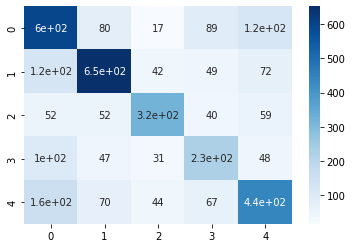

In [ ]:
import seaborn as sns
import sklearn
r2 = sklearn.metrics.confusion_matrix(y_predicted, data_test.maslow)
print(r2)
ax = sns.heatmap(r2, annot=True, cmap='Blues')

In [ ]:
def make_confusion_matrix(cf,group_names=None,categories='auto',count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

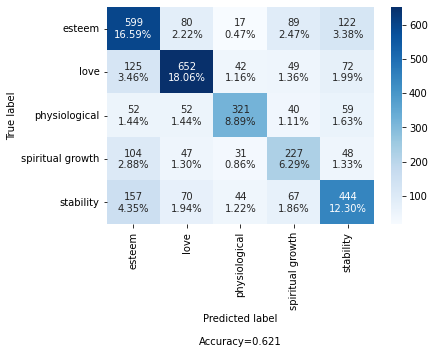

In [ ]:
import matplotlib.pyplot as plt
number = [0,1,2,3,4]
category = ['esteem','love','physiological','spiritual growth','stability']
make_confusion_matrix(r2, group_names=number, categories=category, cmap='Blues')

In [ ]:
def get_mistakes(prediction_values, actual_values, test_sentences, actual_category, predicted_category,samples_shown):
    # Make sure you Map catgory with the labels mapping as index. If label is 0 then the category index in the list should be 0
    count = 0
    correct_index = category.index(actual_category)
    incorrect_index = category.index(predicted_category)
    print('Text classified as ',category[incorrect_index]," but actual category is ",category[correct_index])
    for i in range(0,len(prediction_values)):
        if prediction_values[i] == incorrect_index and actual_values[i] == correct_index and count != samples_shown:
            print(str(i),test_sentences[i])
            count = count + 1

In [ ]:
get_mistakes(prediction_values = list(y_predicted),
             actual_values = list(data_test.maslow),
             test_sentences = list(data_test.sentence),
             actual_category = 'physiological', 
             predicted_category = 'spiritual growth',
             samples_shown = 10)

Text classified as  spiritual growth  but actual category is  physiological
52 teddy had free time at the end of his dayhe decided to watch a few online videosone after another teddy kept watchingteddy had not moved an inch since he started watching
110 the bear ambled along the forest path not in any hurry
344 it took us three days to climb the mountainas we neared the top we found a place to make camp
596 louis put on his fins mask and snorkel
696 kim was excited for the snowshe knew that if there was enough she would have the day off schoolwhen she woke up in the morning everything was covered in whiteshe checked online and all the schools around her were closedshe was excited to have the entire day to play
1099 michelle went on a hike
1148 alma was home aloneshe had just watched a scary movie
1217 emily could not wait to watch the fireworks display
1317 alicia went rock climbing
1320 ray could not get an irritating tune out of his headhe tried to distract himself but the melody kep

In [ ]:
texts = input(str('input the text '))
x_val = tokenizer(
    text = texts,  
    add_special_tokens = True,
    max_length = 70,
    truncation = True,
    padding = 'max_length',
    return_tensors = 'tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True
)
validation = model.predict({'input_ids':x_val['input_ids'], 'attention_mask':x_val['attention_mask']})*100 
validation

input the text I am tired


array([[37.3986  , 10.790863, 97.73828 , 36.55313 , 39.555515]],
      dtype=float32)

In [ ]:
for key, value in zip(encoded_dict.keys(), validation[0]):
    print(key, value)

esteem 37.3986
love 10.790863
physiological 97.73828
spiritual growth 36.55313
stability 39.555515


In [ ]:
reddit_data = pd.read_excel('reddit_data_with_predictions.xlsx')
reddit_data = reddit_data[['sentence']]

In [ ]:
df_cleaned = text_preprocessing(reddit_data,'sentence')

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

In [ ]:
df_cleaned['num_words'] = df_cleaned.sentence.apply(lambda x:len(x.split()))

In [ ]:
df_cleaned

,sentence,num_words
0,it feels like everyone else is passing me by a...,87
1,i do not know why but no matter what i do life...,79
2,recently i have been having obsessive thoughts...,417
3,he hides it from his friends whom he plays gam...,55
4,hello i have 22f struggled with my mental heal...,304
5,i fucked up and i need help apologizing to som...,70
6,i have just lost all my friends and i feel lik...,39
7,hello i am looking for support or just anyone ...,599
8,hey my friend has been struggling with a lot o...,69
9,everyday feels the same and i am distancing my...,136


In [ ]:
df_cleaned.num_words.max()

2608

In [ ]:
x_test = tokenizer(
    text = df_cleaned.sentence.tolist(),
    add_special_tokens = True,
    max_length = 70,
    truncation = True,
    padding = True, 
    return_tensors = 'tf',
    return_token_type_ids = False,
    return_attention_mask = True, 
    verbose = True
)
predicted_raw = model.predict({'input_ids': x_test['input_ids'], 'attention_mask': x_test['attention_mask']}) 
predicted_raw[0]

array([0.63248813, 0.4430282 , 0.19274719, 0.81802523, 0.3240795 ],
      dtype=float32)

In [ ]:
#y_predicted = np.argmax(predicted_raw[0])
#y_predicted

3

In [ ]:
#'esteem':0, 'love':1,'physiological':2, 'spiritual growth':3, 'stability':4
category = ['esteem','love','physiological','spiritual growth','stability']
#category[y_predicted]

In [ ]:
y_predicted = np.argmax(predicted_raw, axis = 1) 

In [ ]:
lis = []
for val in y_predicted:
    print(category[val])
    lis.append(category[val])
df_cleaned['prediction'] = lis

spiritual growth
love
esteem
esteem
esteem
love
love
love
love
love
stability
love
love
love
love
spiritual growth
love
spiritual growth
love
love
spiritual growth
love
spiritual growth
spiritual growth
love
love
love
love
love
love
love
stability
esteem
spiritual growth
love
stability
stability
spiritual growth
love
spiritual growth
esteem
esteem
physiological
spiritual growth
esteem
spiritual growth
stability
spiritual growth
spiritual growth


In [ ]:
df_cleaned.head()

,sentence,num_words,prediction
0,it feels like everyone else is passing me by a...,87,spiritual growth
1,i do not know why but no matter what i do life...,79,love
2,recently i have been having obsessive thoughts...,417,esteem
3,he hides it from his friends whom he plays gam...,55,esteem
4,hello i have 22f struggled with my mental heal...,304,esteem


In [ ]:
from google.colab import files
df_cleaned.to_excel('reddit_data_with_predictions.xlsx')
files.download('reddit_data_with_predictions.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>